# 프로젝트 개요
- 제목: 호텔 예약 결과호텔 
- 설명: 손님을 분석해 취소 예측을 해보는 프로젝트
- 사용 데이터셋
    - Hotel Bookings Analysis: 호텔 예약, 취소 및 투숙객 세부 정보에 대한 포괄적인 데이터셋
- 진행절차
    - 데이터 로딩 및 EDA 진행
    - 기계학습으로 예약손님 취소률 예측
- 사용한 기술 스택
    - pandas
    - seaborn
    - scikit learn


In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline 



In [281]:
hotel_booking_df=pd.read_csv("C:/Users/eagls/Downloads/hotel/hotel_bookings.csv")

In [282]:
hotel_booking_df.isnull().sum()

index                                  0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [283]:
hotel_booking_df.duplicated().sum()

0

In [284]:
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [285]:
hotel_booking_df.describe()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,34465.068657,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,89541.750000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [286]:
pd.set_option("display.max_columns", None)

In [287]:
hotel_booking_df['company'].isnull().sum()

112593

In [288]:
hotel_booking_df.isnull().sum()

index                                  0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [289]:
hotel_booking_df.count()

index                             119390
hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent           

In [290]:
hotel_booking_df['agent']= hotel_booking_df['agent'].apply(lambda x:0 if math.isnan(x) else float(x))

In [291]:
hotel_booking_df['agent'].isnull().sum()

0

In [292]:
hotel_booking_df['company']= hotel_booking_df['company'].apply(lambda x:0 if math.isnan(x) else float(x))

In [293]:
hotel_booking_df['country'] = hotel_booking_df['country'].fillna('UNKNOWN').astype(str)

In [294]:
hotel_booking_df.isnull().sum()

index                             0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type               

In [295]:
hotel_booking_df.loc[hotel_booking_df['children'].isnull()]

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0.0,0.0,0,Transient-Party,12.0,0,1,Canceled,01-08-15
40667,40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,0.0,0,Transient-Party,12.0,0,1,Canceled,04-08-15
40679,40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0.0,0.0,0,Transient-Party,18.0,0,2,Canceled,04-08-15
41160,41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,0.0,0,Transient-Party,76.5,0,1,Canceled,09-08-15


In [296]:
hotel_booking_df['children']= hotel_booking_df['children'].apply(lambda x:0 if math.isnan(x) else float(x))

In [297]:
hotel_booking_df.isnull().sum()

index                             0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type               

In [298]:
hotel_booking_df['total_num']=hotel_booking_df['adults']+hotel_booking_df['children']+hotel_booking_df['babies']

- 호텔룸은 성인지아이인지 보다는 방의 가격이 중요하기 떄문에 인수를 하나로 합쳤습니다

In [299]:
hotel_booking_df

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_num
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,01-07-15,2.0
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,01-07-15,2.0
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,02-07-15,1.0
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,02-07-15,1.0
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,03-07-15,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,06-09-17,2.0
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,07-09-17,3.0
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,07-09-17,2.0
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,07-09-17,2.0


In [300]:
def compareroom(reserve,assign):
    if reserve == assign:
        return 0
    else:
        return 1

In [301]:
hotel_booking_df['reserved_room_vs_assigned_room'] = hotel_booking_df.apply(lambda x: compareroom(x['reserved_room_type'], x['assigned_room_type']), axis=1)

- 요구한 방을 받을때와 아닐때에 차이점이 있지않을까에대한 가설로 컬럼추가

In [302]:
hotel_booking_df['combined_date'] = hotel_booking_df['arrival_date_year'].astype(str) + '-' + hotel_booking_df['arrival_date_month'].astype(str) + '-' + hotel_booking_df['arrival_date_day_of_month'].astype(str)

In [303]:
hotel_booking_df['combined_date'] = pd.to_datetime(hotel_booking_df['combined_date'])

- 예약된 날짜 합친 새 컬럼 생성

In [304]:
hotel_booking_df['day_of_week'] = hotel_booking_df['combined_date'].dt.weekday

- 예약된 요일 컬럼 생성

In [305]:
# 'Date' 열의 날짜 형식 변경
hotel_booking_df['reservation_status_date'] = hotel_booking_df['reservation_status_date'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%y').strftime('%Y-%m-%d'))

- 상태 변화된 날짜 스타일 변경해주기

In [306]:
hotel_booking_df['total_night']=hotel_booking_df['stays_in_weekend_nights']+hotel_booking_df['stays_in_week_nights']

In [307]:
hotel_booking_df = hotel_booking_df[hotel_booking_df['total_night'] > 0]

- 잔 날짜 계산 뒤 총 날이 0이면 drop해주기

In [308]:
def month_to_num(month):
    months = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    return months.get(month)

In [309]:
hotel_booking_df['arrival_date_month'] = hotel_booking_df.apply(lambda x: month_to_num(x['arrival_date_month']), axis=1)

C:\Users\eagls\AppData\Local\Temp\ipykernel_31704\2903183911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_booking_df['arrival_date_month'] = hotel_booking_df.apply(lambda x: month_to_num(x['arrival_date_month']), axis=1)


In [310]:
hotel_booking_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [311]:
hotel_booking_df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [312]:
hotel_cancellation = hotel_booking_df.groupby(['hotel', 'reservation_status']).size().reset_index(name='count')

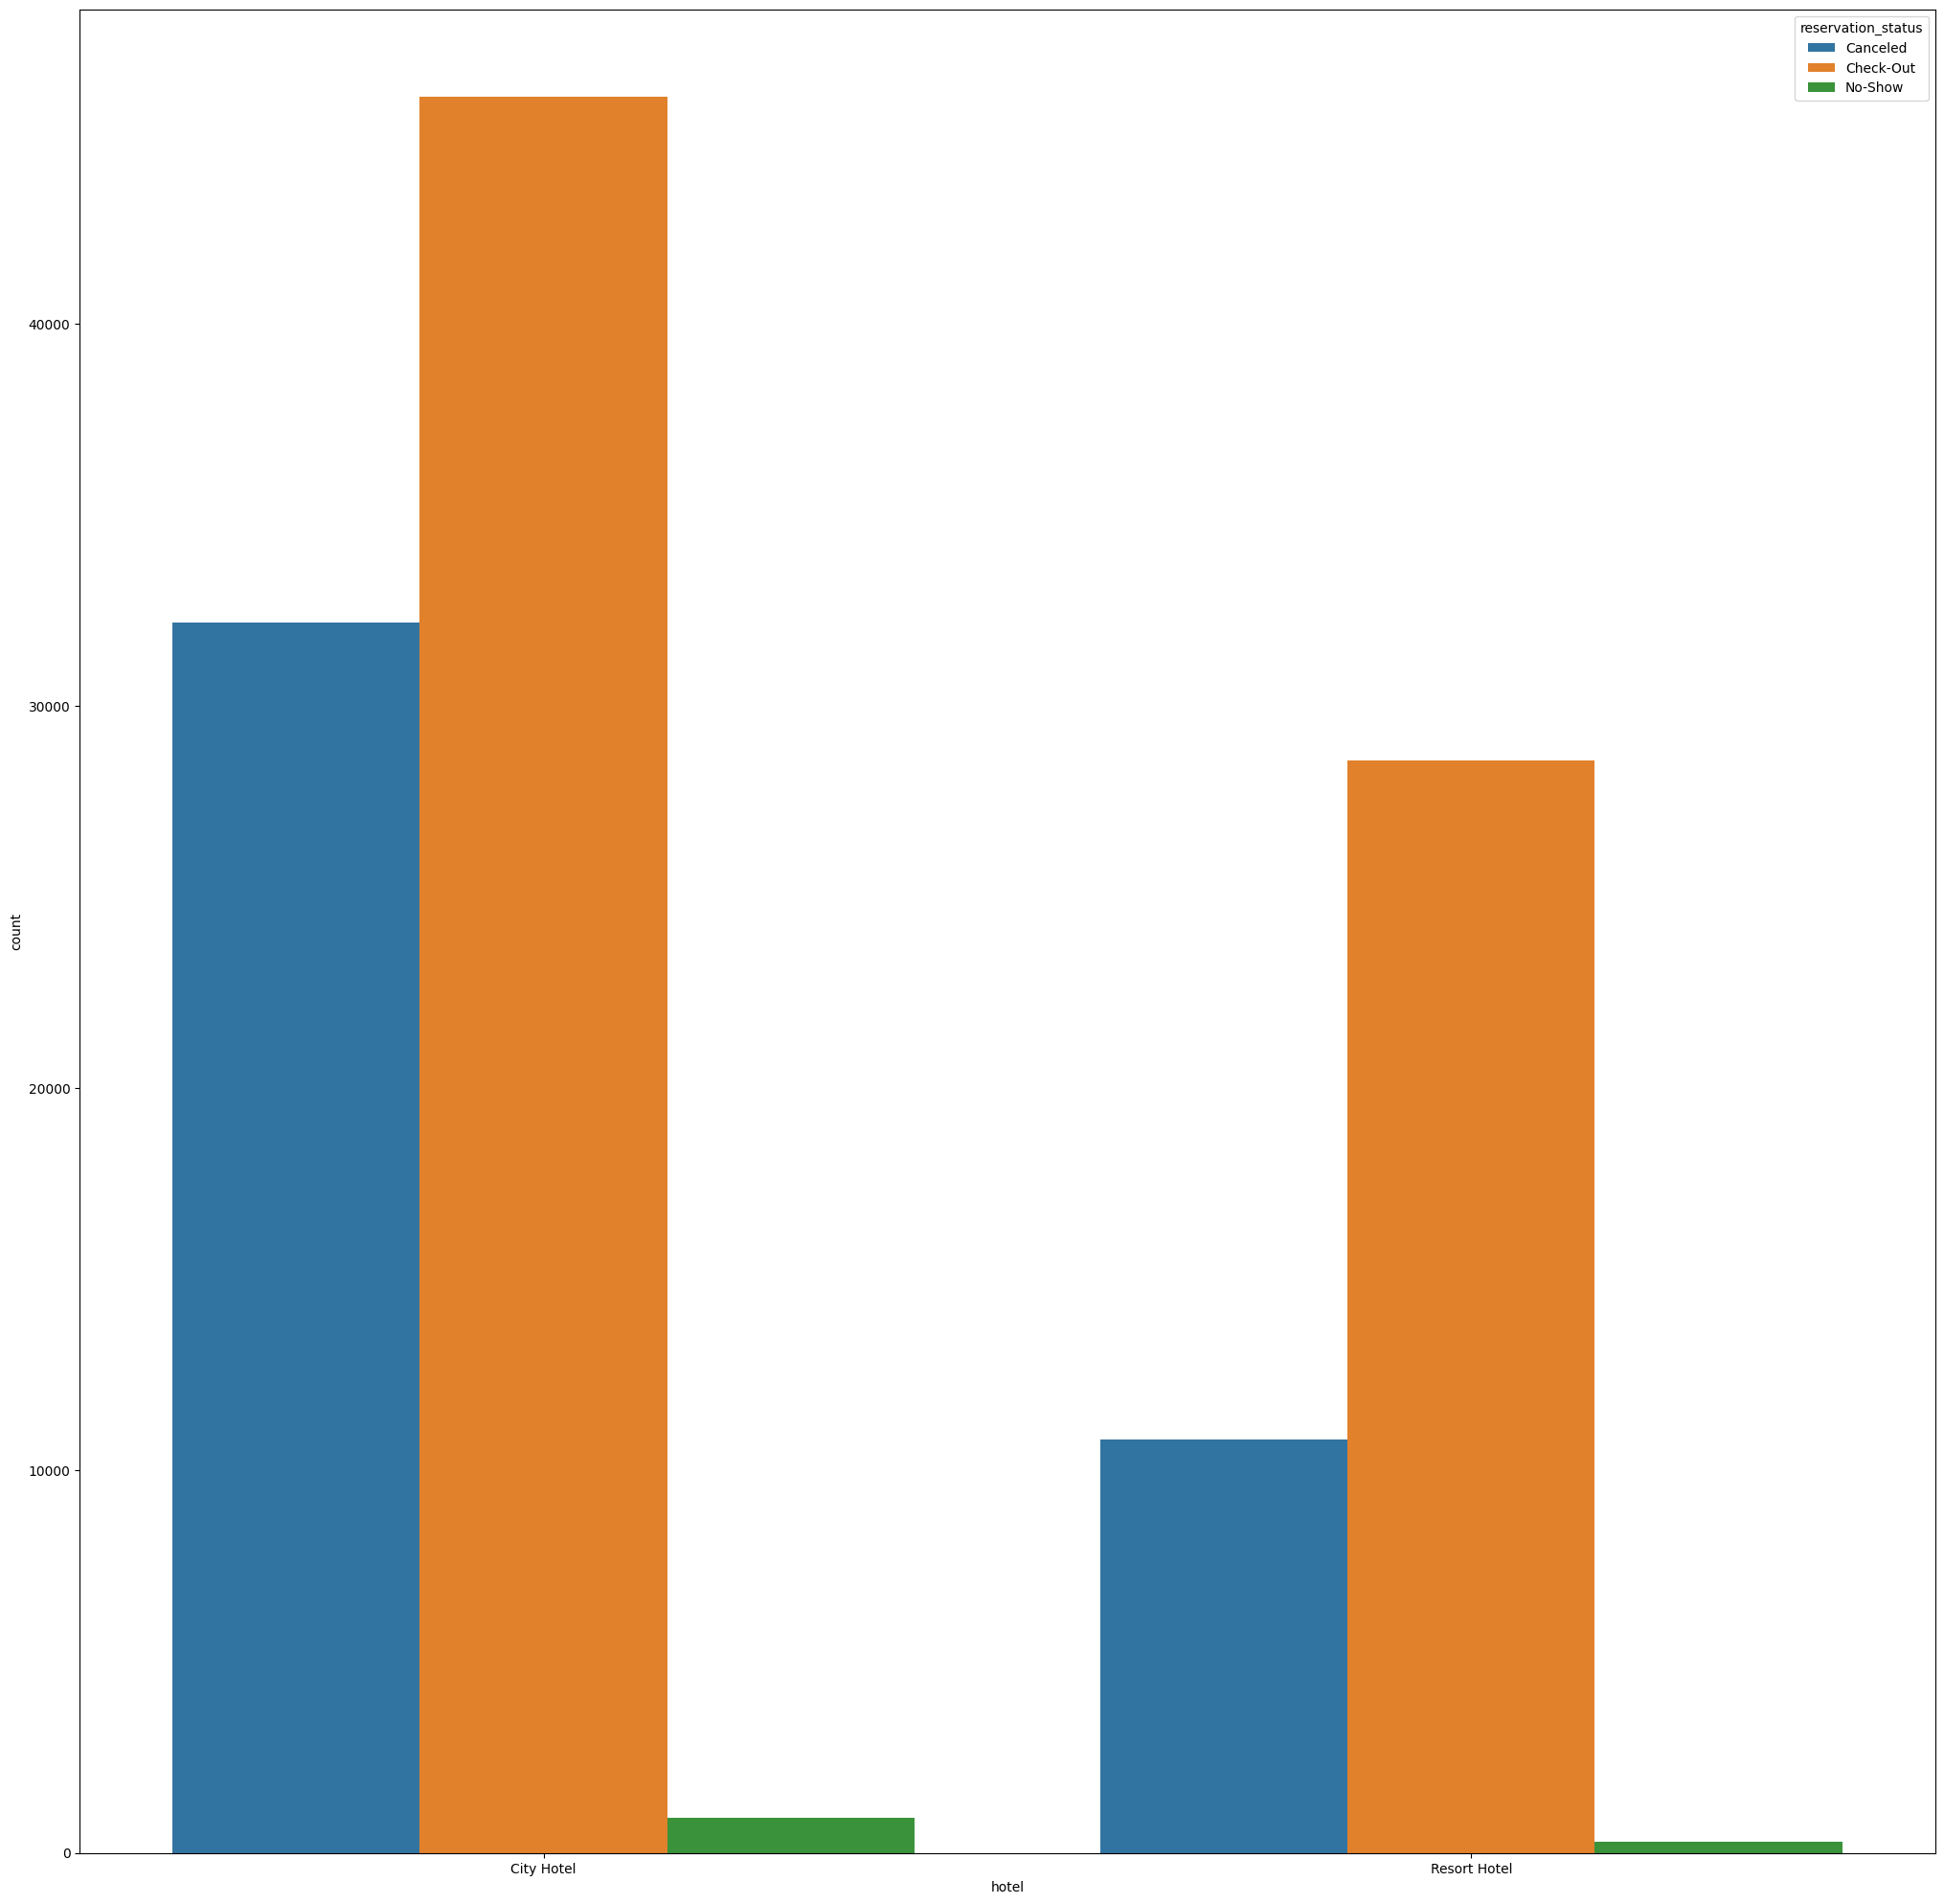

In [313]:
plt.figure(figsize=(25, 25))
sns.barplot(data=hotel_cancellation, x='hotel', y='count',hue='reservation_status')
plt.show()

In [314]:
year_reserve = hotel_booking_df.groupby('arrival_date_year')['arrival_date_year'].value_counts().reset_index()

In [315]:
year_reserve

,arrival_date_year,count
0,2015,21842
1,2016,56290
2,2017,40543


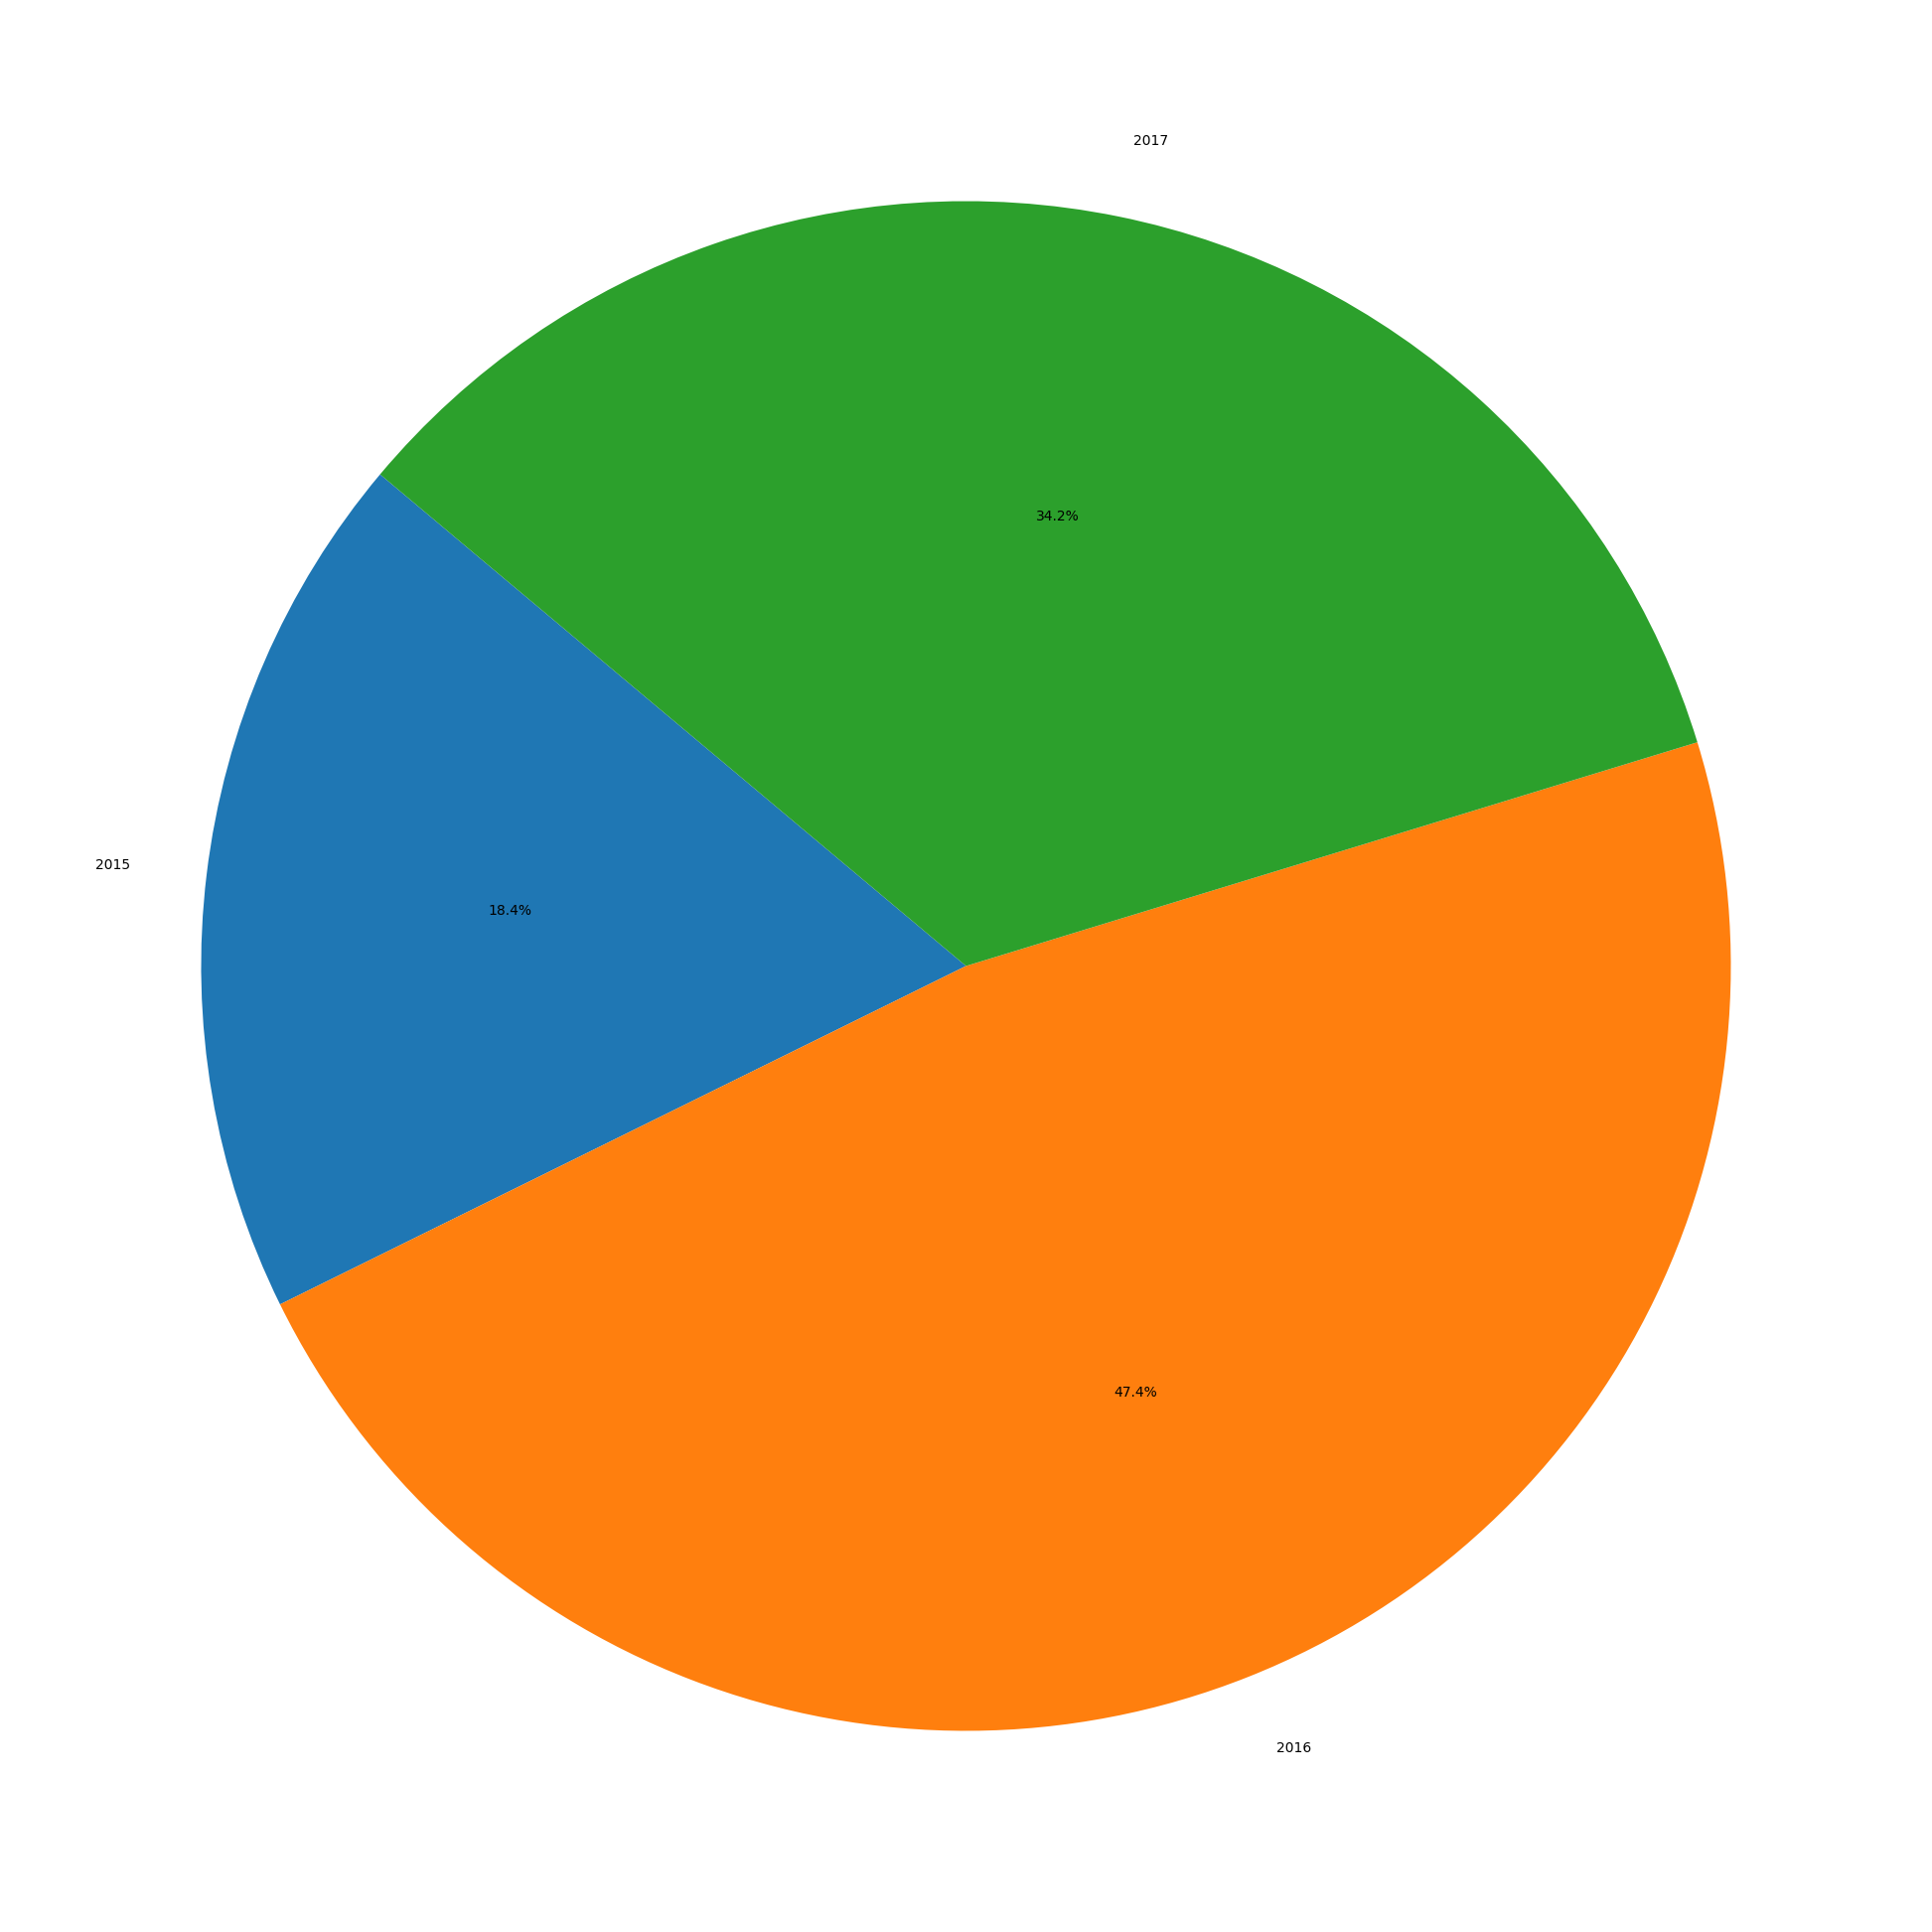

In [316]:
plt.figure(figsize=(25, 25))
plt.pie(year_reserve['count'], labels=year_reserve['arrival_date_year'], autopct='%1.1f%%', startangle=140)
plt.show()

- 2016년이 제일 많지만 2015년 7월부터 2017년 8월까지의 데이터기 때문에 2016년에 제일 많을 수 밖에 없다

In [317]:
hotel_market = hotel_booking_df.groupby('market_segment')['market_segment'].value_counts().sort_values(ascending=False).head(6).reset_index(name='count')

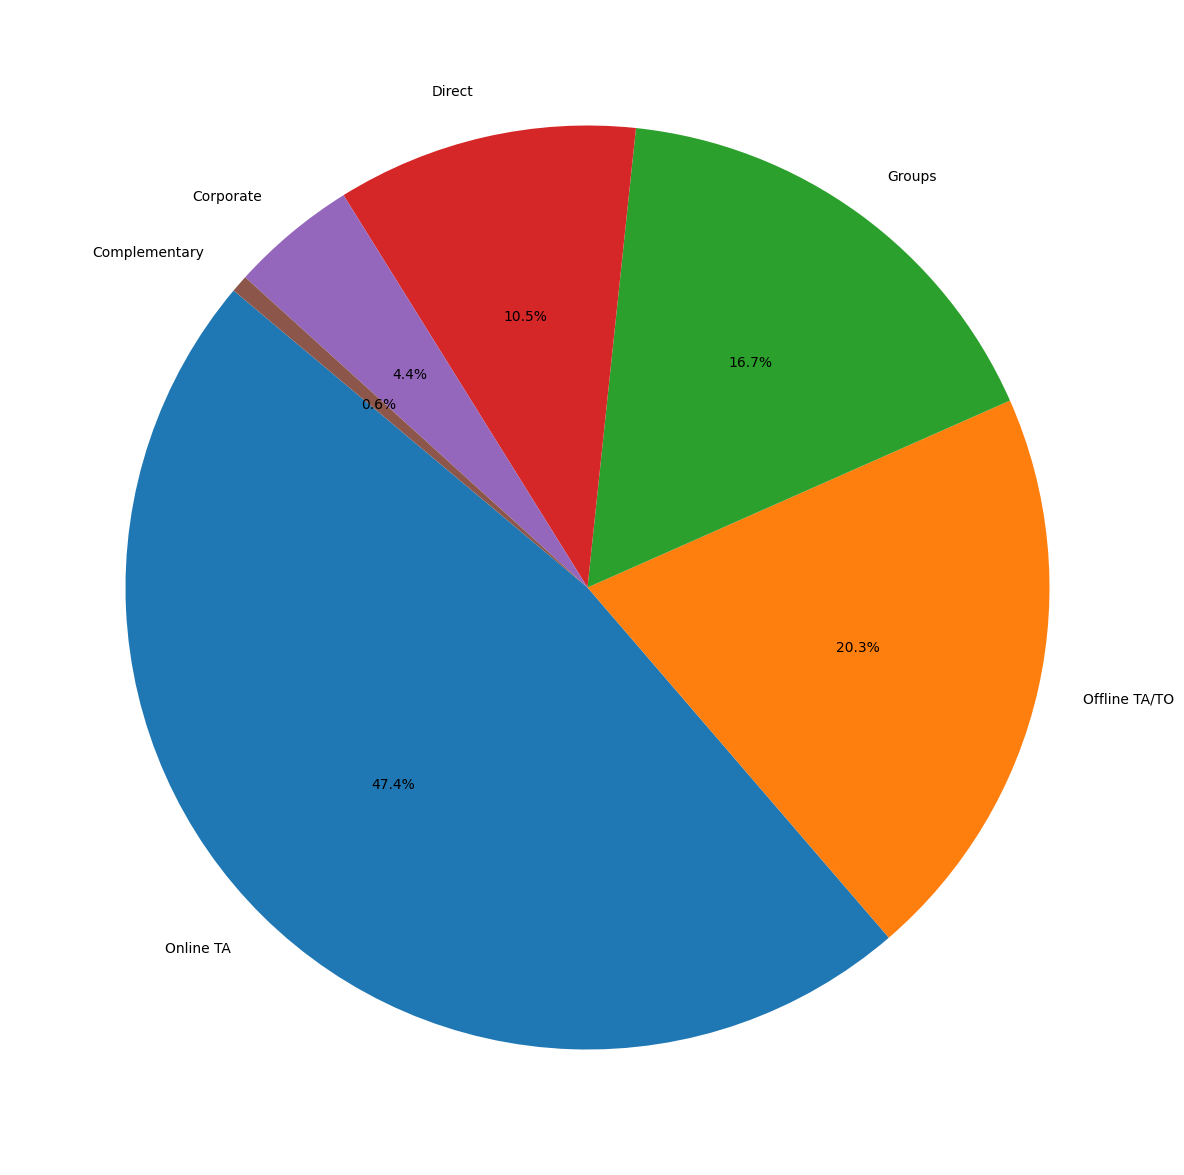

In [318]:
plt.figure(figsize=(15, 15))
plt.pie(hotel_market['count'], labels=hotel_market['market_segment'], autopct='%1.1f%%', startangle=140)
plt.show()

- 여행사를 통해서 대부분 예약을 한다

In [319]:
hotel_booking_df['year_month'] = hotel_booking_df['arrival_date_year'].astype(str) + '-' + hotel_booking_df['arrival_date_month'].astype(str)

C:\Users\eagls\AppData\Local\Temp\ipykernel_31704\2516020995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_booking_df['year_month'] = hotel_booking_df['arrival_date_year'].astype(str) + '-' + hotel_booking_df['arrival_date_month'].astype(str)


In [320]:
# Group the data by arrival date and count the number of bookings
daily_bookings = hotel_booking_df.groupby('year_month')['is_canceled'].count()

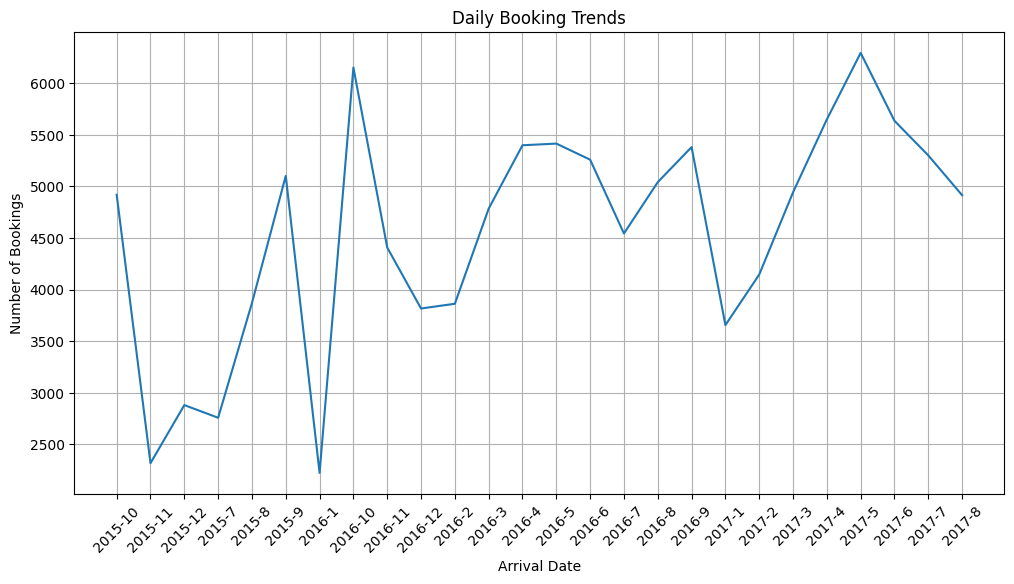

In [321]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_bookings.index, daily_bookings.values)
plt.xticks(rotation=45)
plt.xlabel('Arrival Date')
plt.ylabel('Number of Bookings')
plt.title('Daily Booking Trends')
plt.grid()
plt.show()

- 전체 예약에서 2016년 10월 과 2017년 5월에 예약이 많았었다

In [322]:
hotel_deposit_status = hotel_booking_df.groupby(['reservation_status','deposit_type'])['reservation_status'].count().reset_index(name='count')

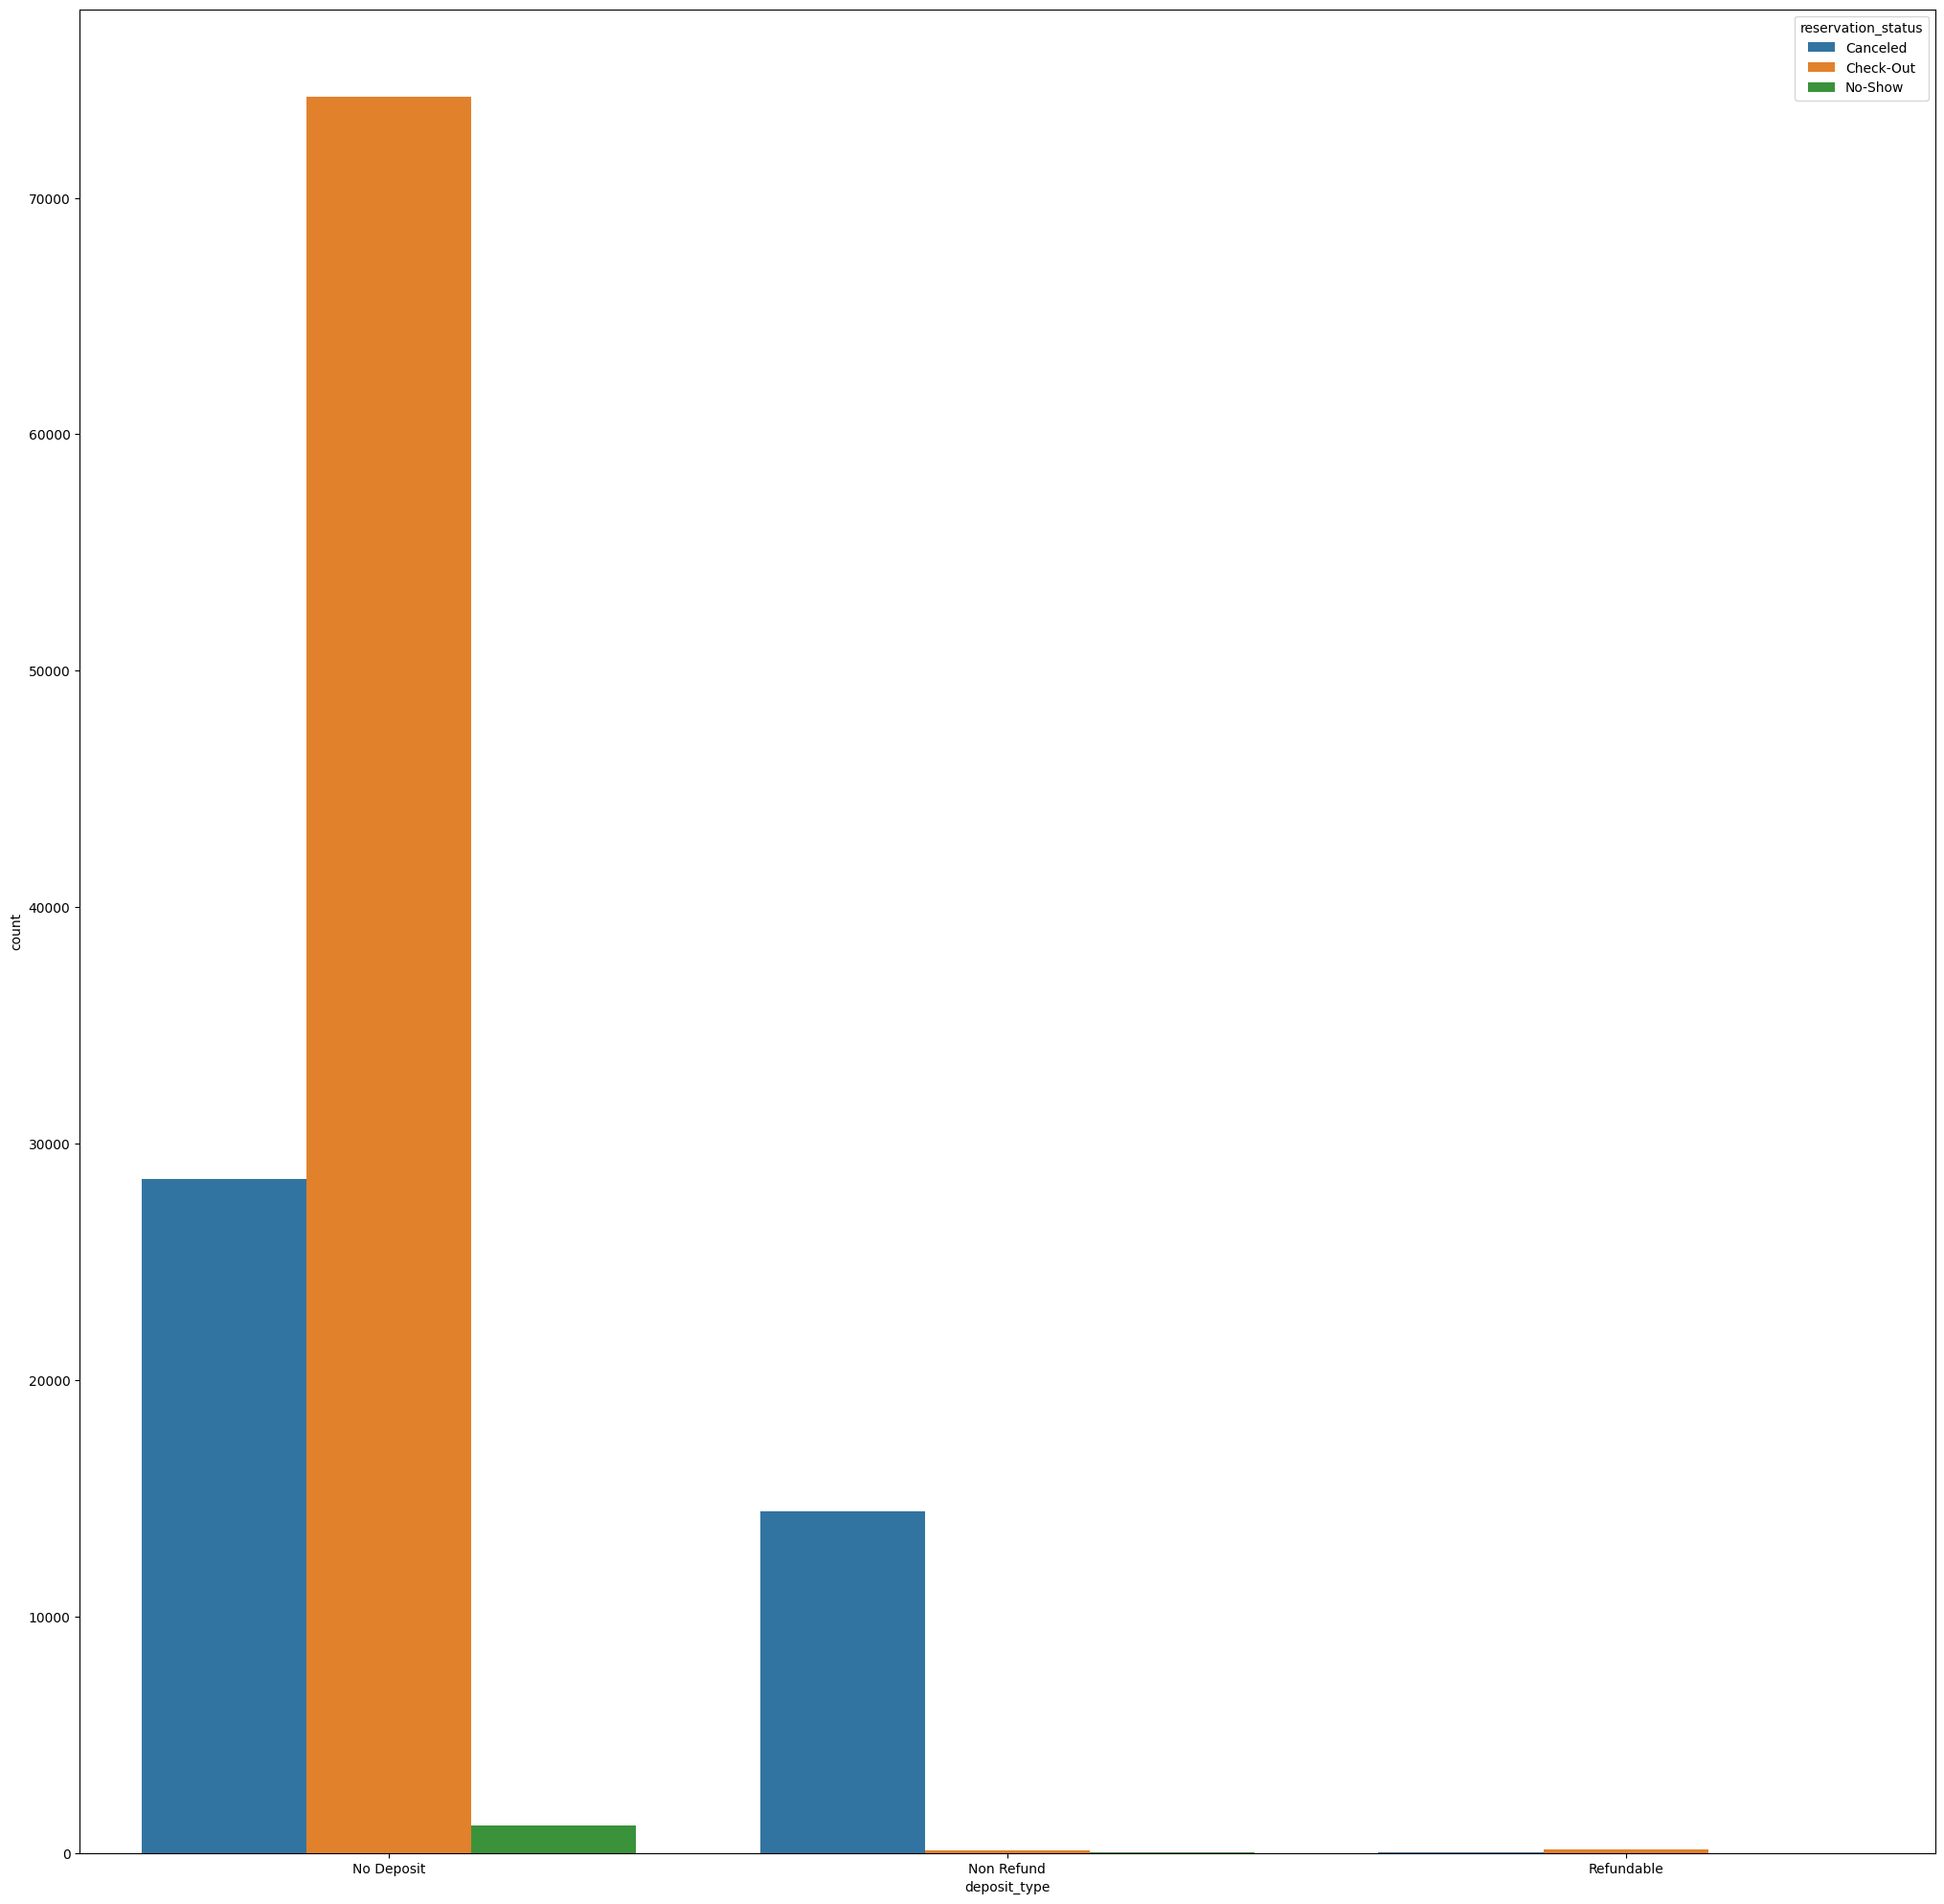

In [323]:
plt.figure(figsize=(25, 25))
sns.barplot(data=hotel_deposit_status, x='deposit_type', y='count',hue='reservation_status')
plt.show()

- no deposit이 제일 많다
- 의외로 non refund일때 cancel이 check-out보다 많다

In [324]:
hotel_customer_type = hotel_booking_df.groupby(['reservation_status','customer_type'])['reservation_status'].count().reset_index(name='count')

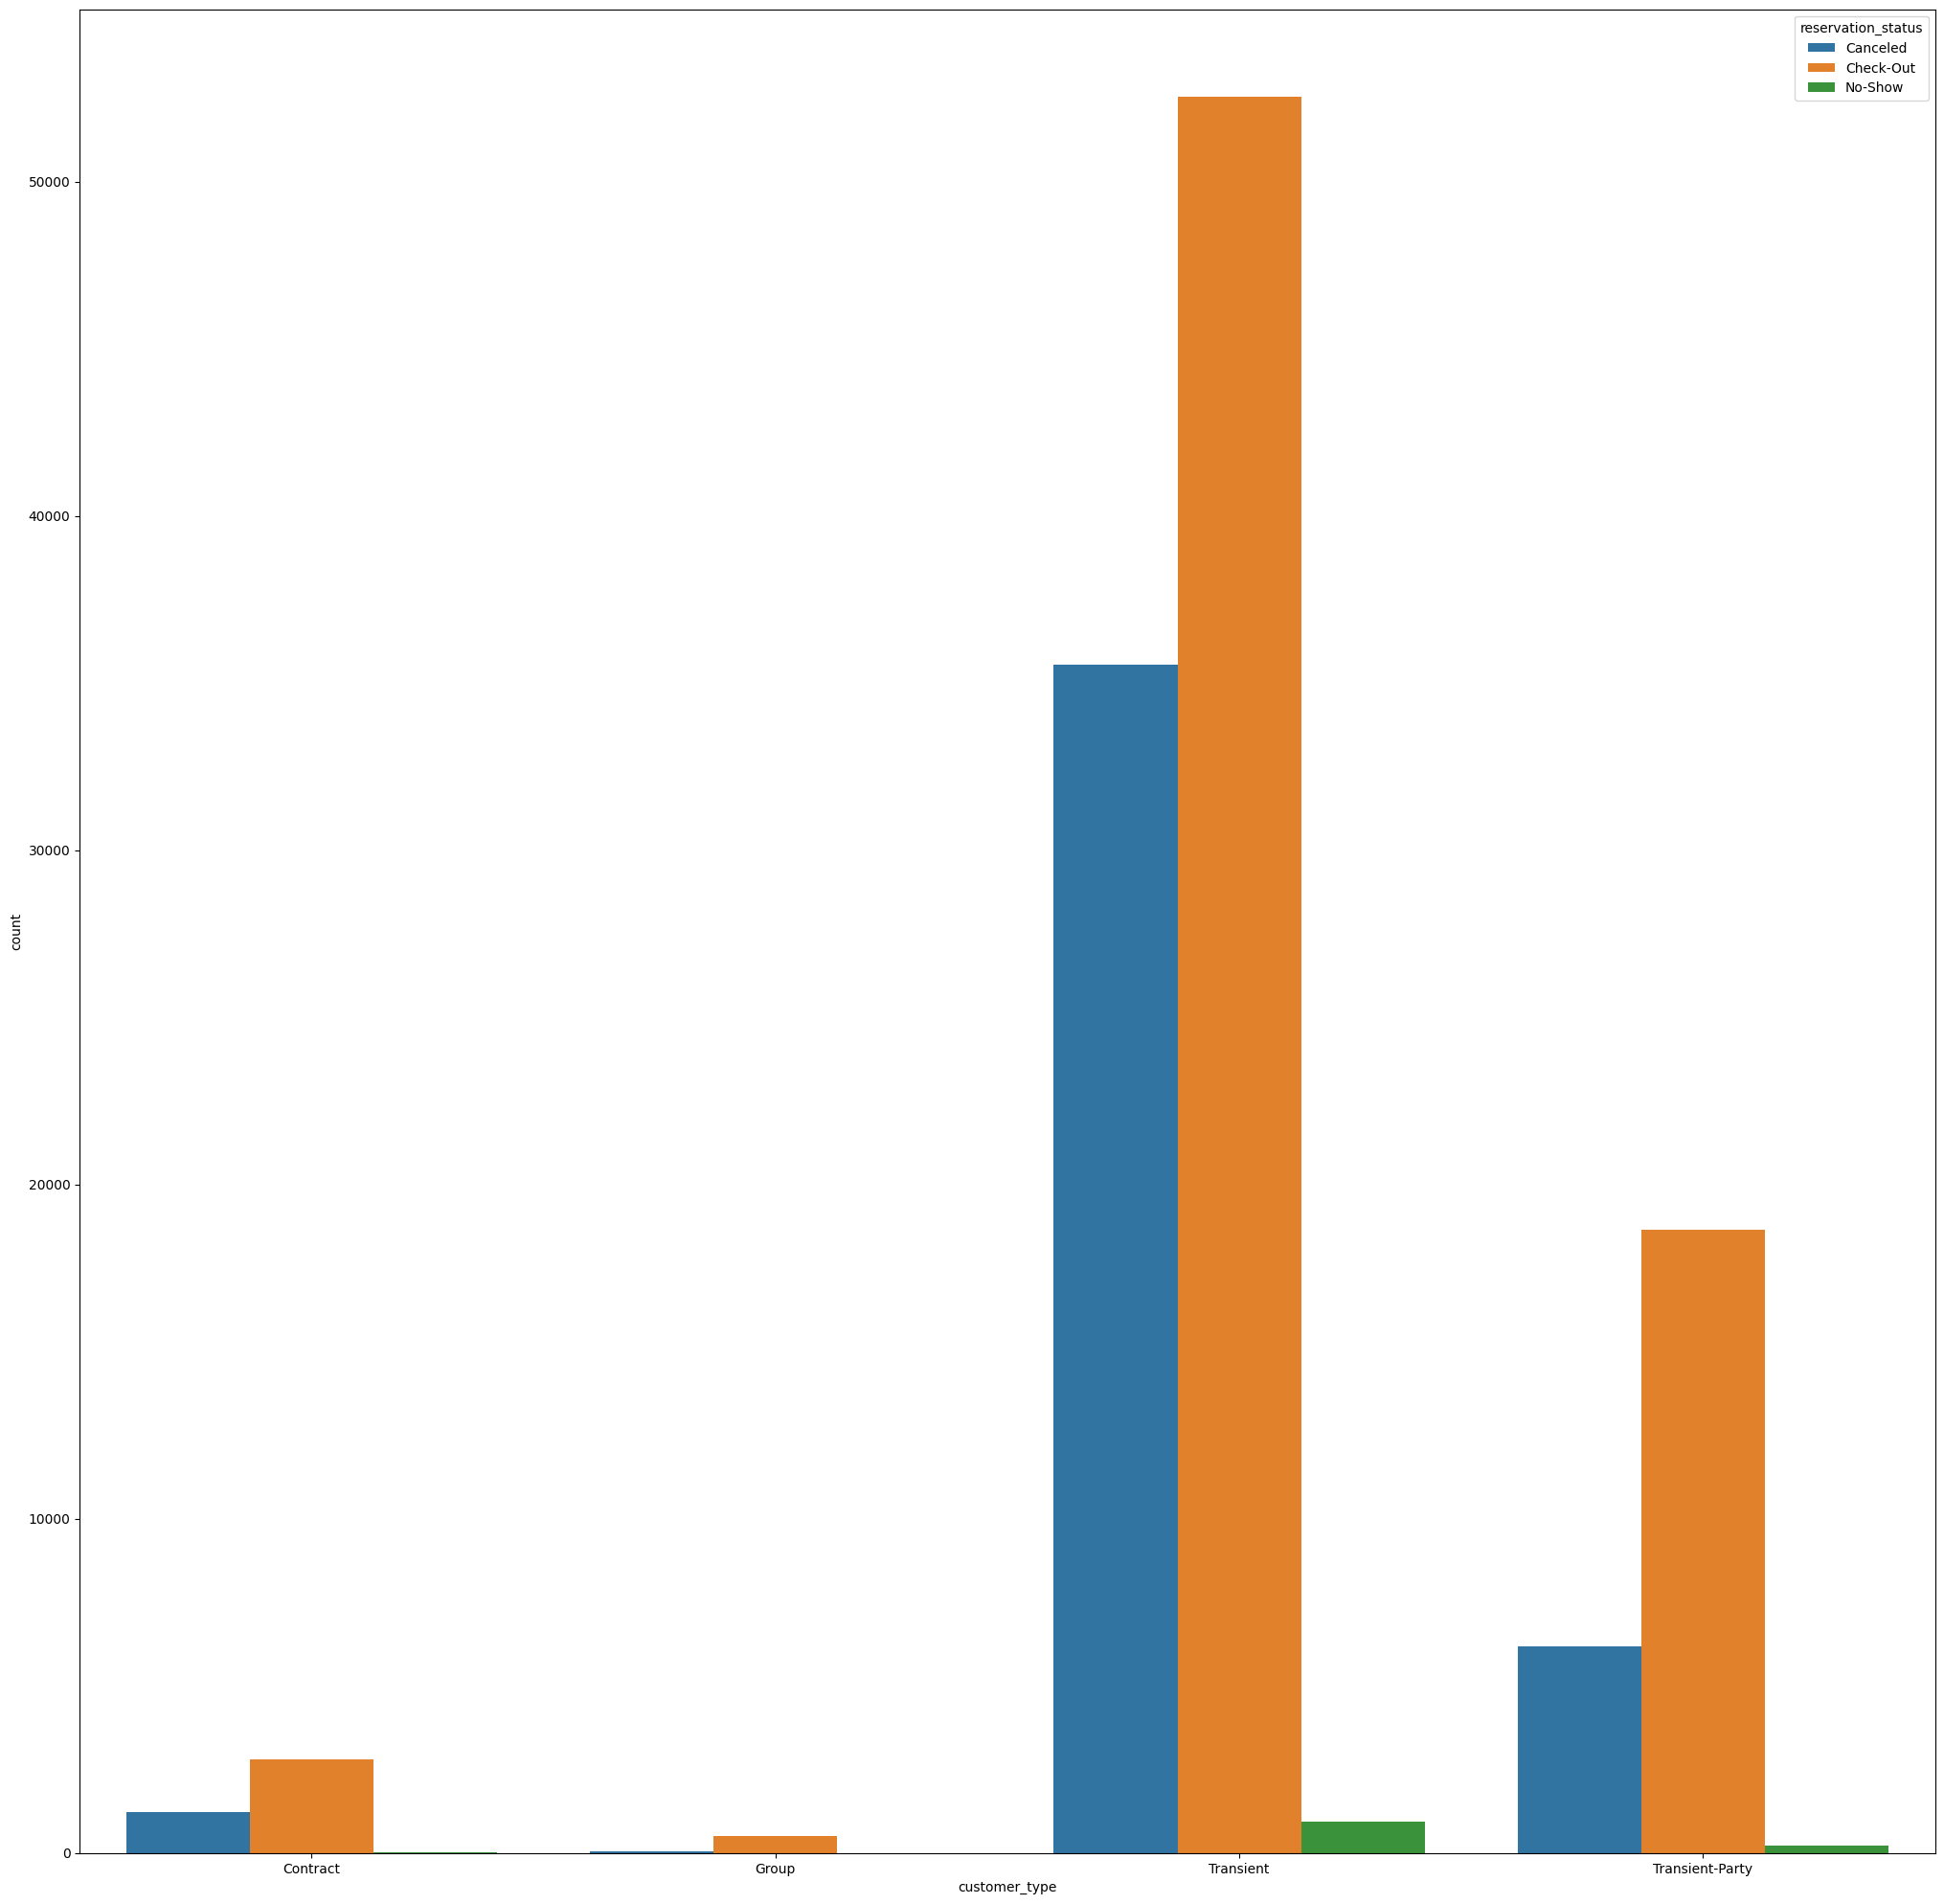

In [325]:
plt.figure(figsize=(25, 25))
sns.barplot(data=hotel_customer_type, x='customer_type', y='count',hue='reservation_status')
plt.show()

- 개인 임대 예약이 대부분이다

In [326]:
waiting_days = hotel_booking_df.groupby('hotel')['lead_time'].mean().reset_index()

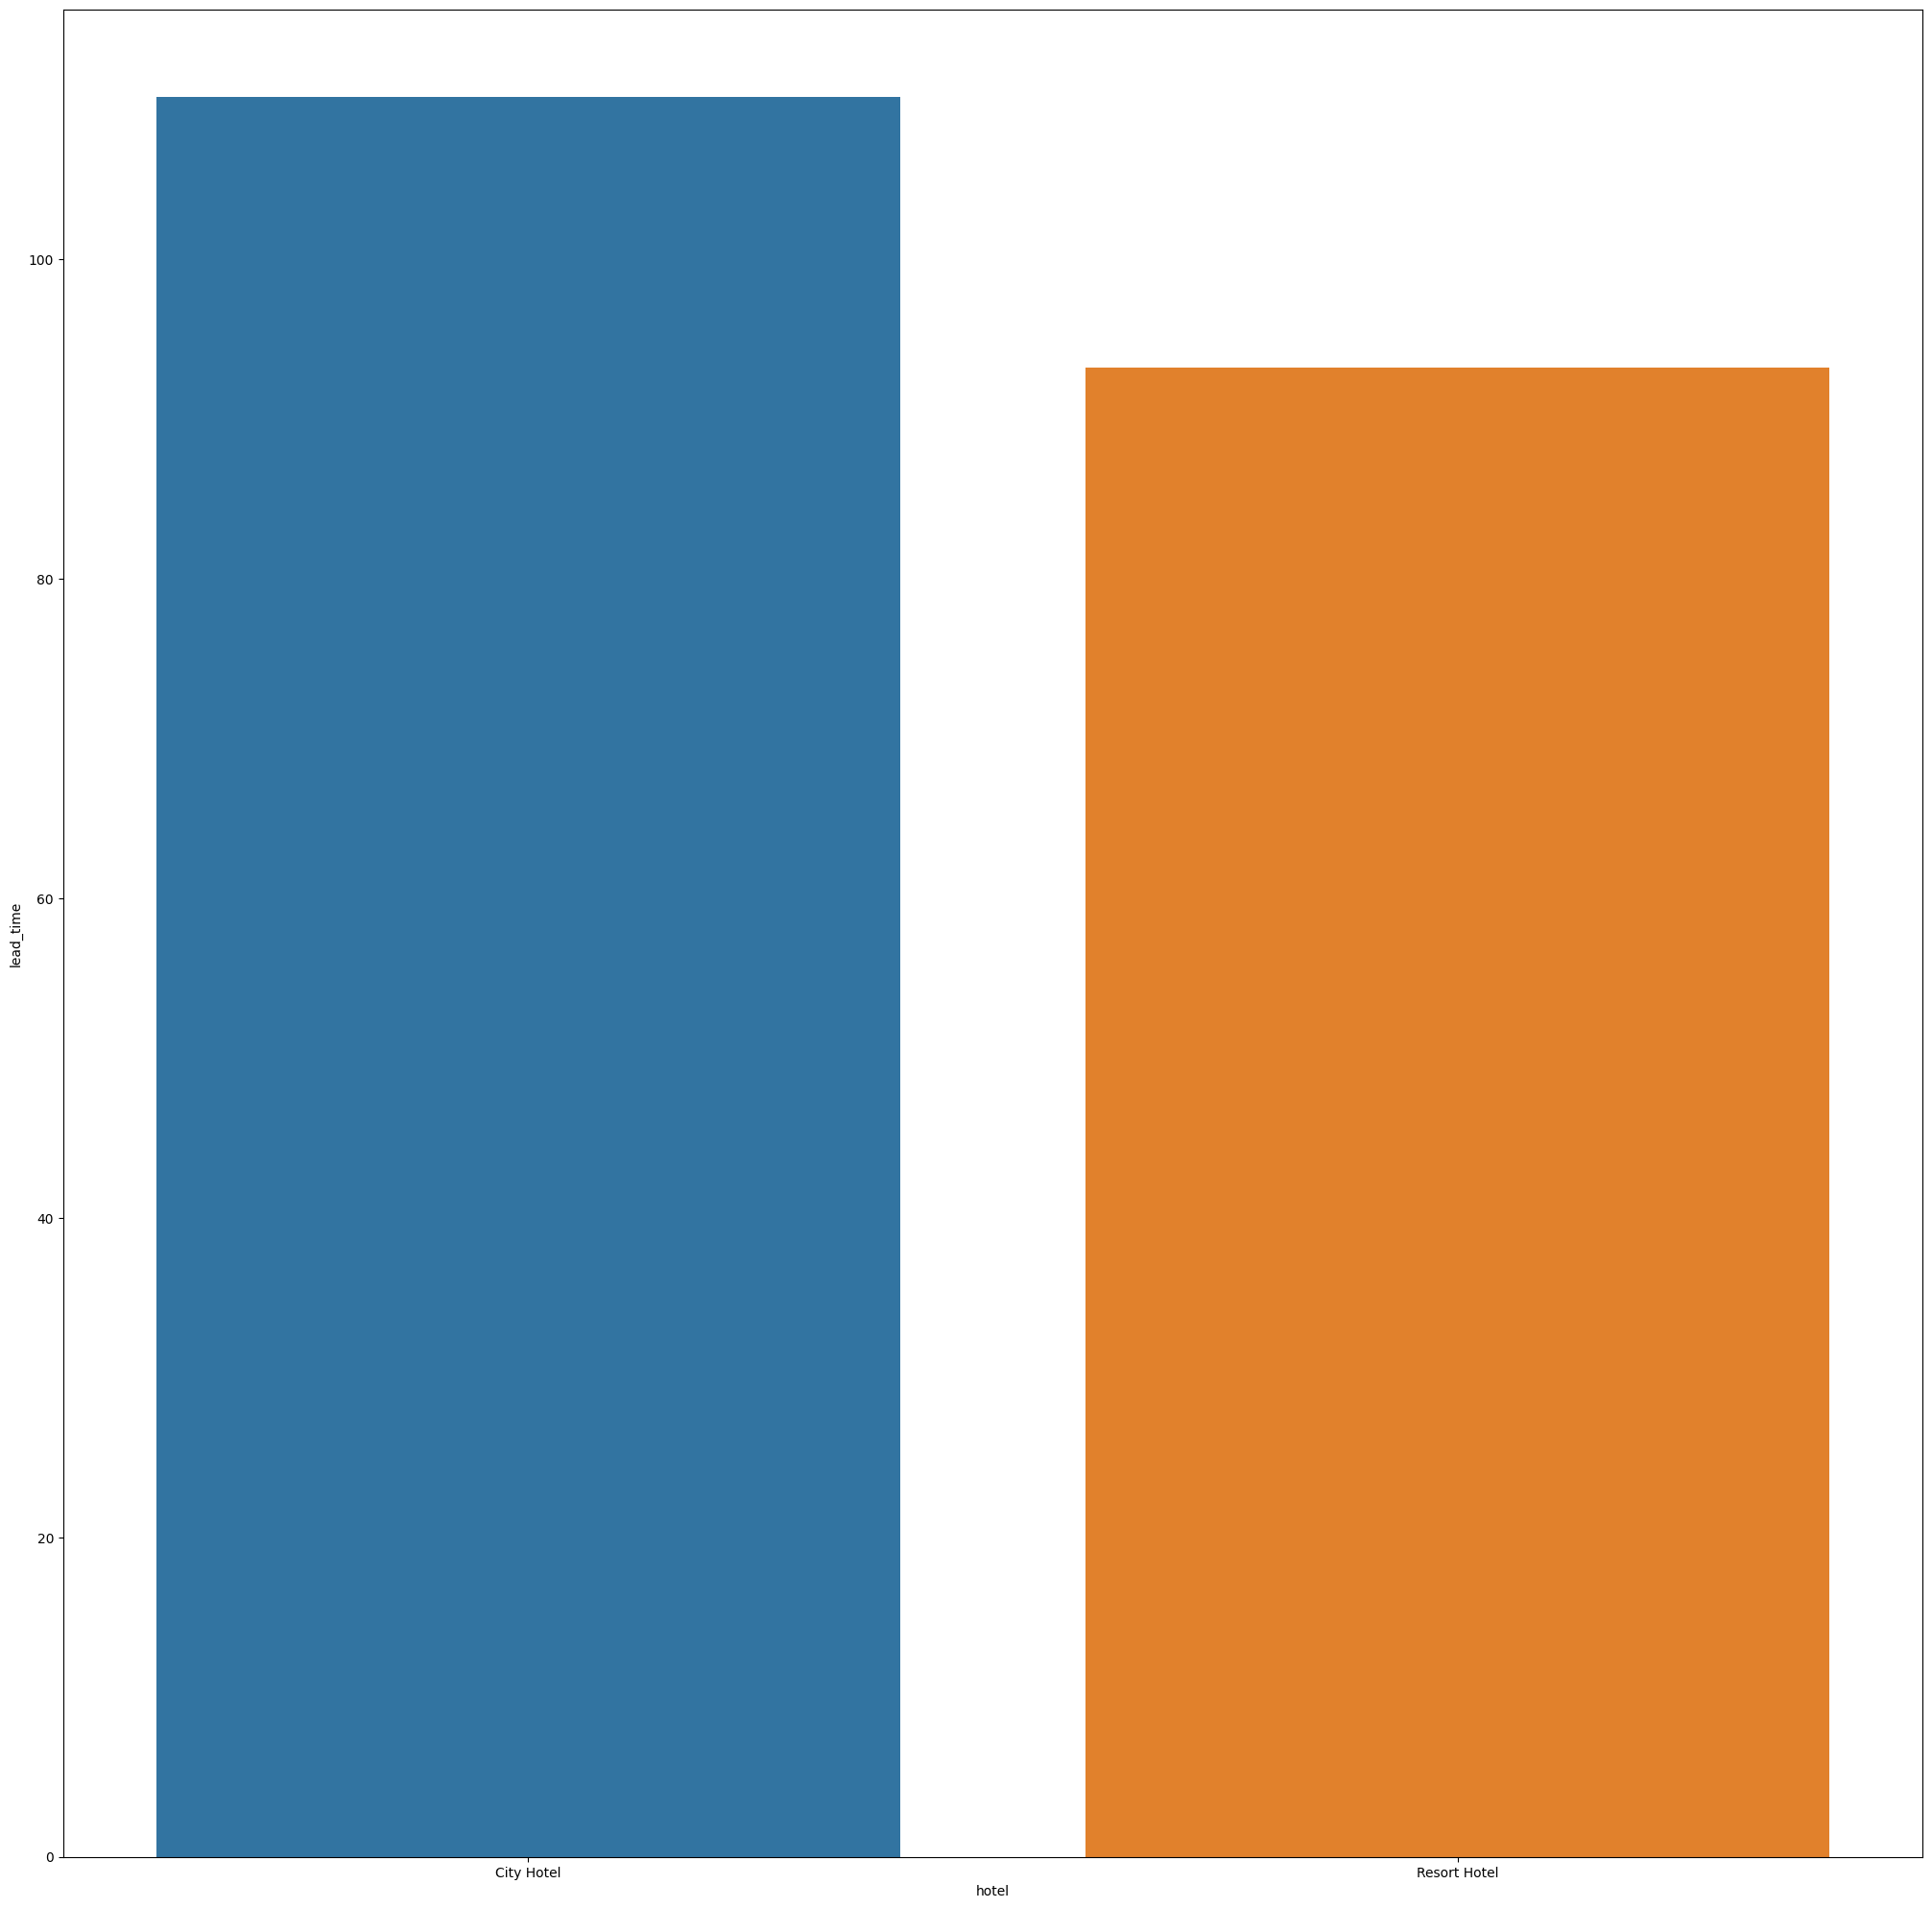

In [327]:
plt.figure(figsize=(25, 25))
sns.barplot(data=waiting_days, x='hotel', y='lead_time')
plt.show()

- 도시호텔이 비교적 리조트 호텔보다 더 길게 기다립니다.

In [328]:
resort_hotel = hotel_booking_df.loc[hotel_booking_df['hotel']=='Resort Hotel']

In [329]:
resort_daily_bookings = resort_hotel.groupby('year_month')['is_canceled'].count()

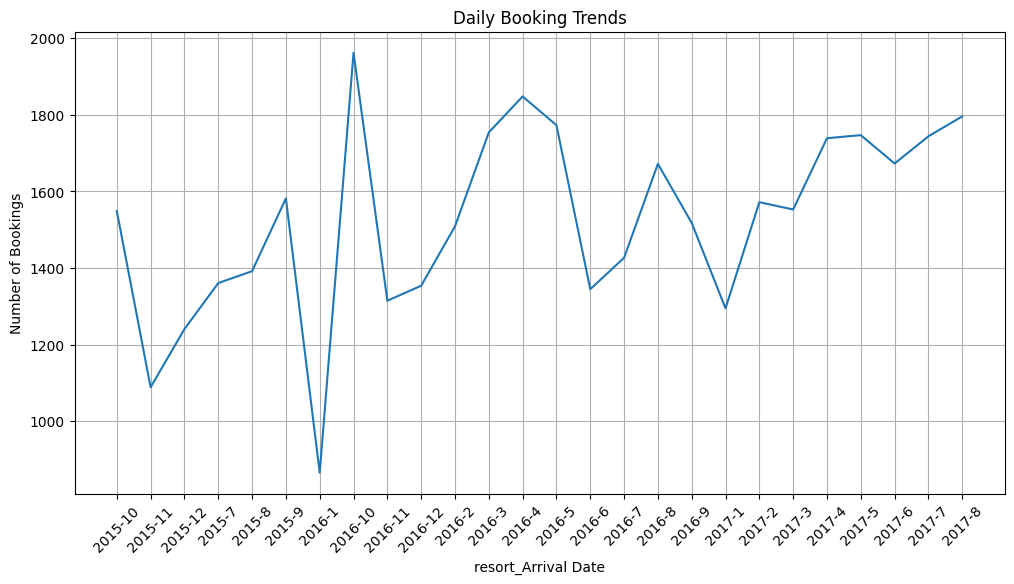

In [330]:
plt.figure(figsize=(12, 6))
plt.plot(resort_daily_bookings.index, resort_daily_bookings.values)
plt.xticks(rotation=45)
plt.xlabel('resort_Arrival Date')
plt.ylabel('Number of Bookings')
plt.title('Daily Booking Trends')
plt.grid()
plt.show()

- 2016년 10월에 예약 건수가 제일 많았음

In [331]:
resort_percent=resort_hotel.groupby(['reservation_status'])['reservation_status'].size().reset_index(name='count')

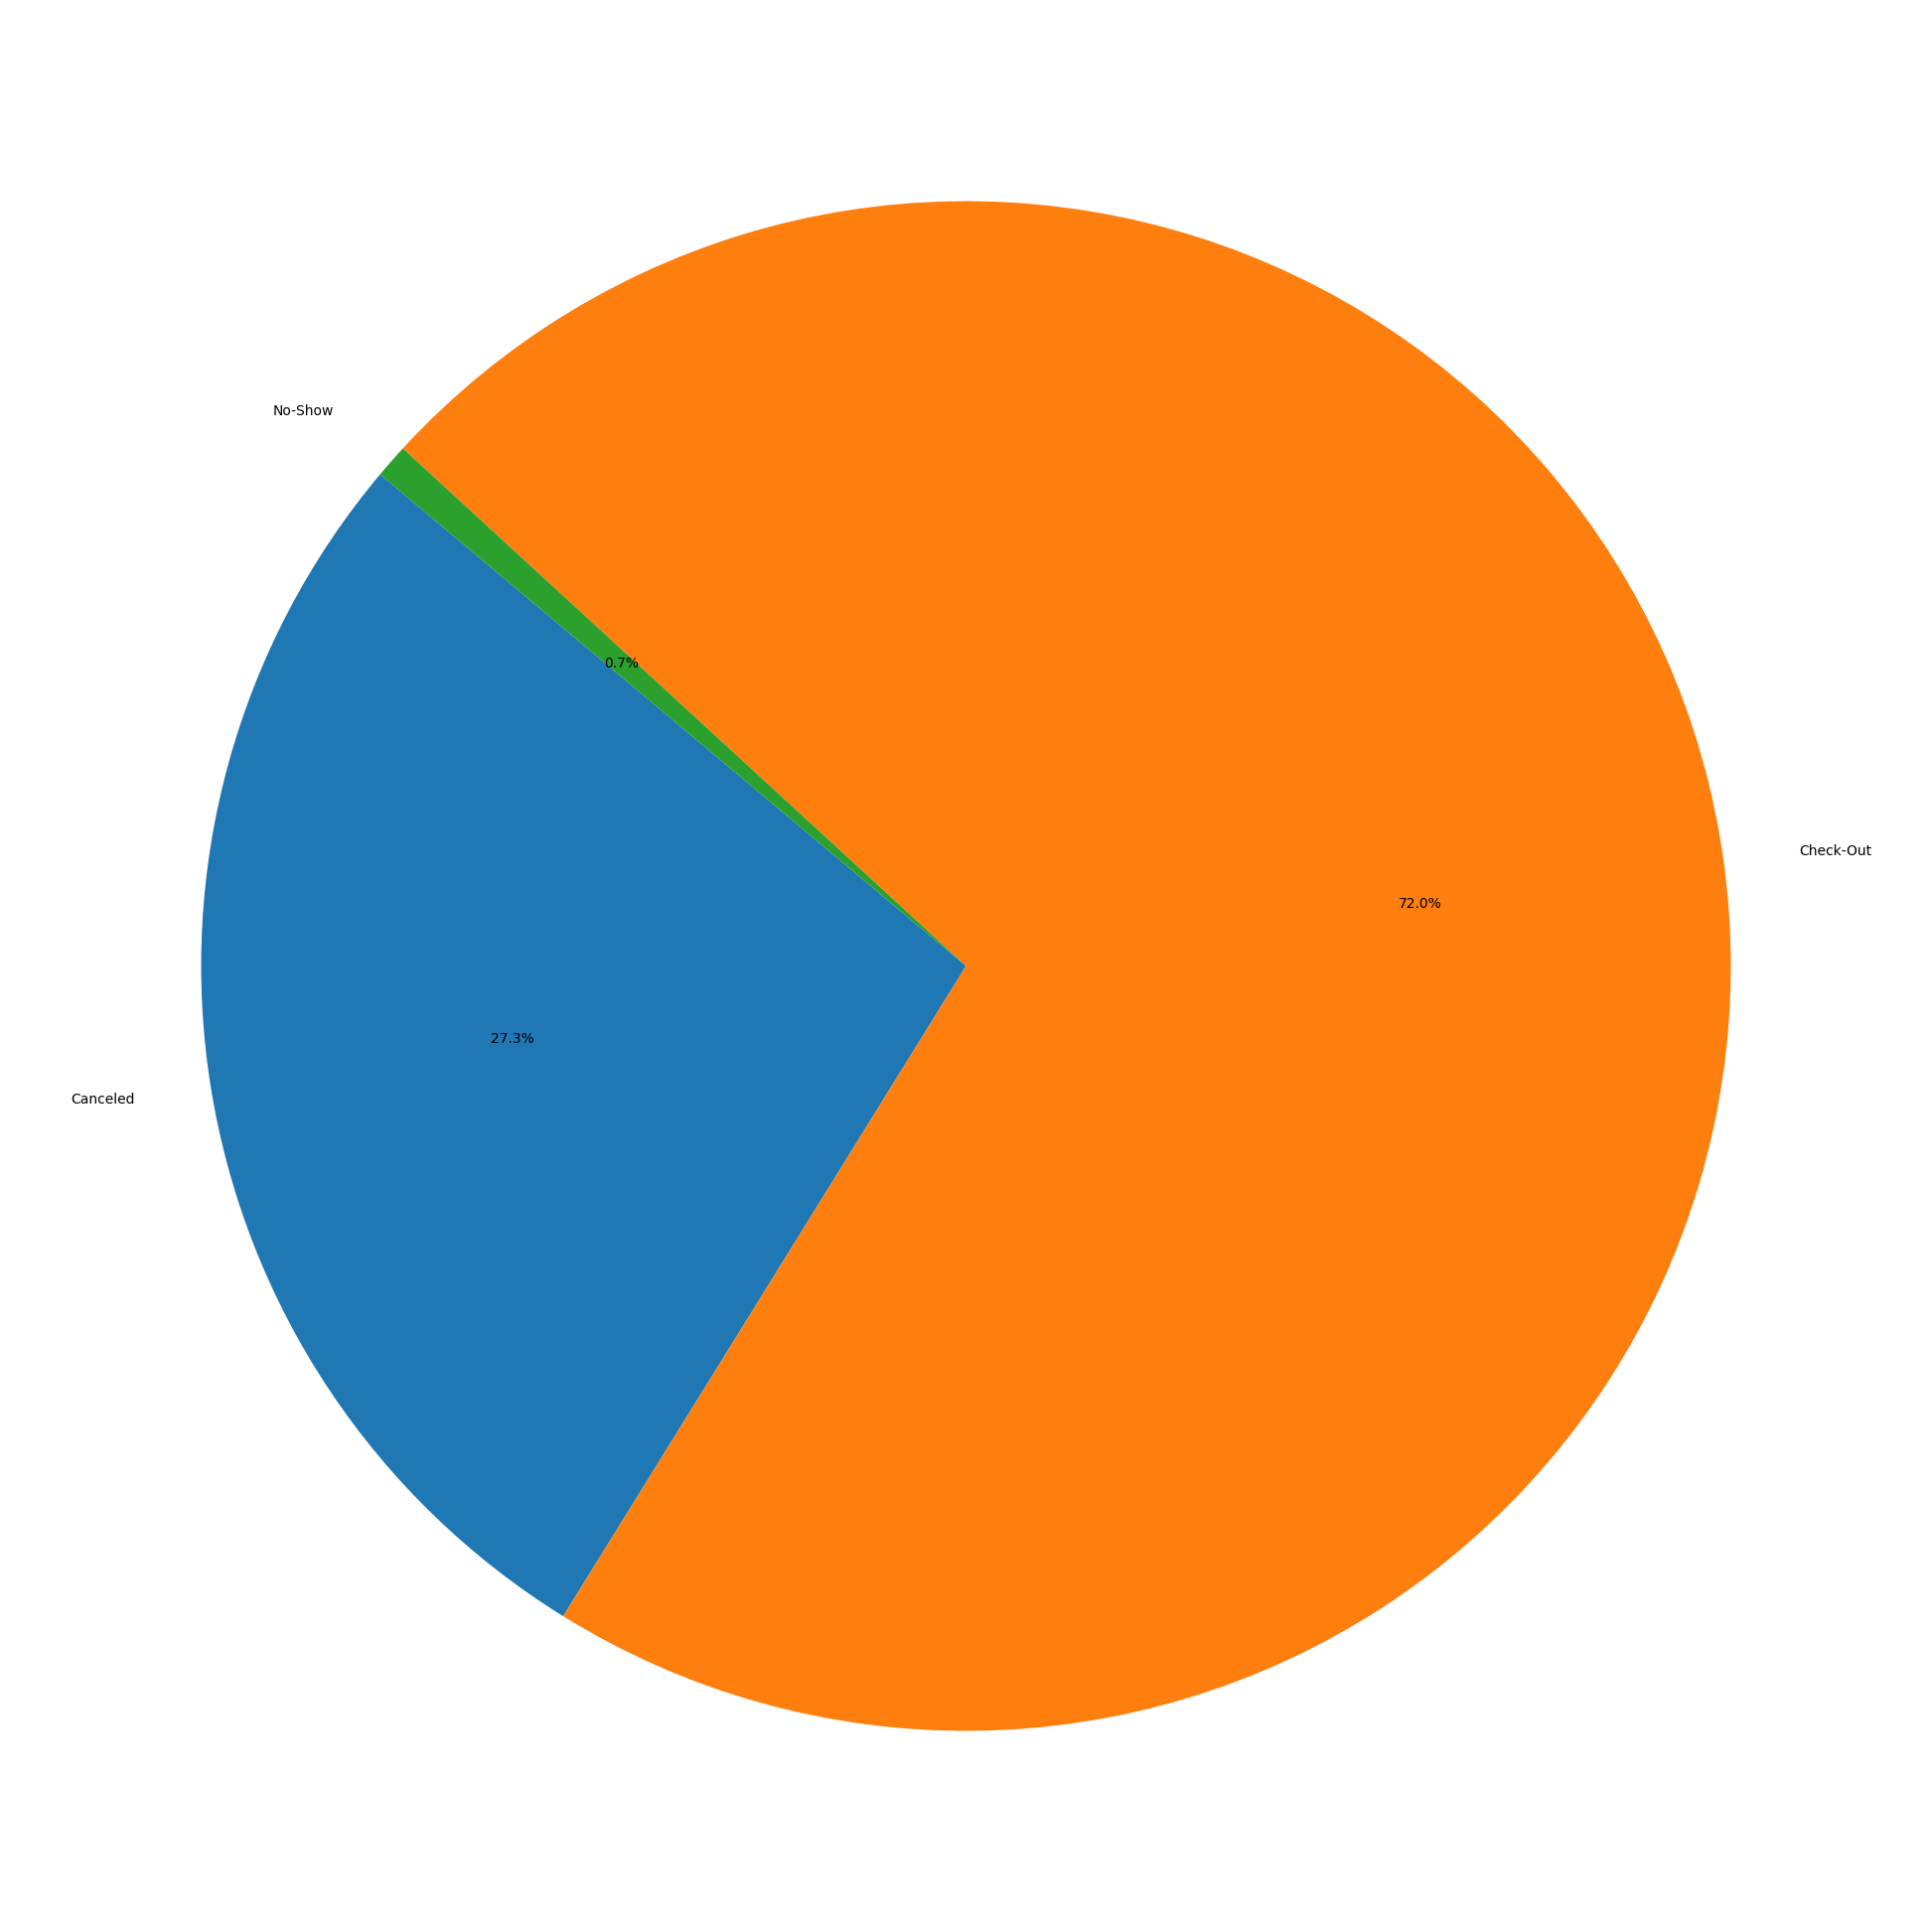

In [332]:
plt.figure(figsize=(25, 25))
plt.pie(resort_percent['count'], labels=resort_percent['reservation_status'], autopct='%1.1f%%', startangle=140)
plt.show()

- 취소률이 크지 않습니다

In [333]:
resort_cust_country=resort_hotel.groupby(['country'])['country'].size().sort_values(ascending=False).head(10).reset_index(name='count')

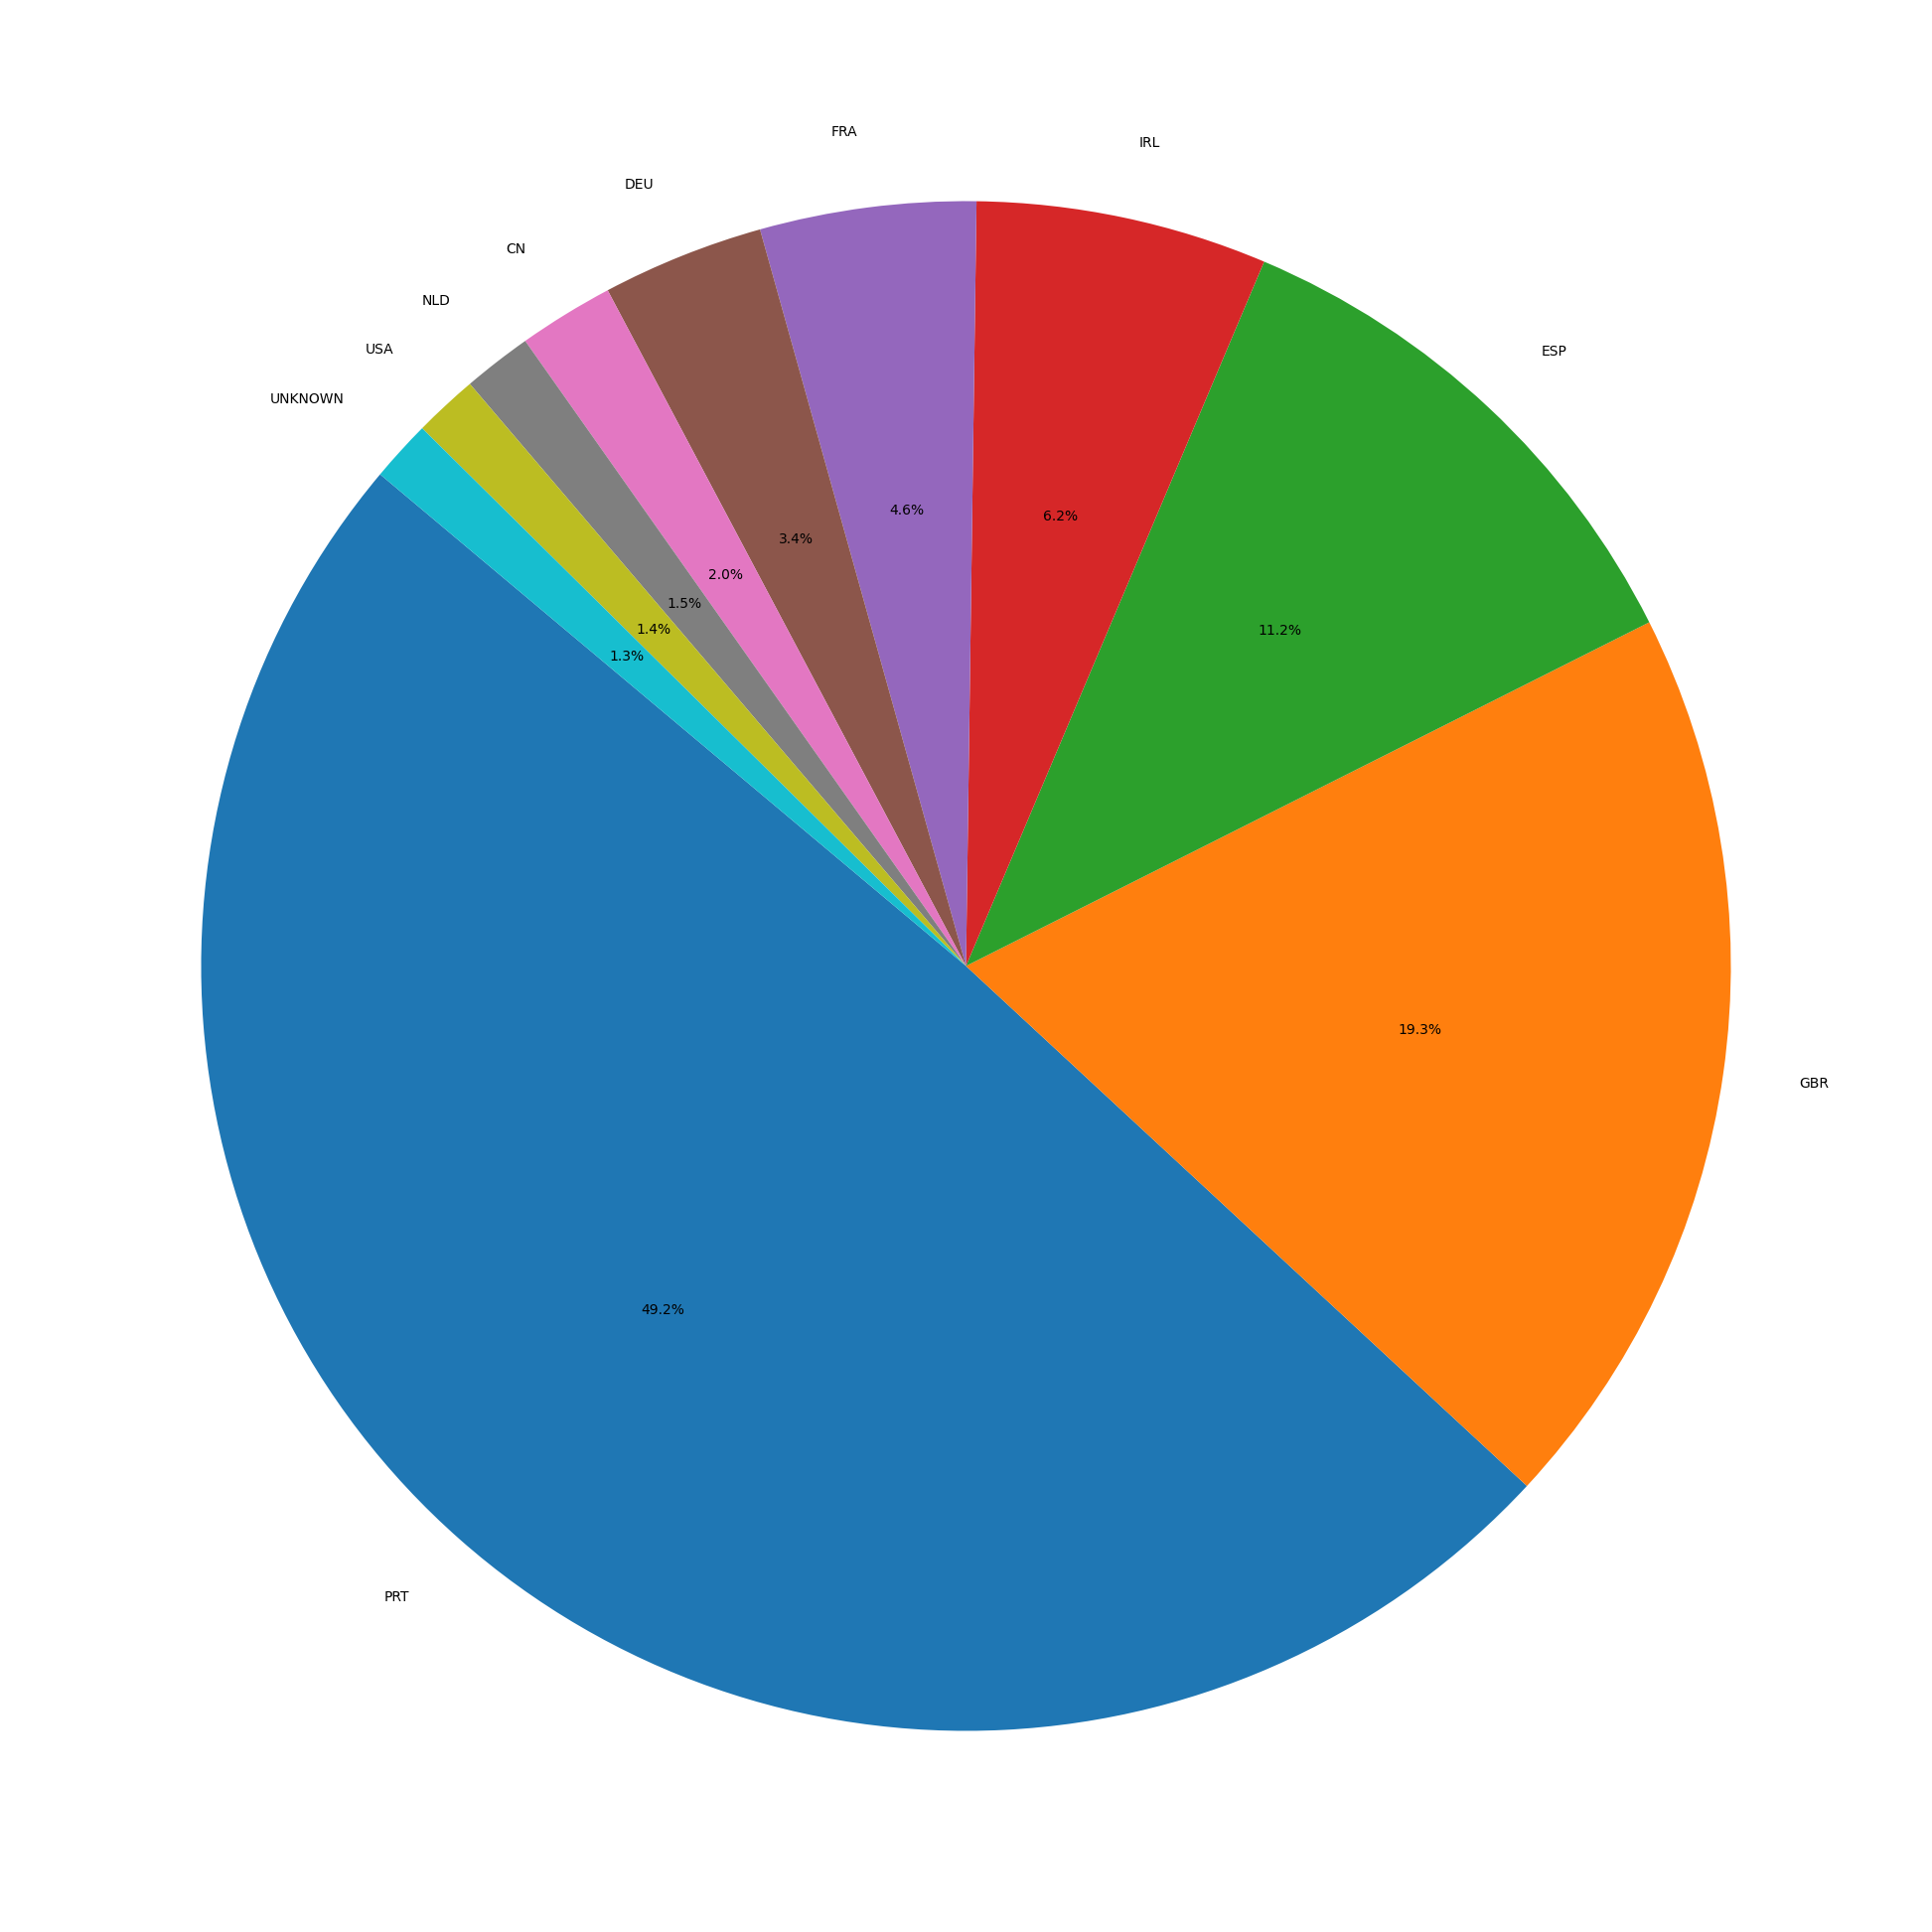

In [334]:
plt.figure(figsize=(25, 25))
plt.pie(resort_cust_country['count'], labels=resort_cust_country['country'], autopct='%1.1f%%', startangle=140)
plt.show()

- 자국인 포르투갈 손님이 제일 많고 그다음로는 영국 손님이 많았습니다

In [335]:
resort_cust_country_status=resort_hotel.groupby(['country','reservation_status'])['country'].size().sort_values(ascending=False).head(15).reset_index(name='count')

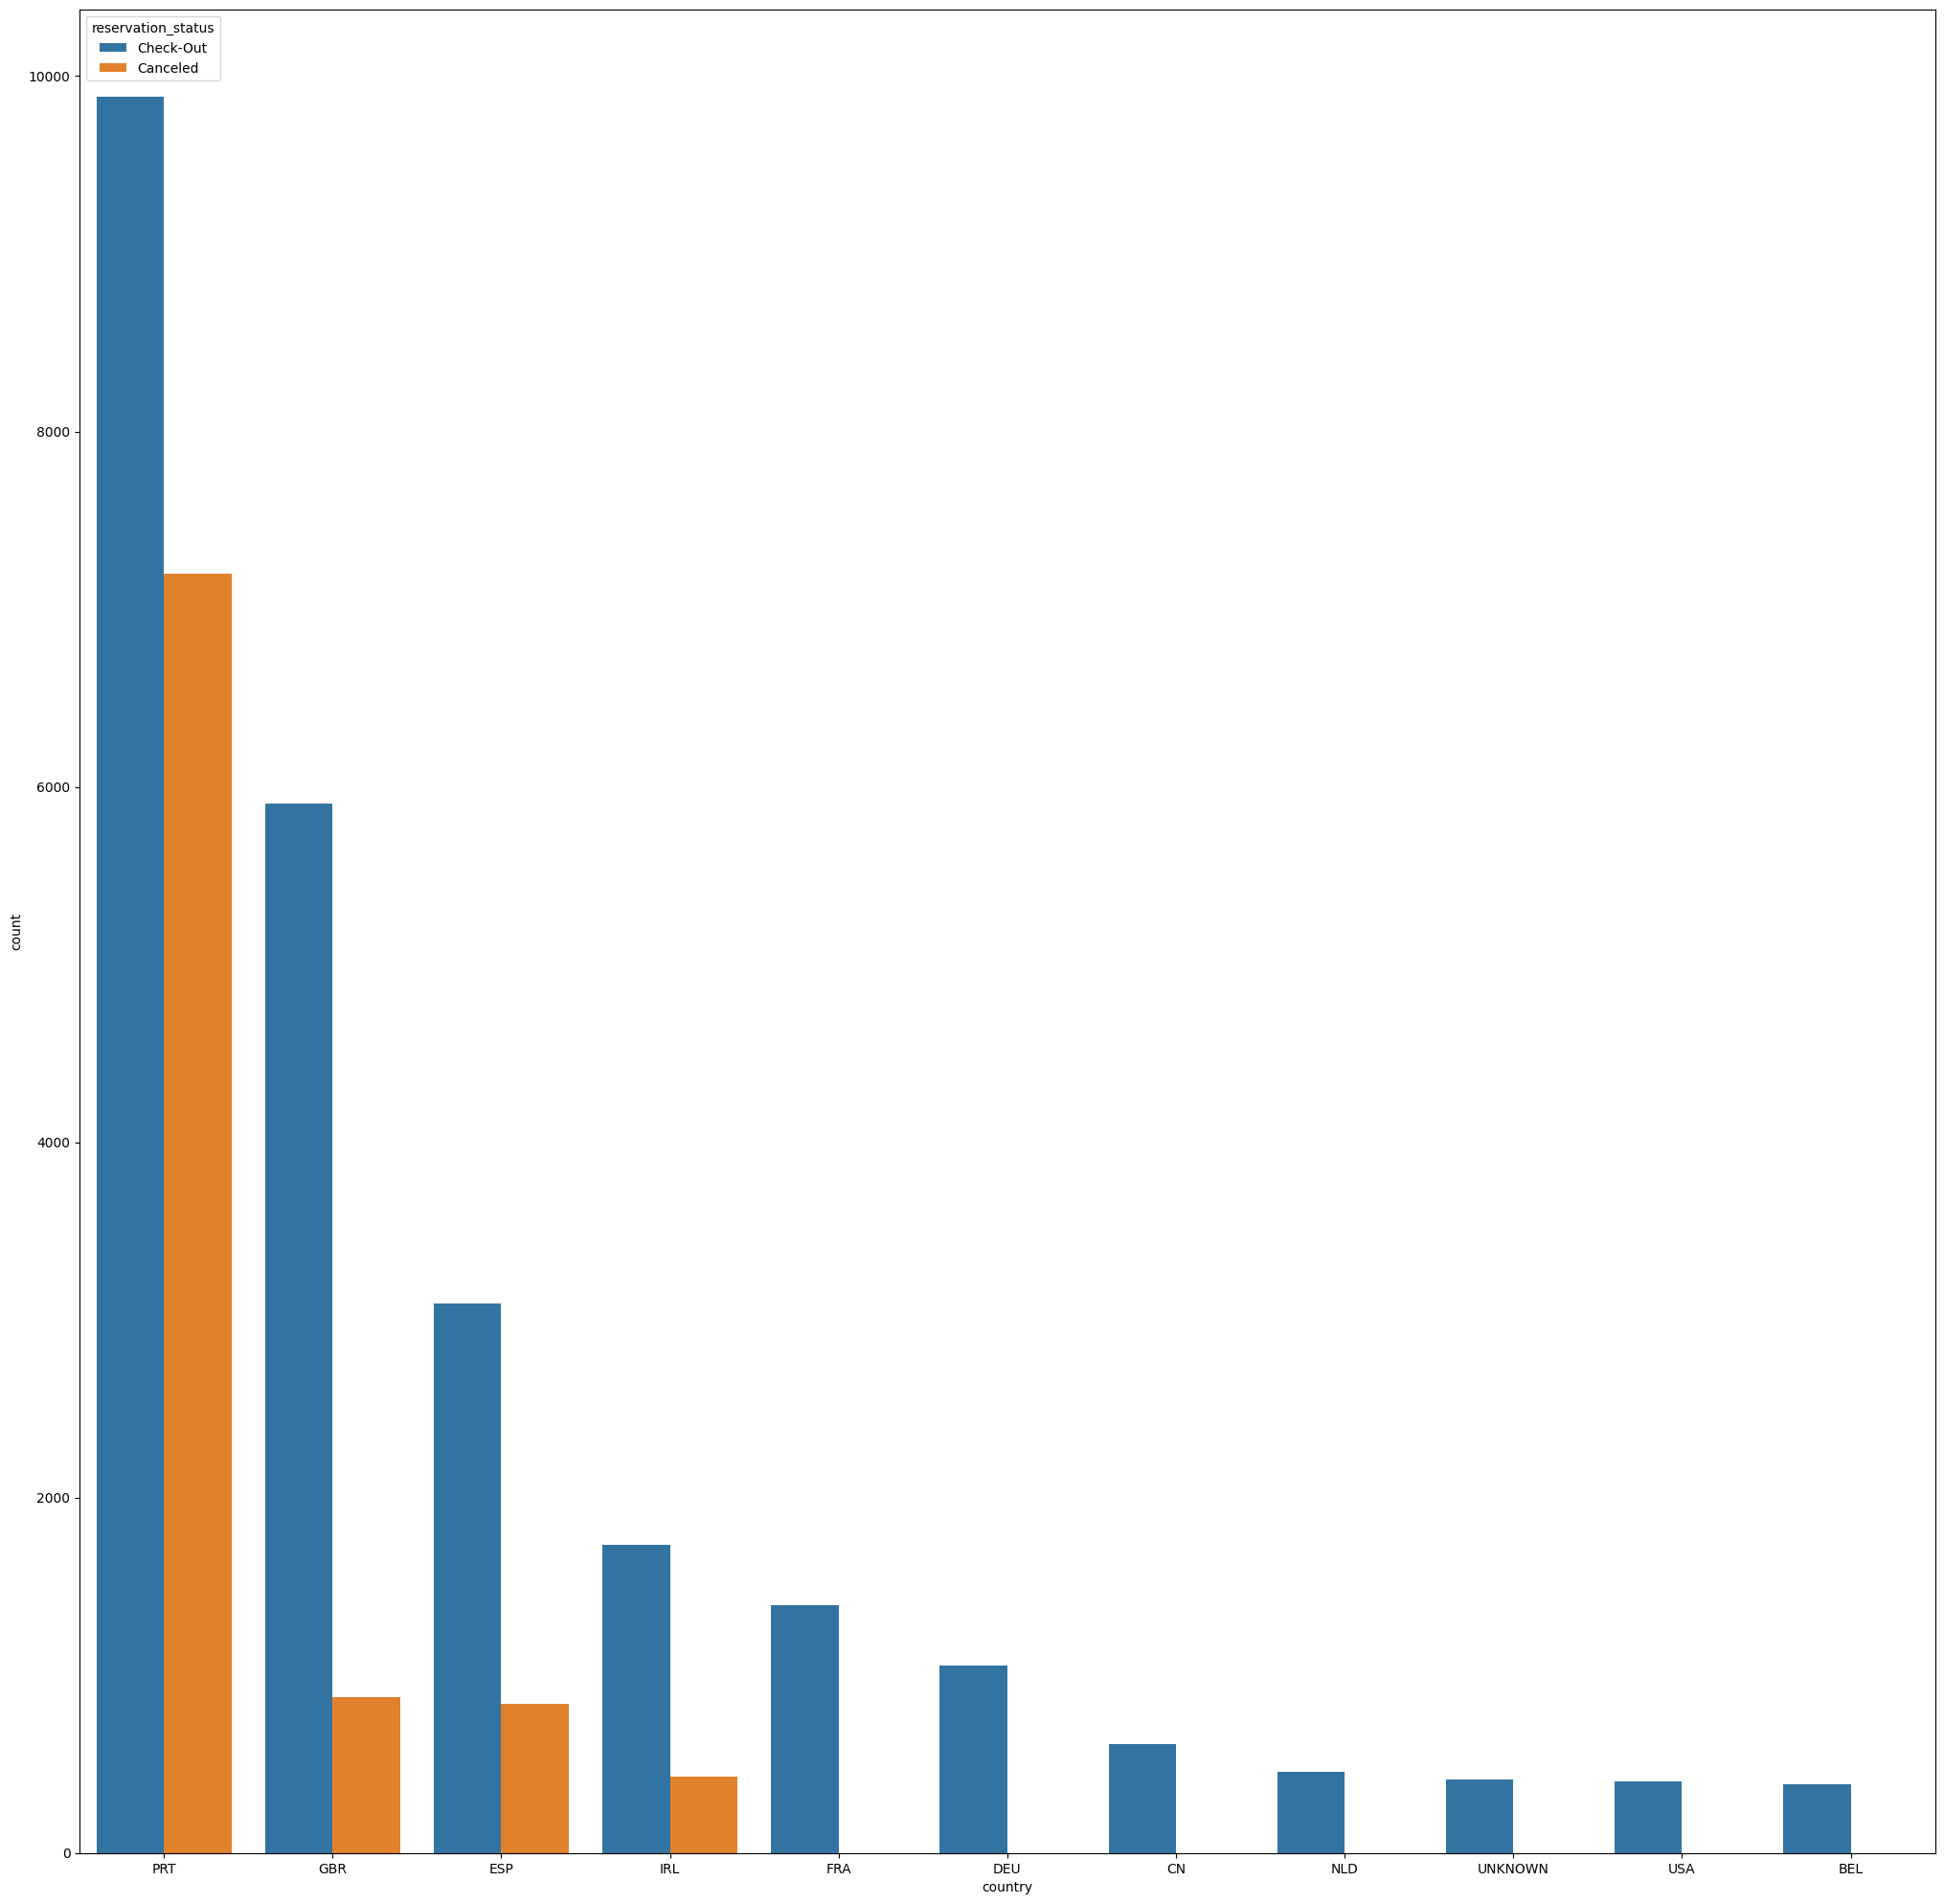

In [336]:
plt.figure(figsize=(25, 25))
sns.barplot(data=resort_cust_country_status, x='country', y='count',hue='reservation_status')
plt.show()

- 리조트 호텔은 가까이 있는 포르투갈 사람들이 취소가 많고 그 외에는 취소률이 낮음

In [337]:
resort_country_month=resort_hotel.groupby(['country','arrival_date_month']).size().sort_values(ascending=False).head(60).reset_index(name='count')

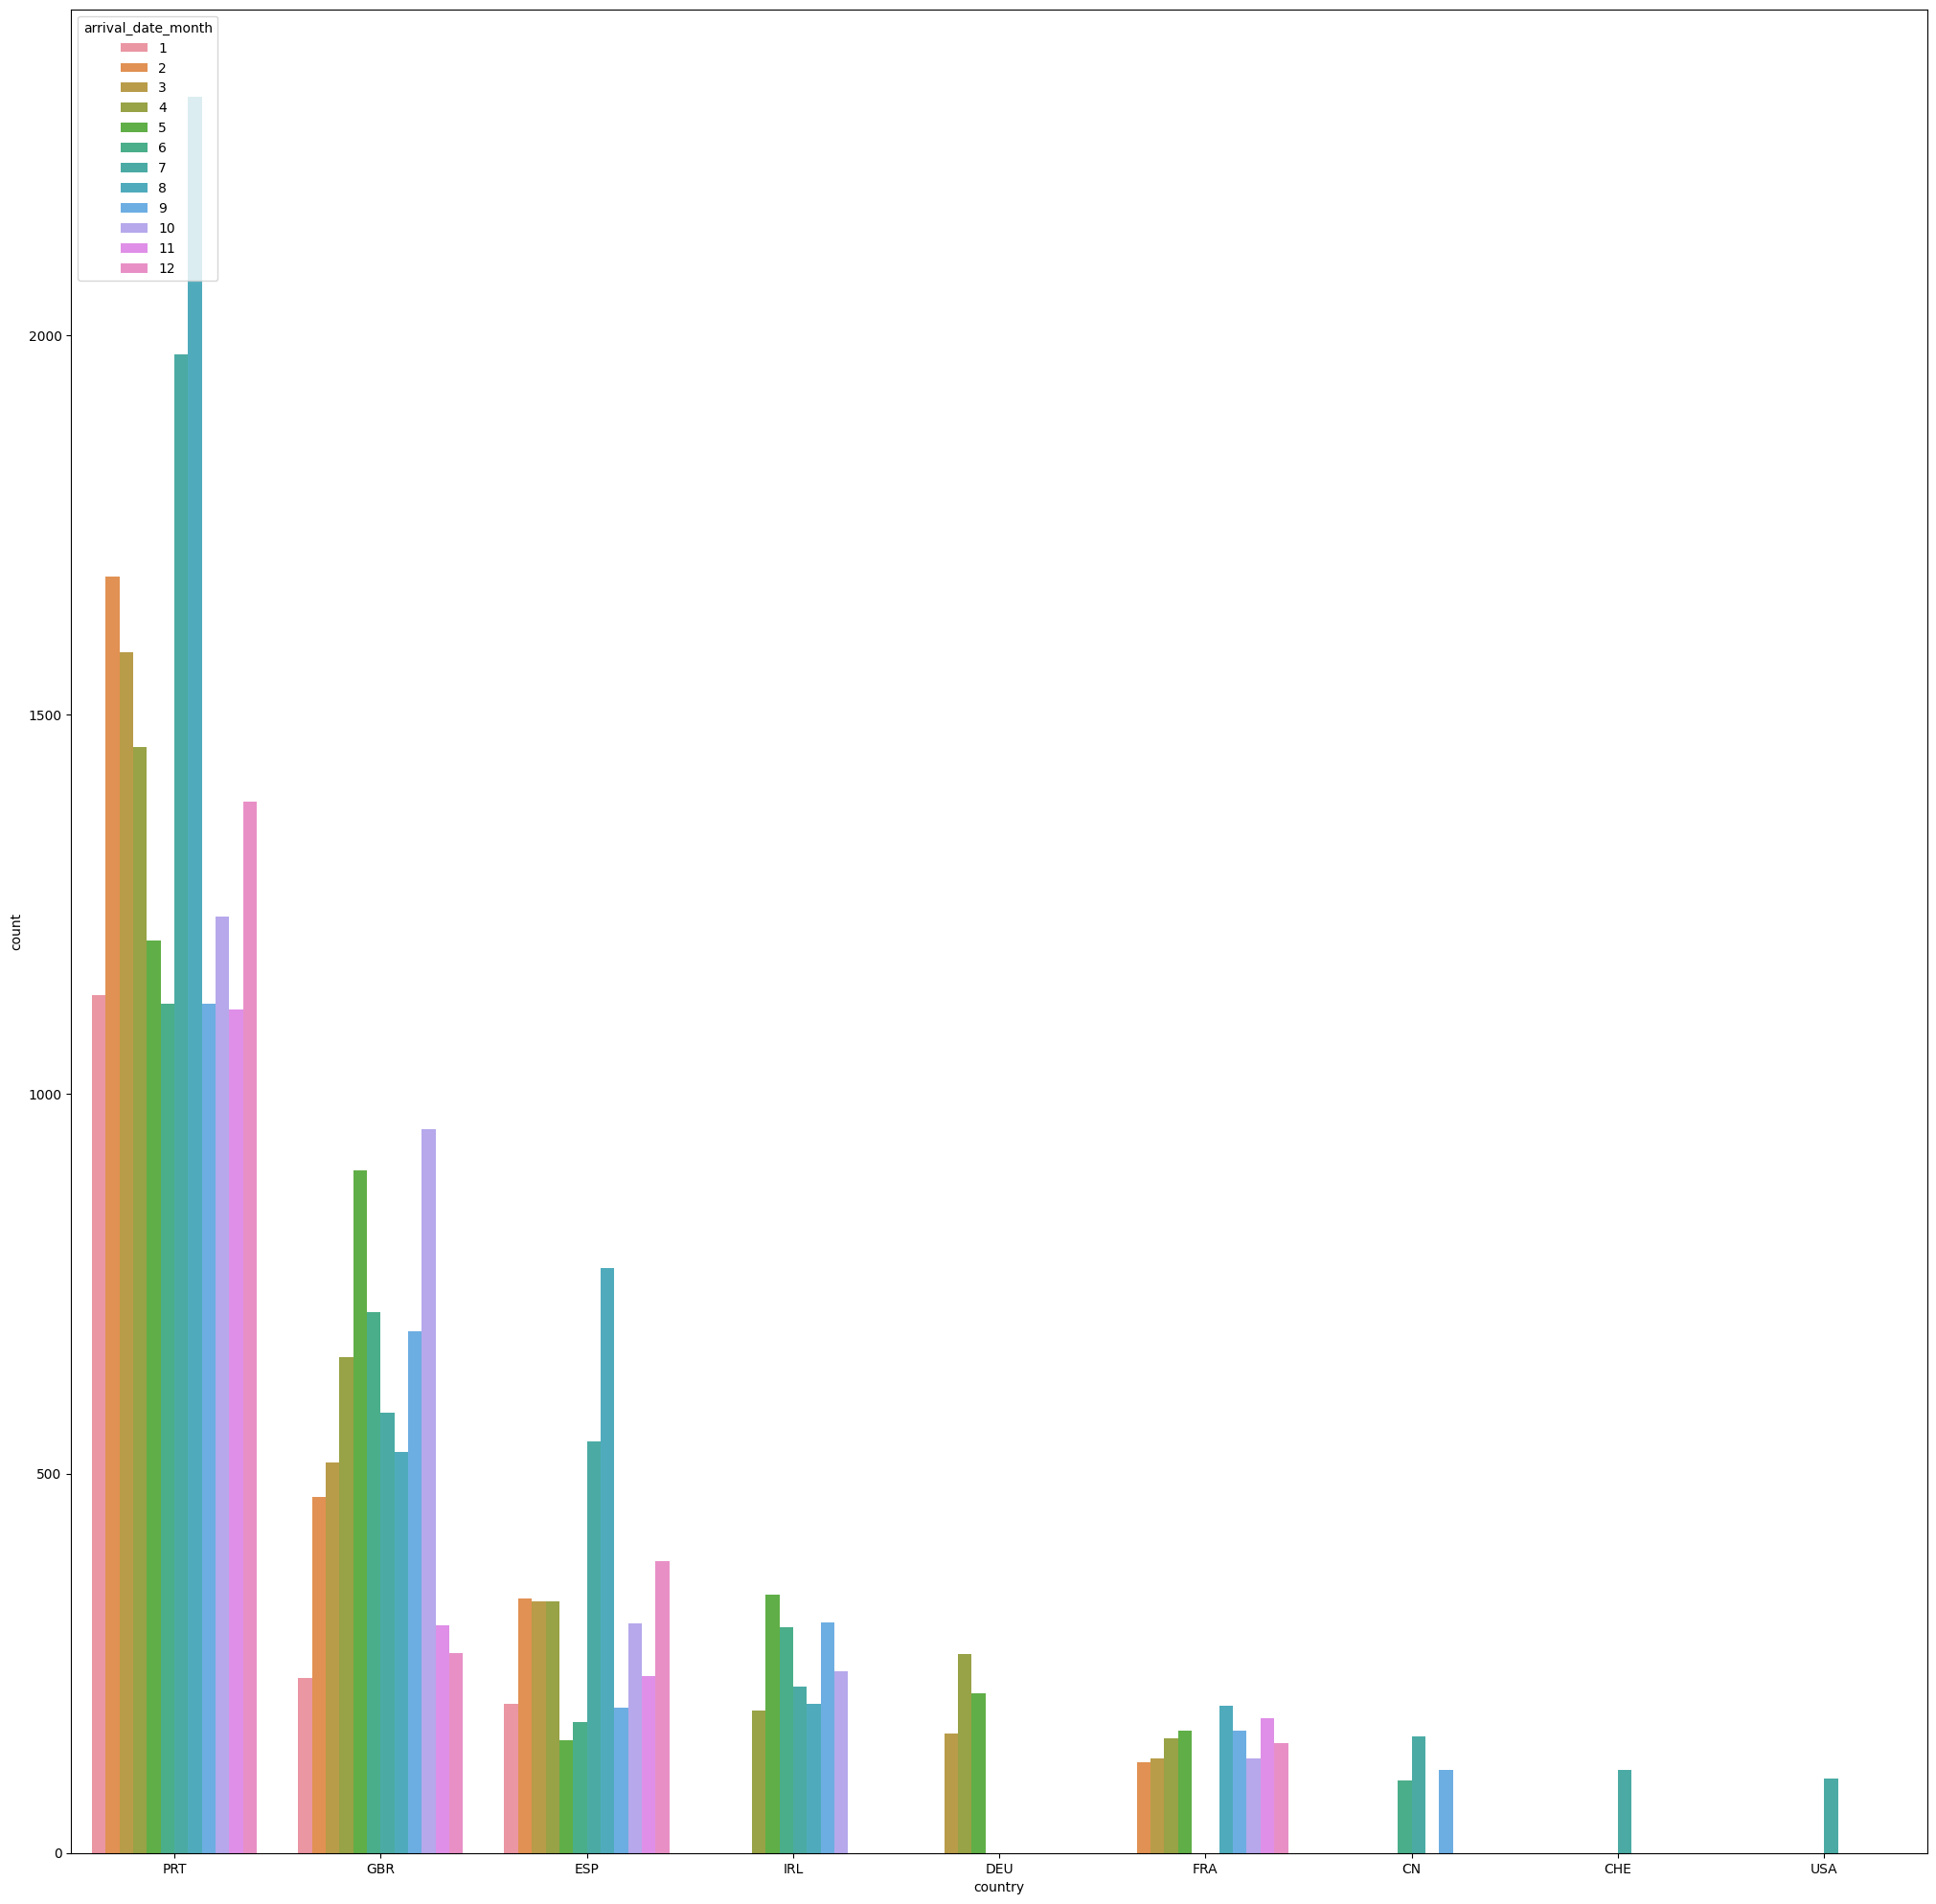

In [338]:
plt.figure(figsize=(25, 25))
sns.barplot(data=resort_country_month, x='country', y='count',hue='arrival_date_month')
plt.show()

- 포르투갈은 8월 영국은 금요일에 예약을 많이 함

In [339]:
resort_meal=resort_hotel.groupby(['meal','reservation_status'])['reservation_status'].size().reset_index(name='count')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


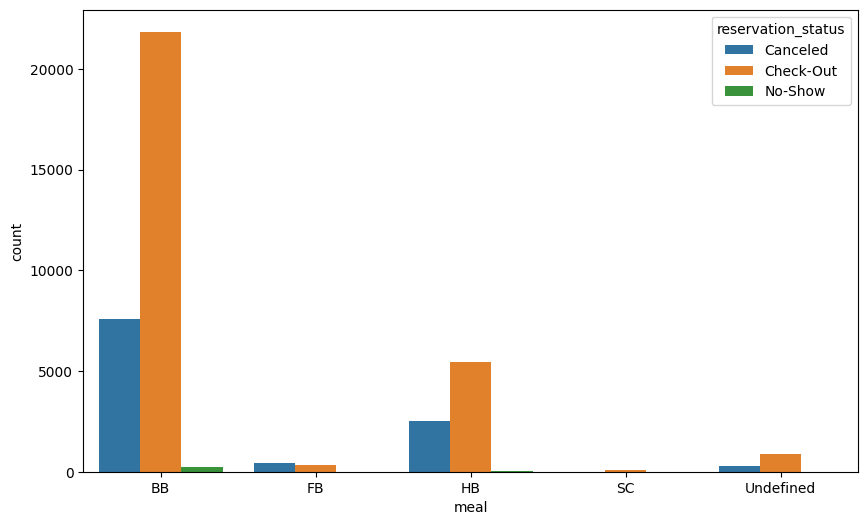

In [340]:
plt.figure(figsize=(10, 6))
sns.barplot(data=resort_meal, x='meal', y='count', hue='reservation_status')
plt.show()

- 아침만 신청한 사람이 많은데 식사는 취소에 큰 영향이 없는듯하다

In [341]:
resort_visit_month = resort_hotel.groupby(['arrival_date_month','reservation_status'])['reservation_status'].size().reset_index(name='count')

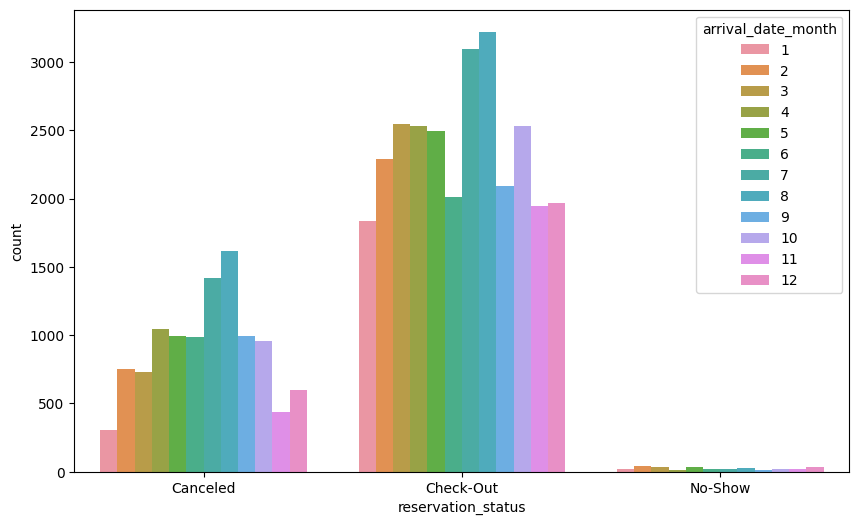

In [342]:
plt.figure(figsize=(10, 6))
sns.barplot(data=resort_visit_month, x='reservation_status', y='count', hue='arrival_date_month')
plt.show()

- 휴가철인 7월8월에 예약이 많고 취소률도 고르게 분포되있습니다 

In [343]:
resort_visit_day = resort_hotel.groupby(['reservation_status','day_of_week'])['reservation_status'].size().reset_index(name='count')

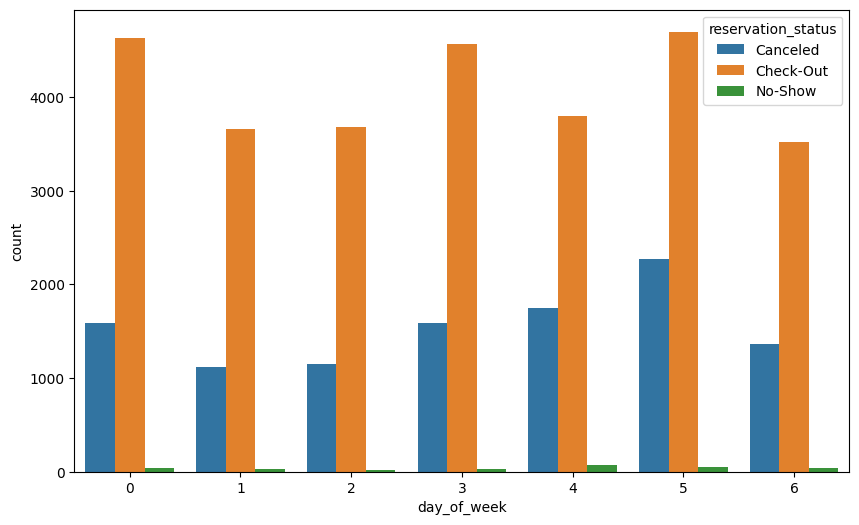

In [344]:
plt.figure(figsize=(10, 6))
sns.barplot(data=resort_visit_day, x='day_of_week', y='count', hue='reservation_status')
plt.show()

- 월요일 목요일 토요일 예약이 많음
- 요일도 고르게 취소률이 분포 되있어 요일에는 취소에 큰 영향이 없다.

In [345]:
resort_hotel_market = resort_hotel.groupby(['reservation_status','market_segment'])['reservation_status'].count().reset_index(name='count')

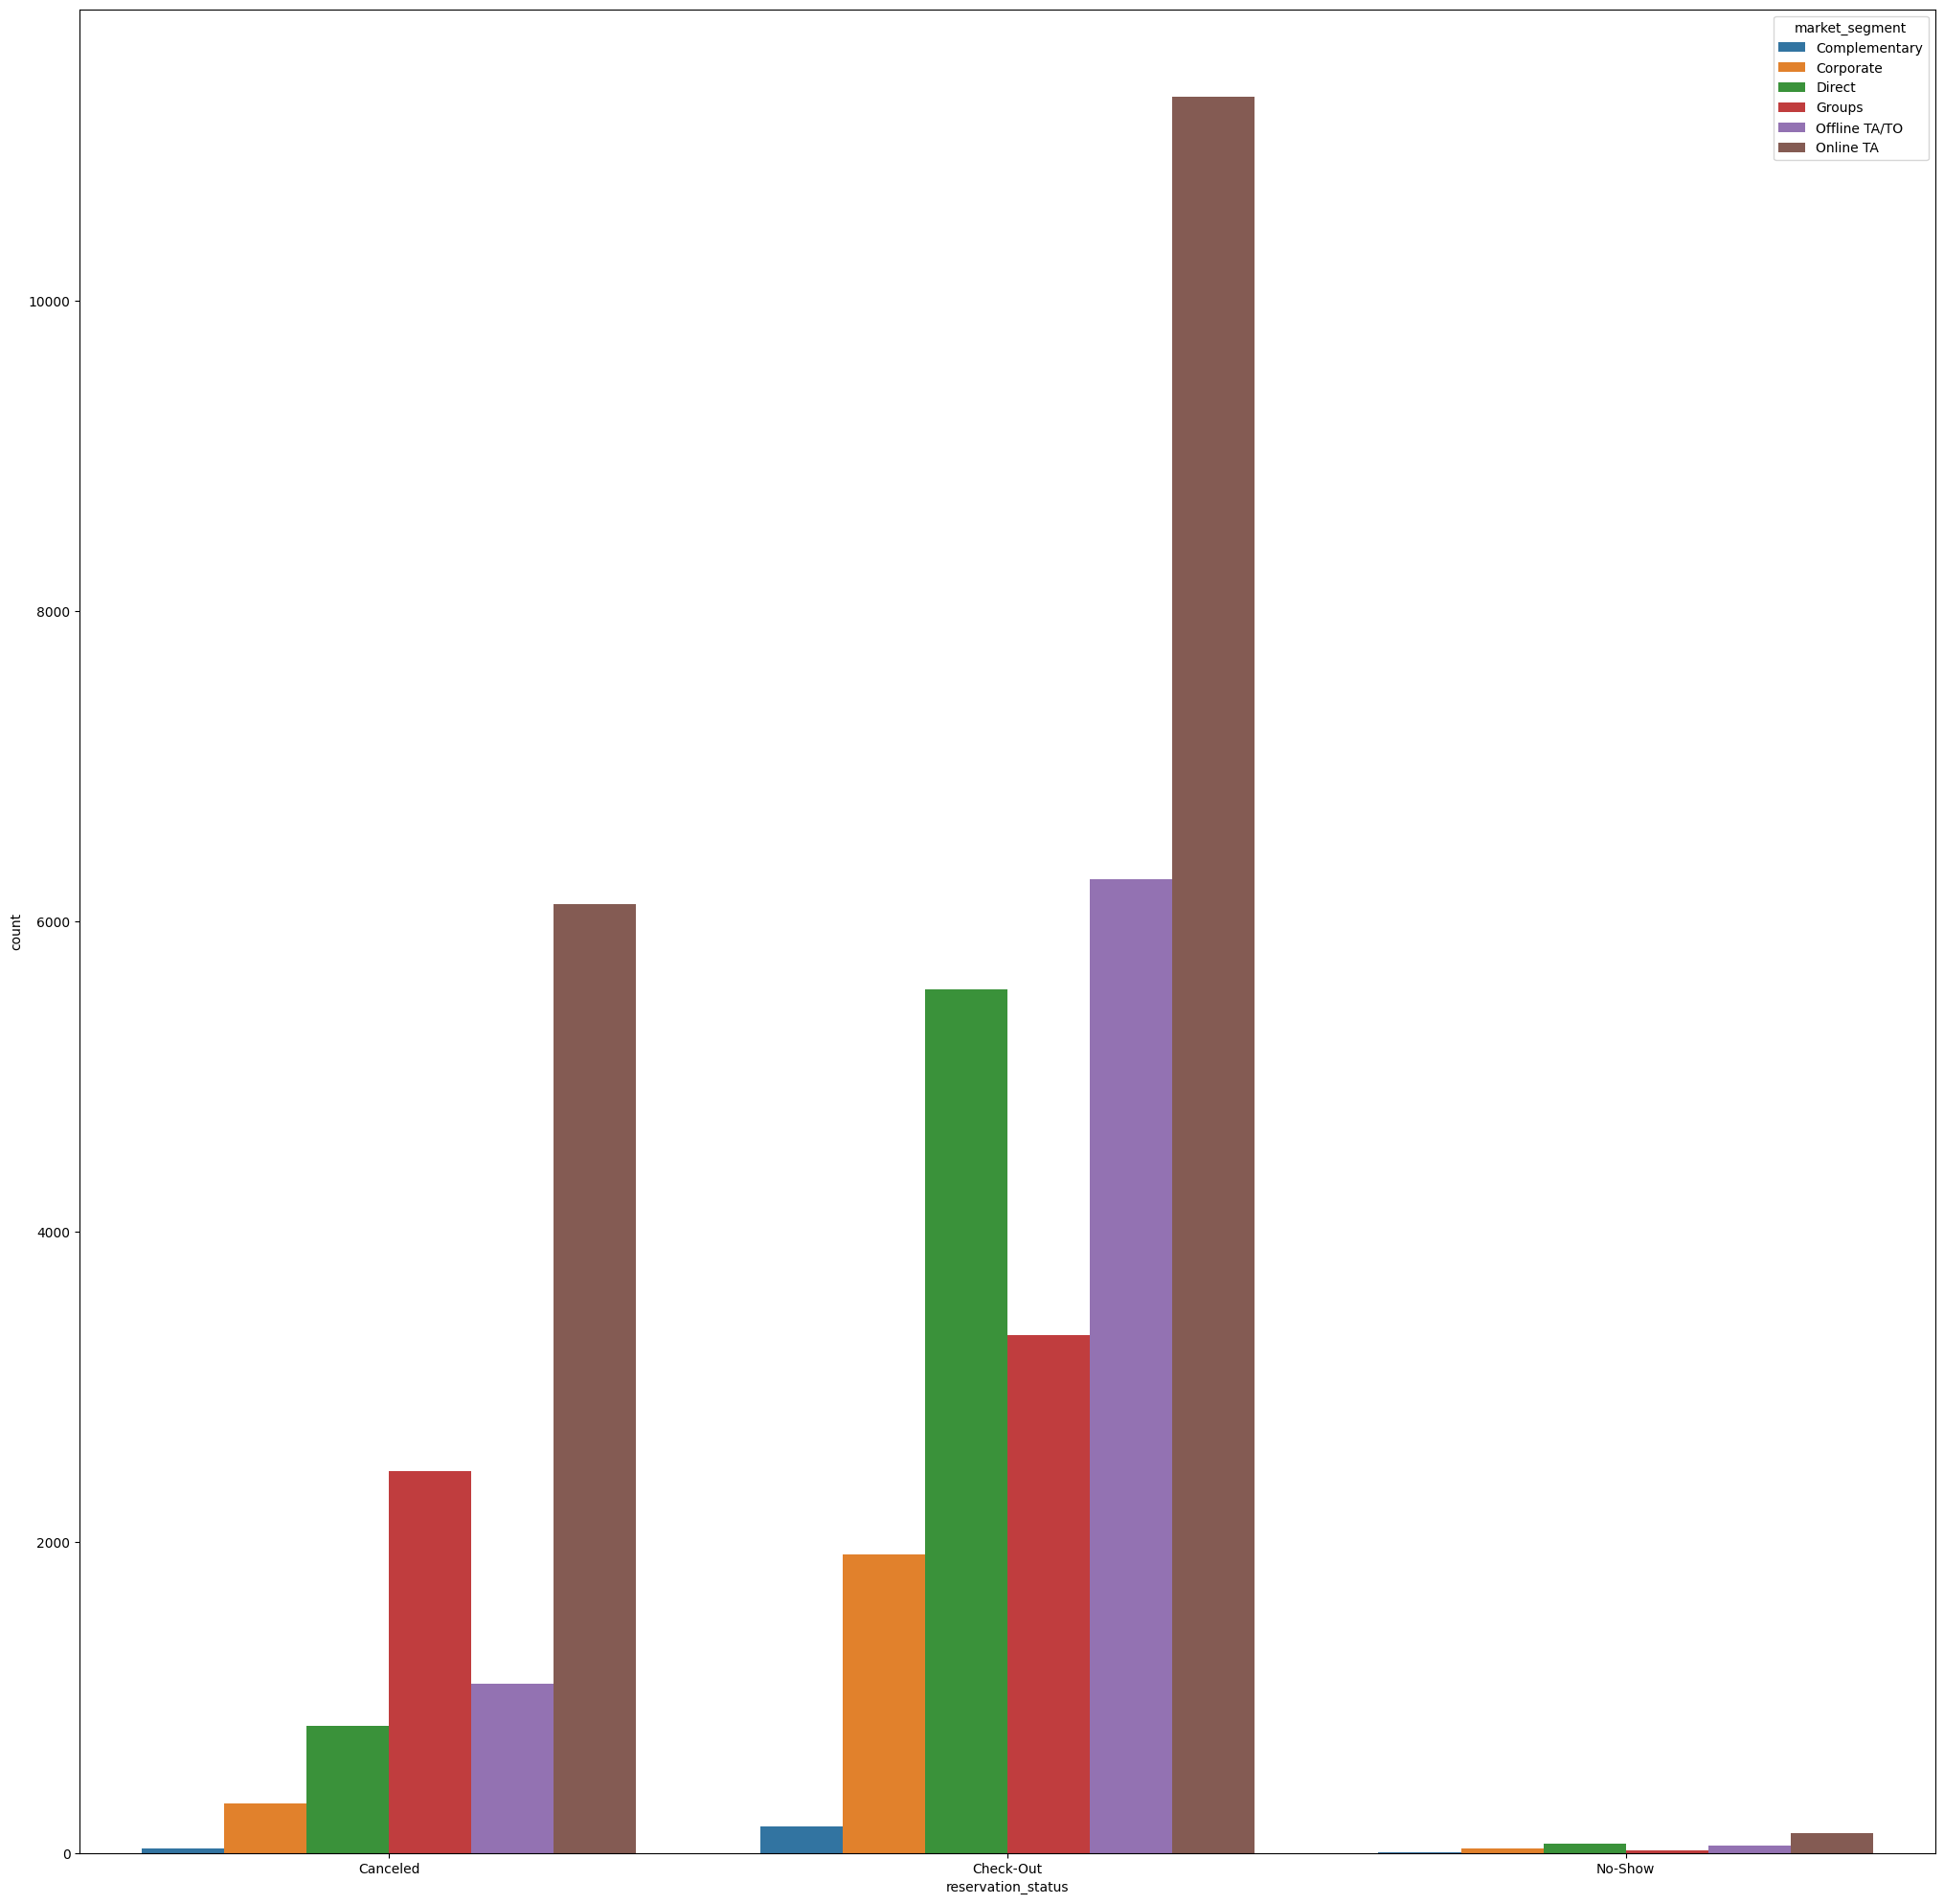

In [346]:
plt.figure(figsize=(25, 25))
sns.barplot(data=resort_hotel_market, x='reservation_status', y='count',hue='market_segment')
plt.show()

- 리조트호텔은 온라인으로 예약을 쉽게하지만 취소도 쉽게 합니다.
- 오프라인 여행사도 많이 예약하는데 취소률은 적은것을 알수있습니다.

In [347]:
resort_hotel_segment = resort_hotel.groupby(['reservation_status','distribution_channel'])['reservation_status'].count().reset_index(name='count')

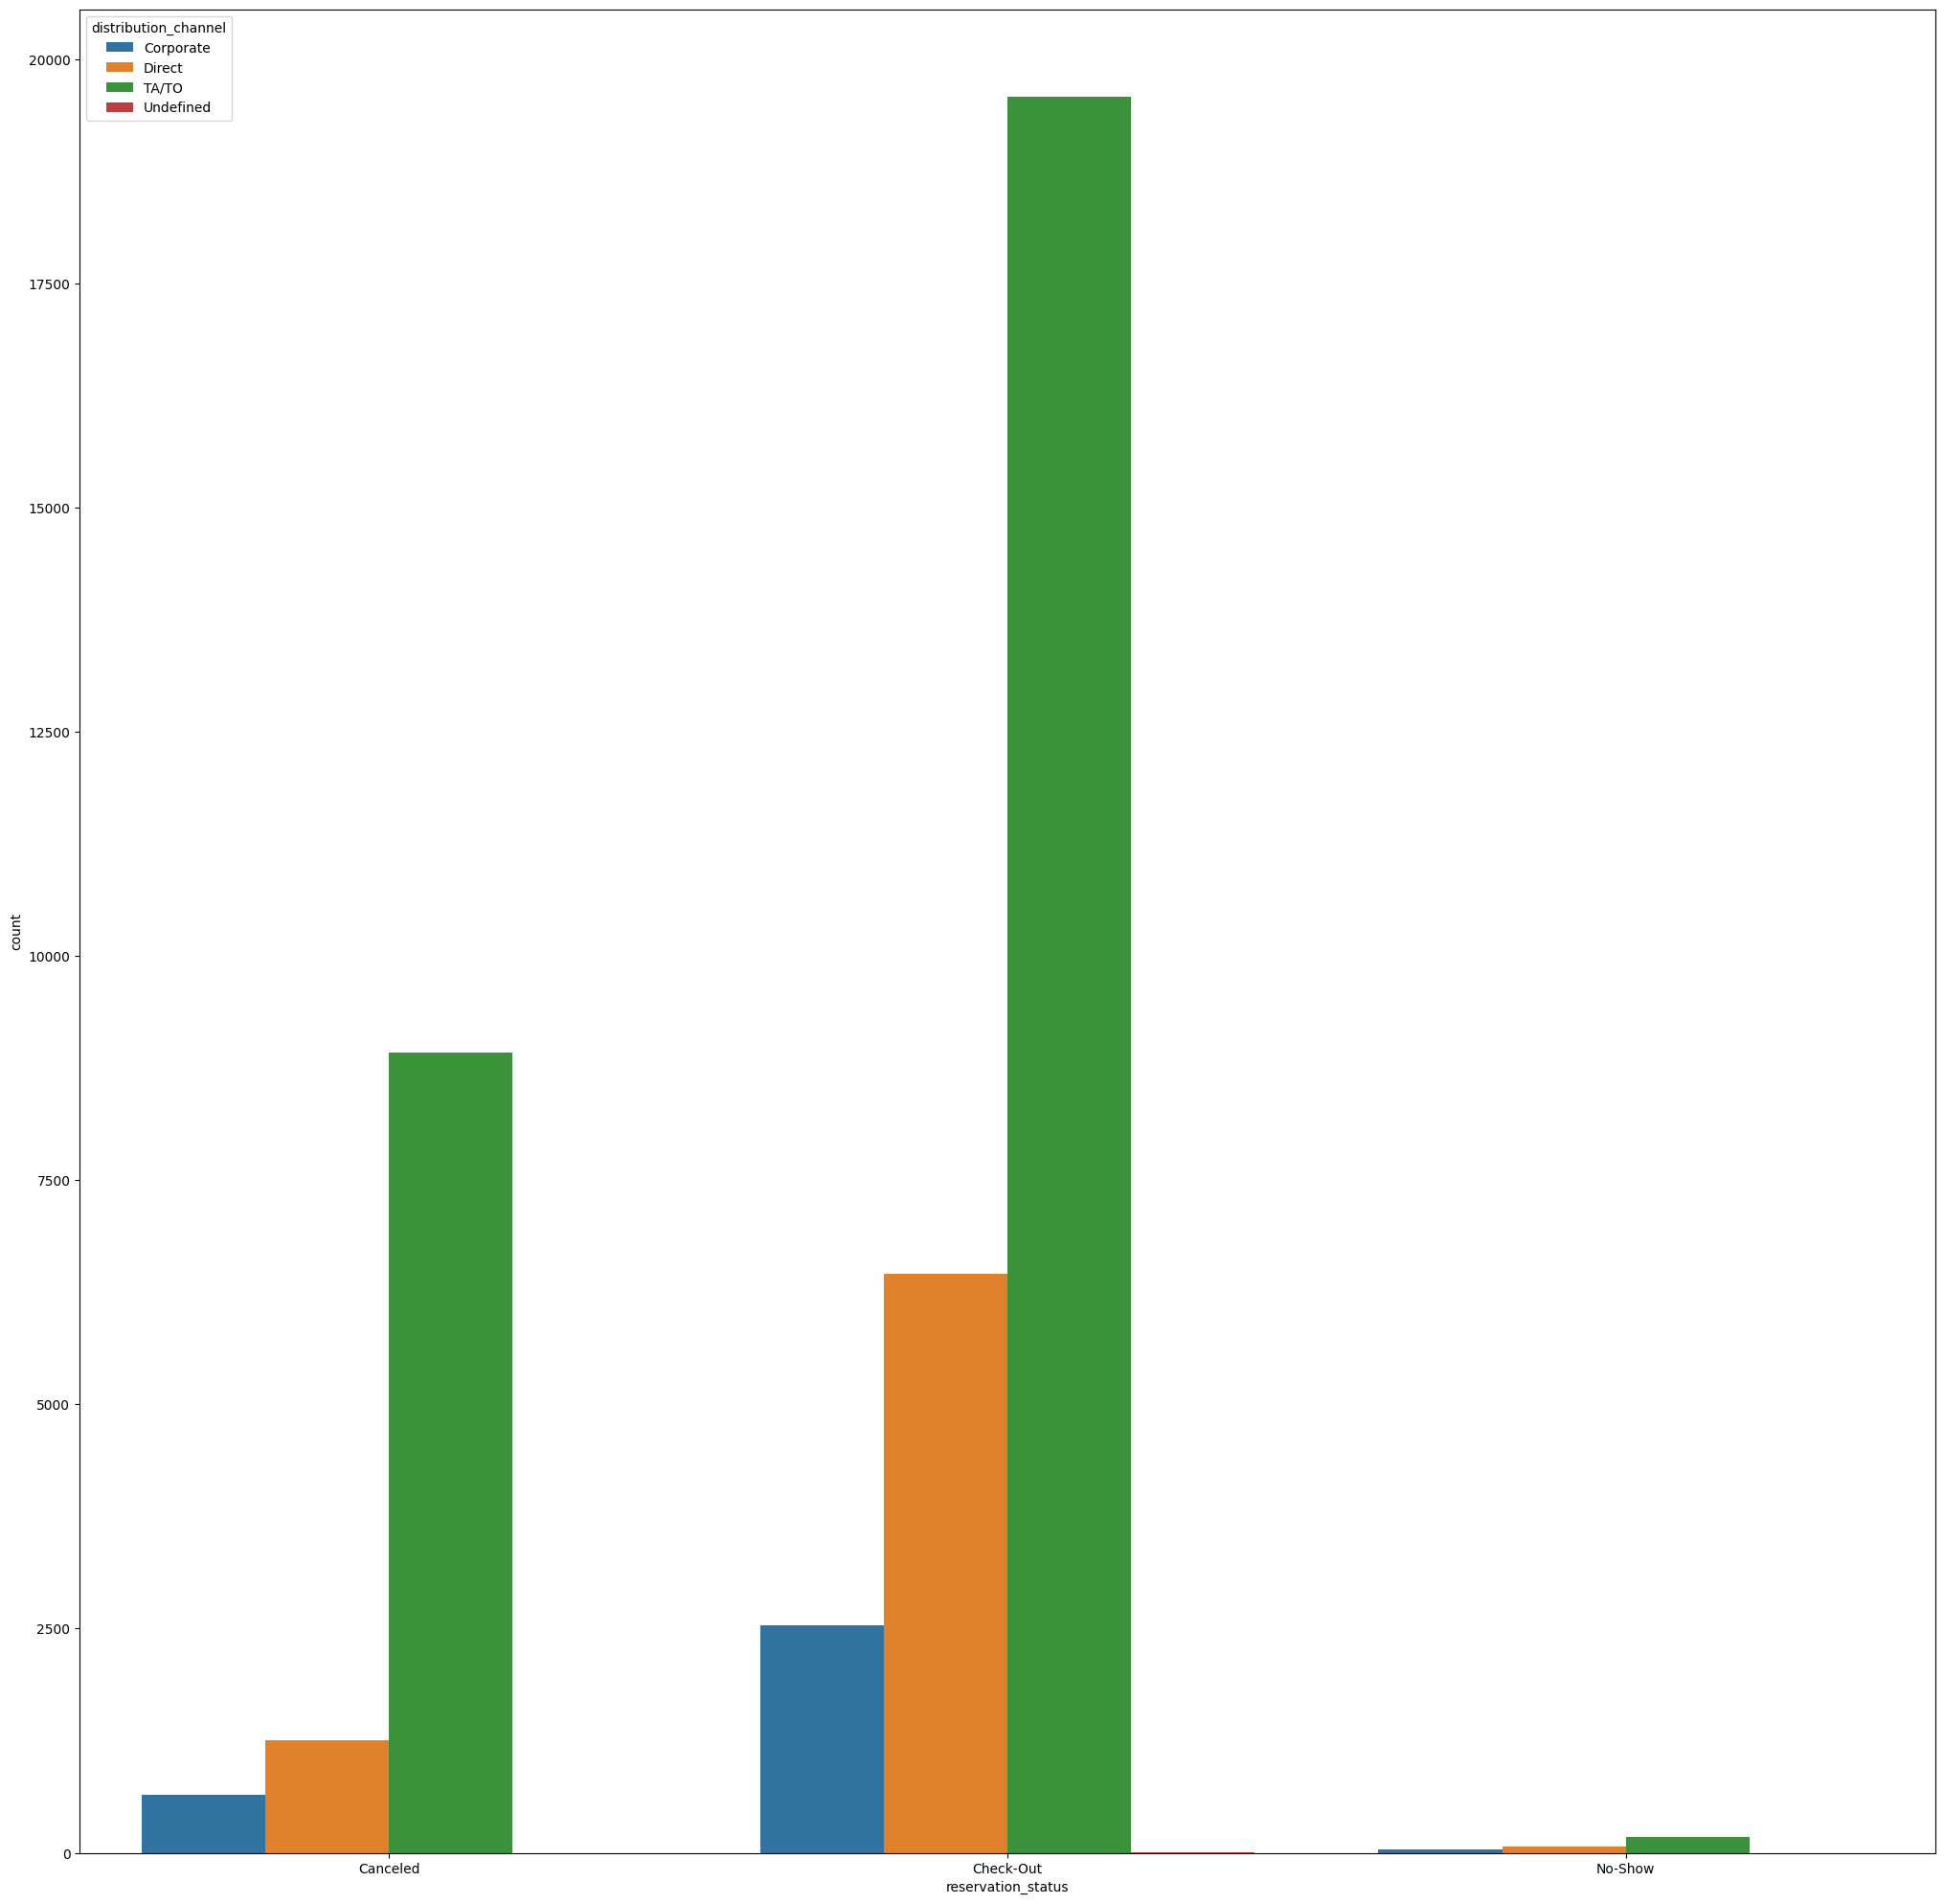

In [348]:
plt.figure(figsize=(25, 25))
sns.barplot(data=resort_hotel_segment, x='reservation_status', y='count',hue='distribution_channel')
plt.show()

- 여행사를 많이 이용합니다

In [349]:
resort_special_request = resort_hotel.groupby(['total_of_special_requests','reservation_status'])['reservation_status'].size().reset_index(name='count')

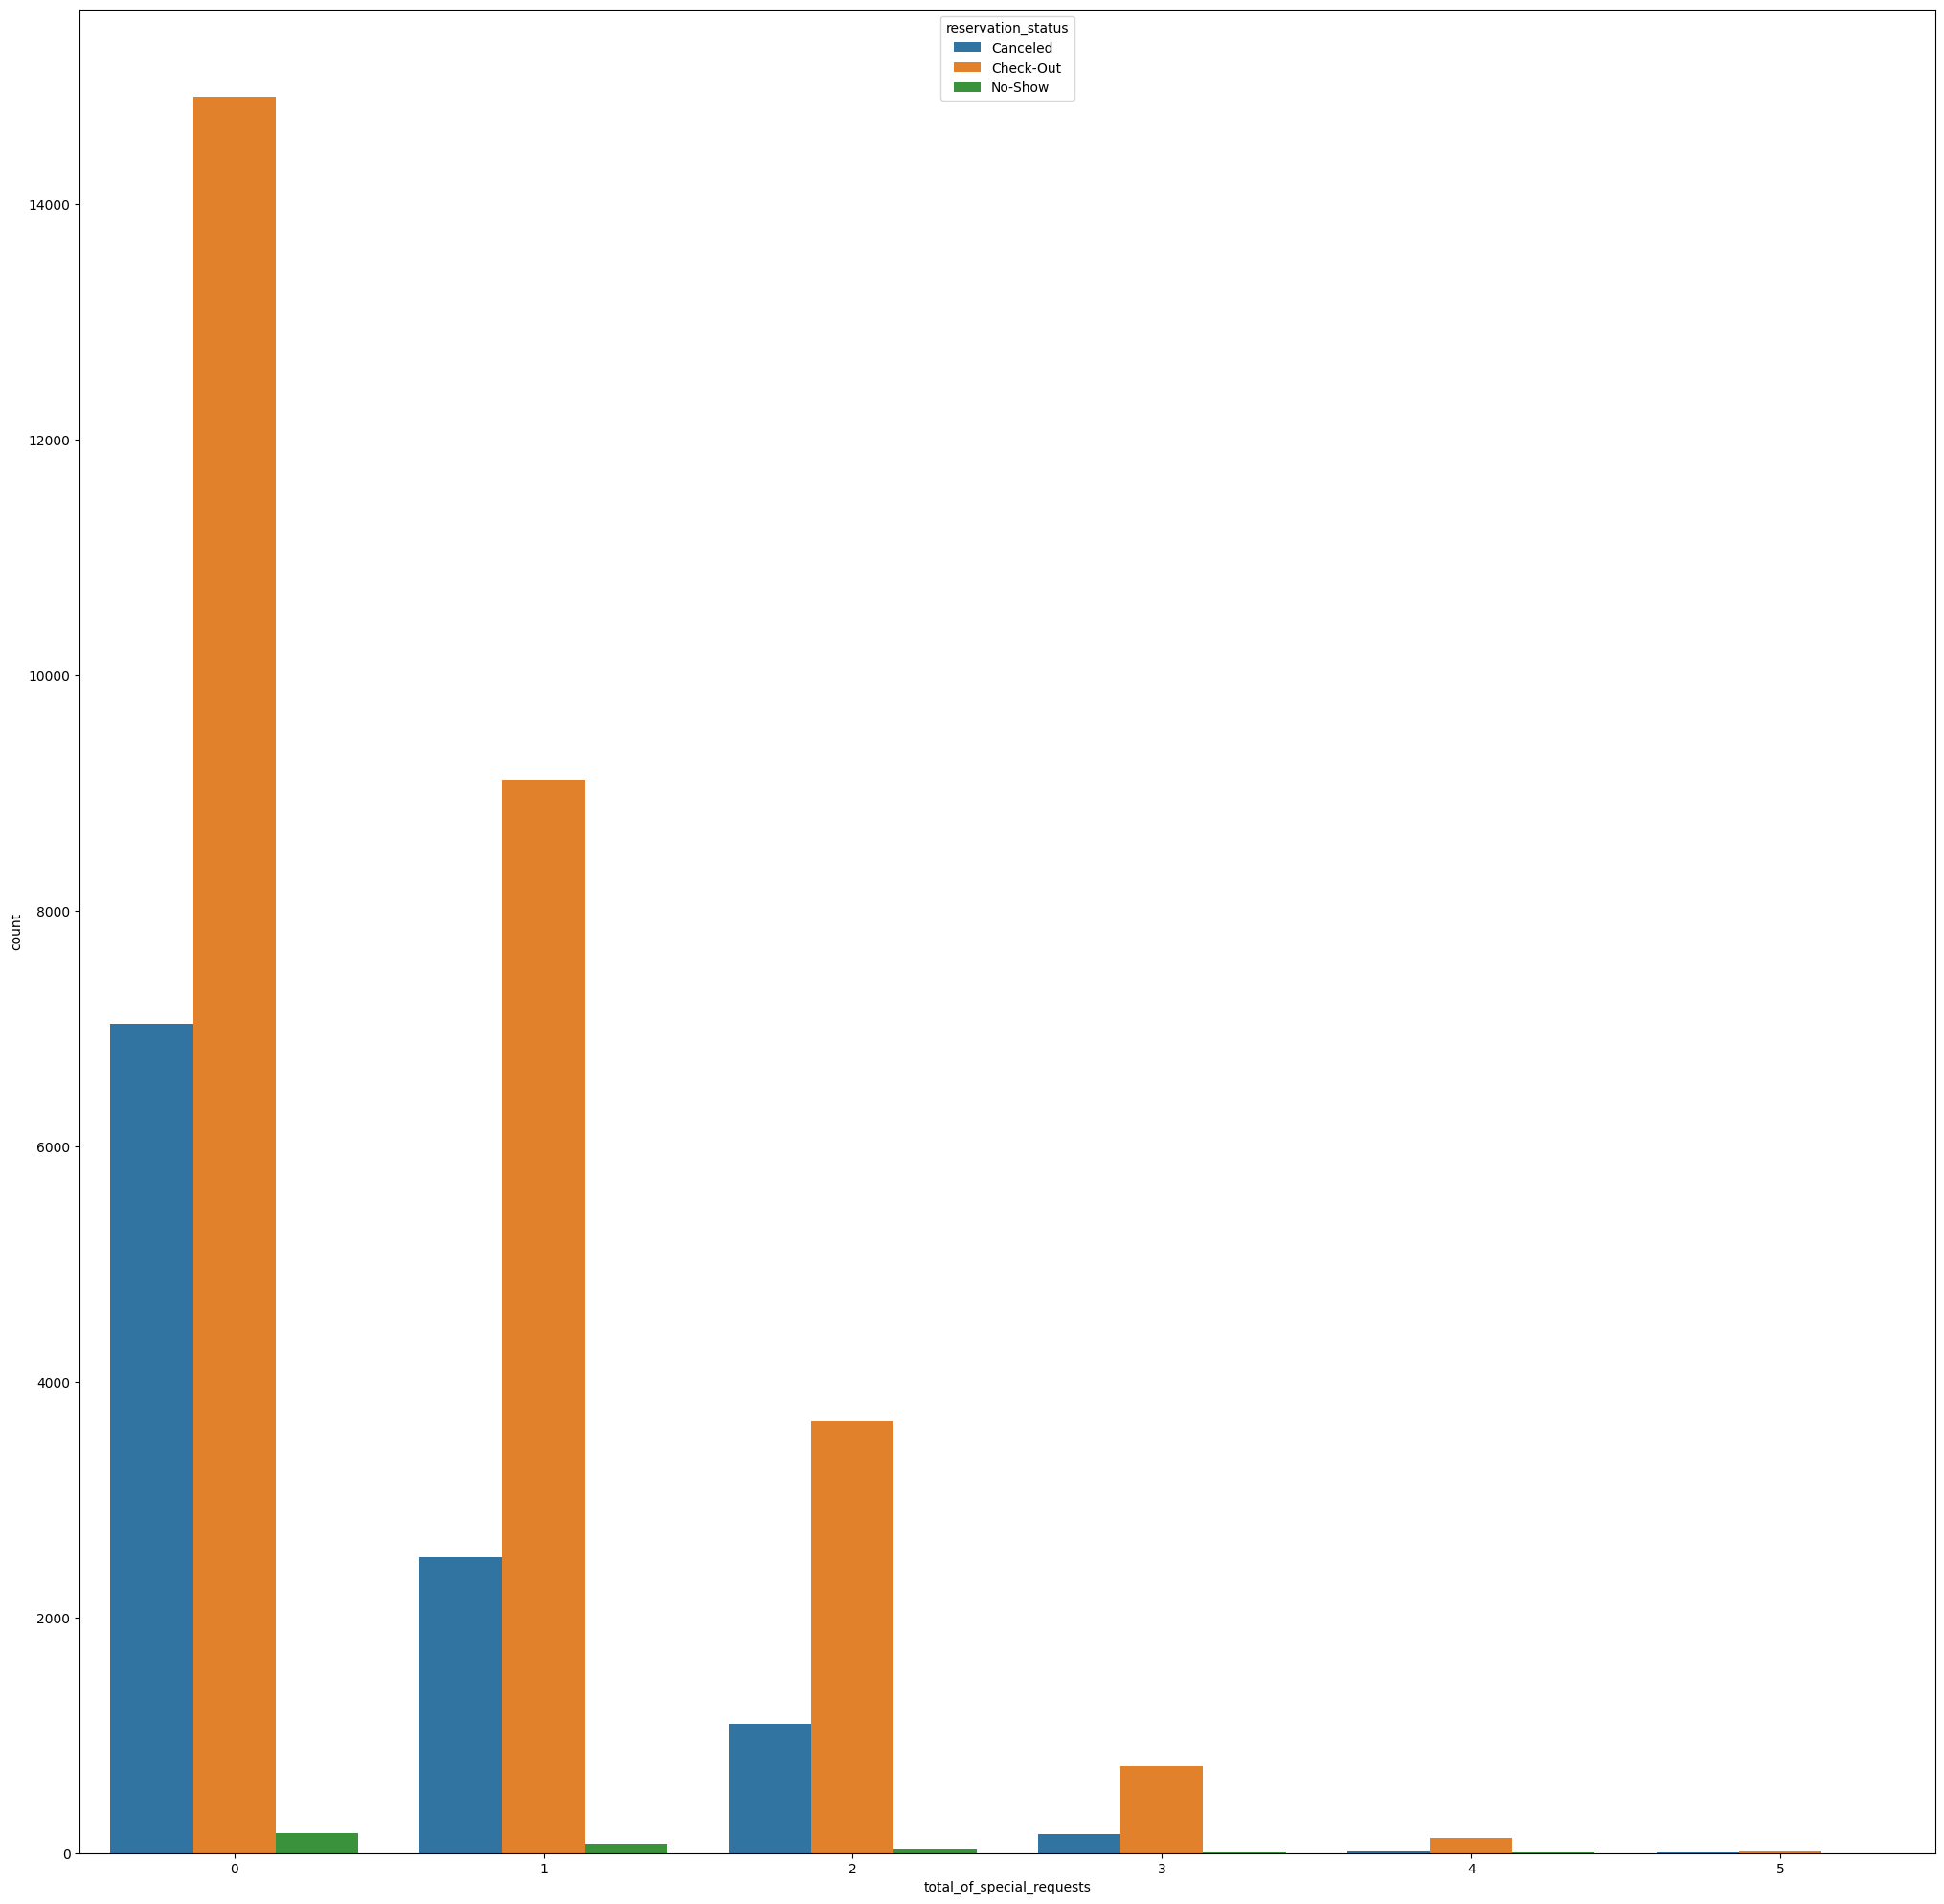

In [350]:
plt.figure(figsize=(25, 25))
sns.barplot(data=resort_special_request, x='total_of_special_requests', y='count',hue='reservation_status')
plt.show()

- 특별 요구가 없는 사람이 대부분이고 많은 사람들이 특별 요구와 상관 없이 방문을 합니다.

In [351]:
resort_changed_booking = resort_hotel.groupby(['reservation_status','booking_changes'])['reservation_status'].size().reset_index(name='count')

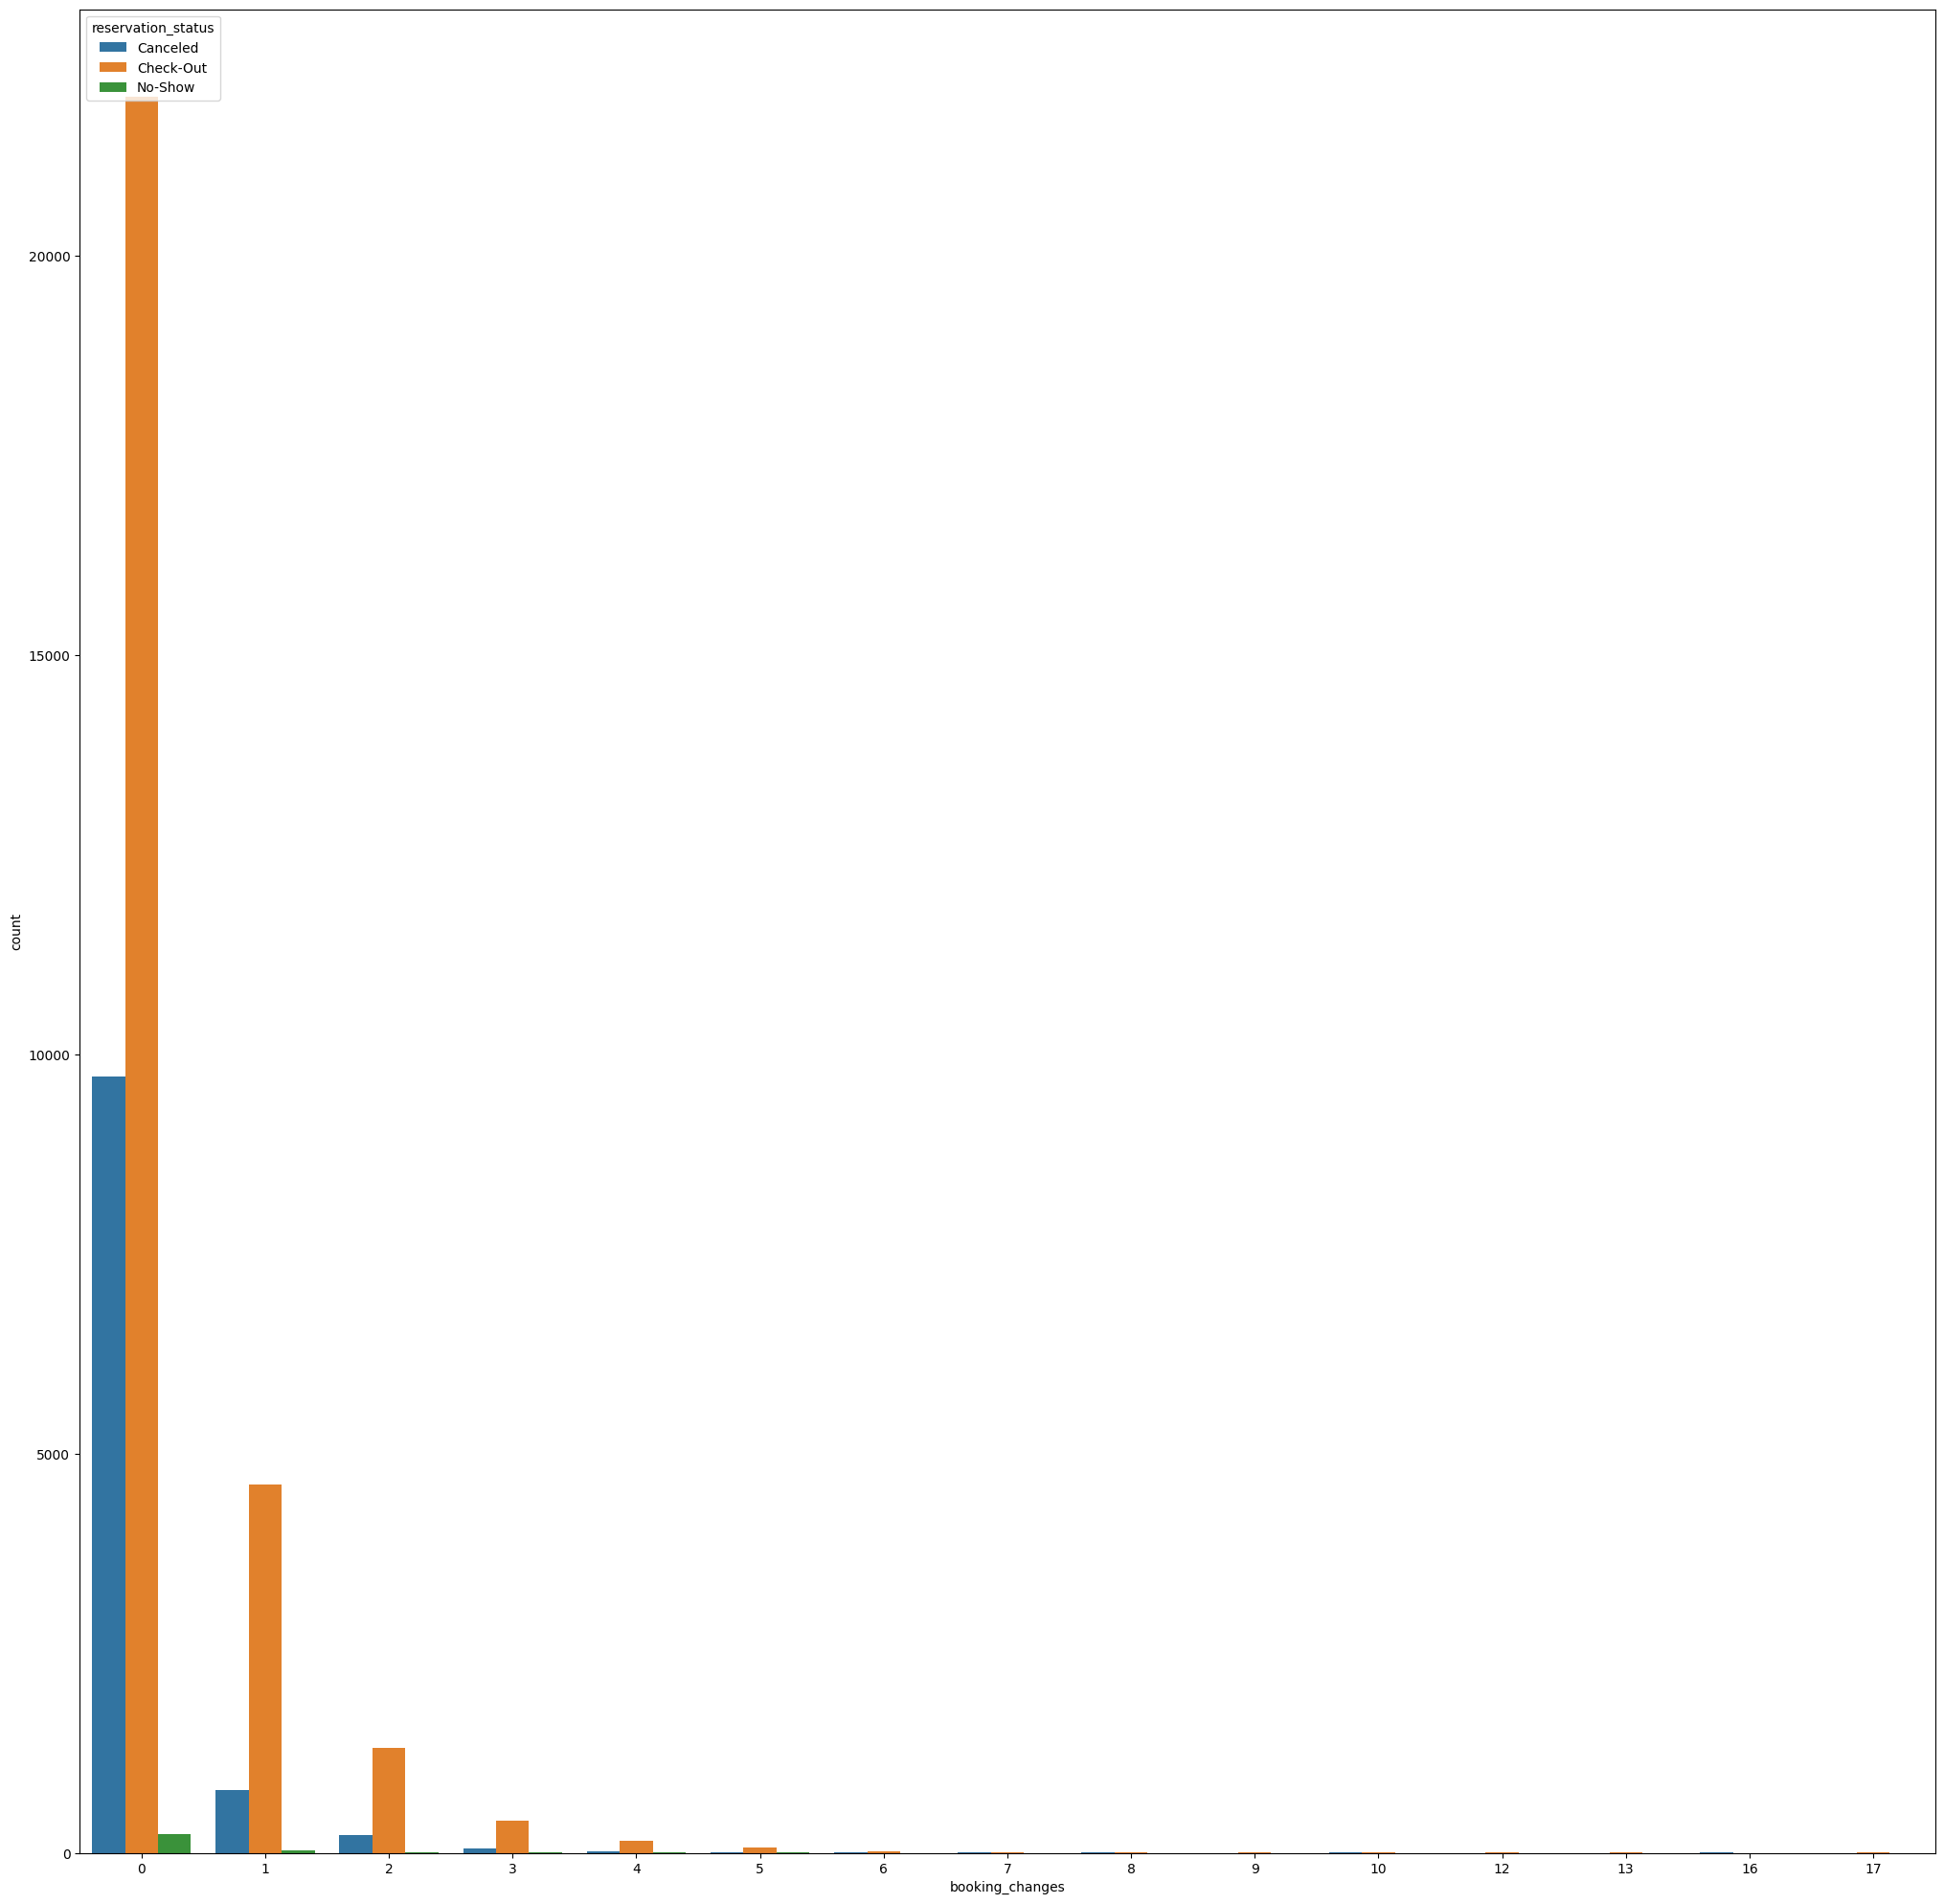

In [352]:
plt.figure(figsize=(25, 25))
sns.barplot(data=resort_changed_booking, x='booking_changes', y='count',hue='reservation_status')
plt.show()

- 예약 변경이 없는 손님들이 대부분이고 많이 방문을 합니다

In [353]:
resort_parking_request = resort_hotel.groupby(['reservation_status','total_of_special_requests'])['reservation_status'].count().reset_index(name='count')

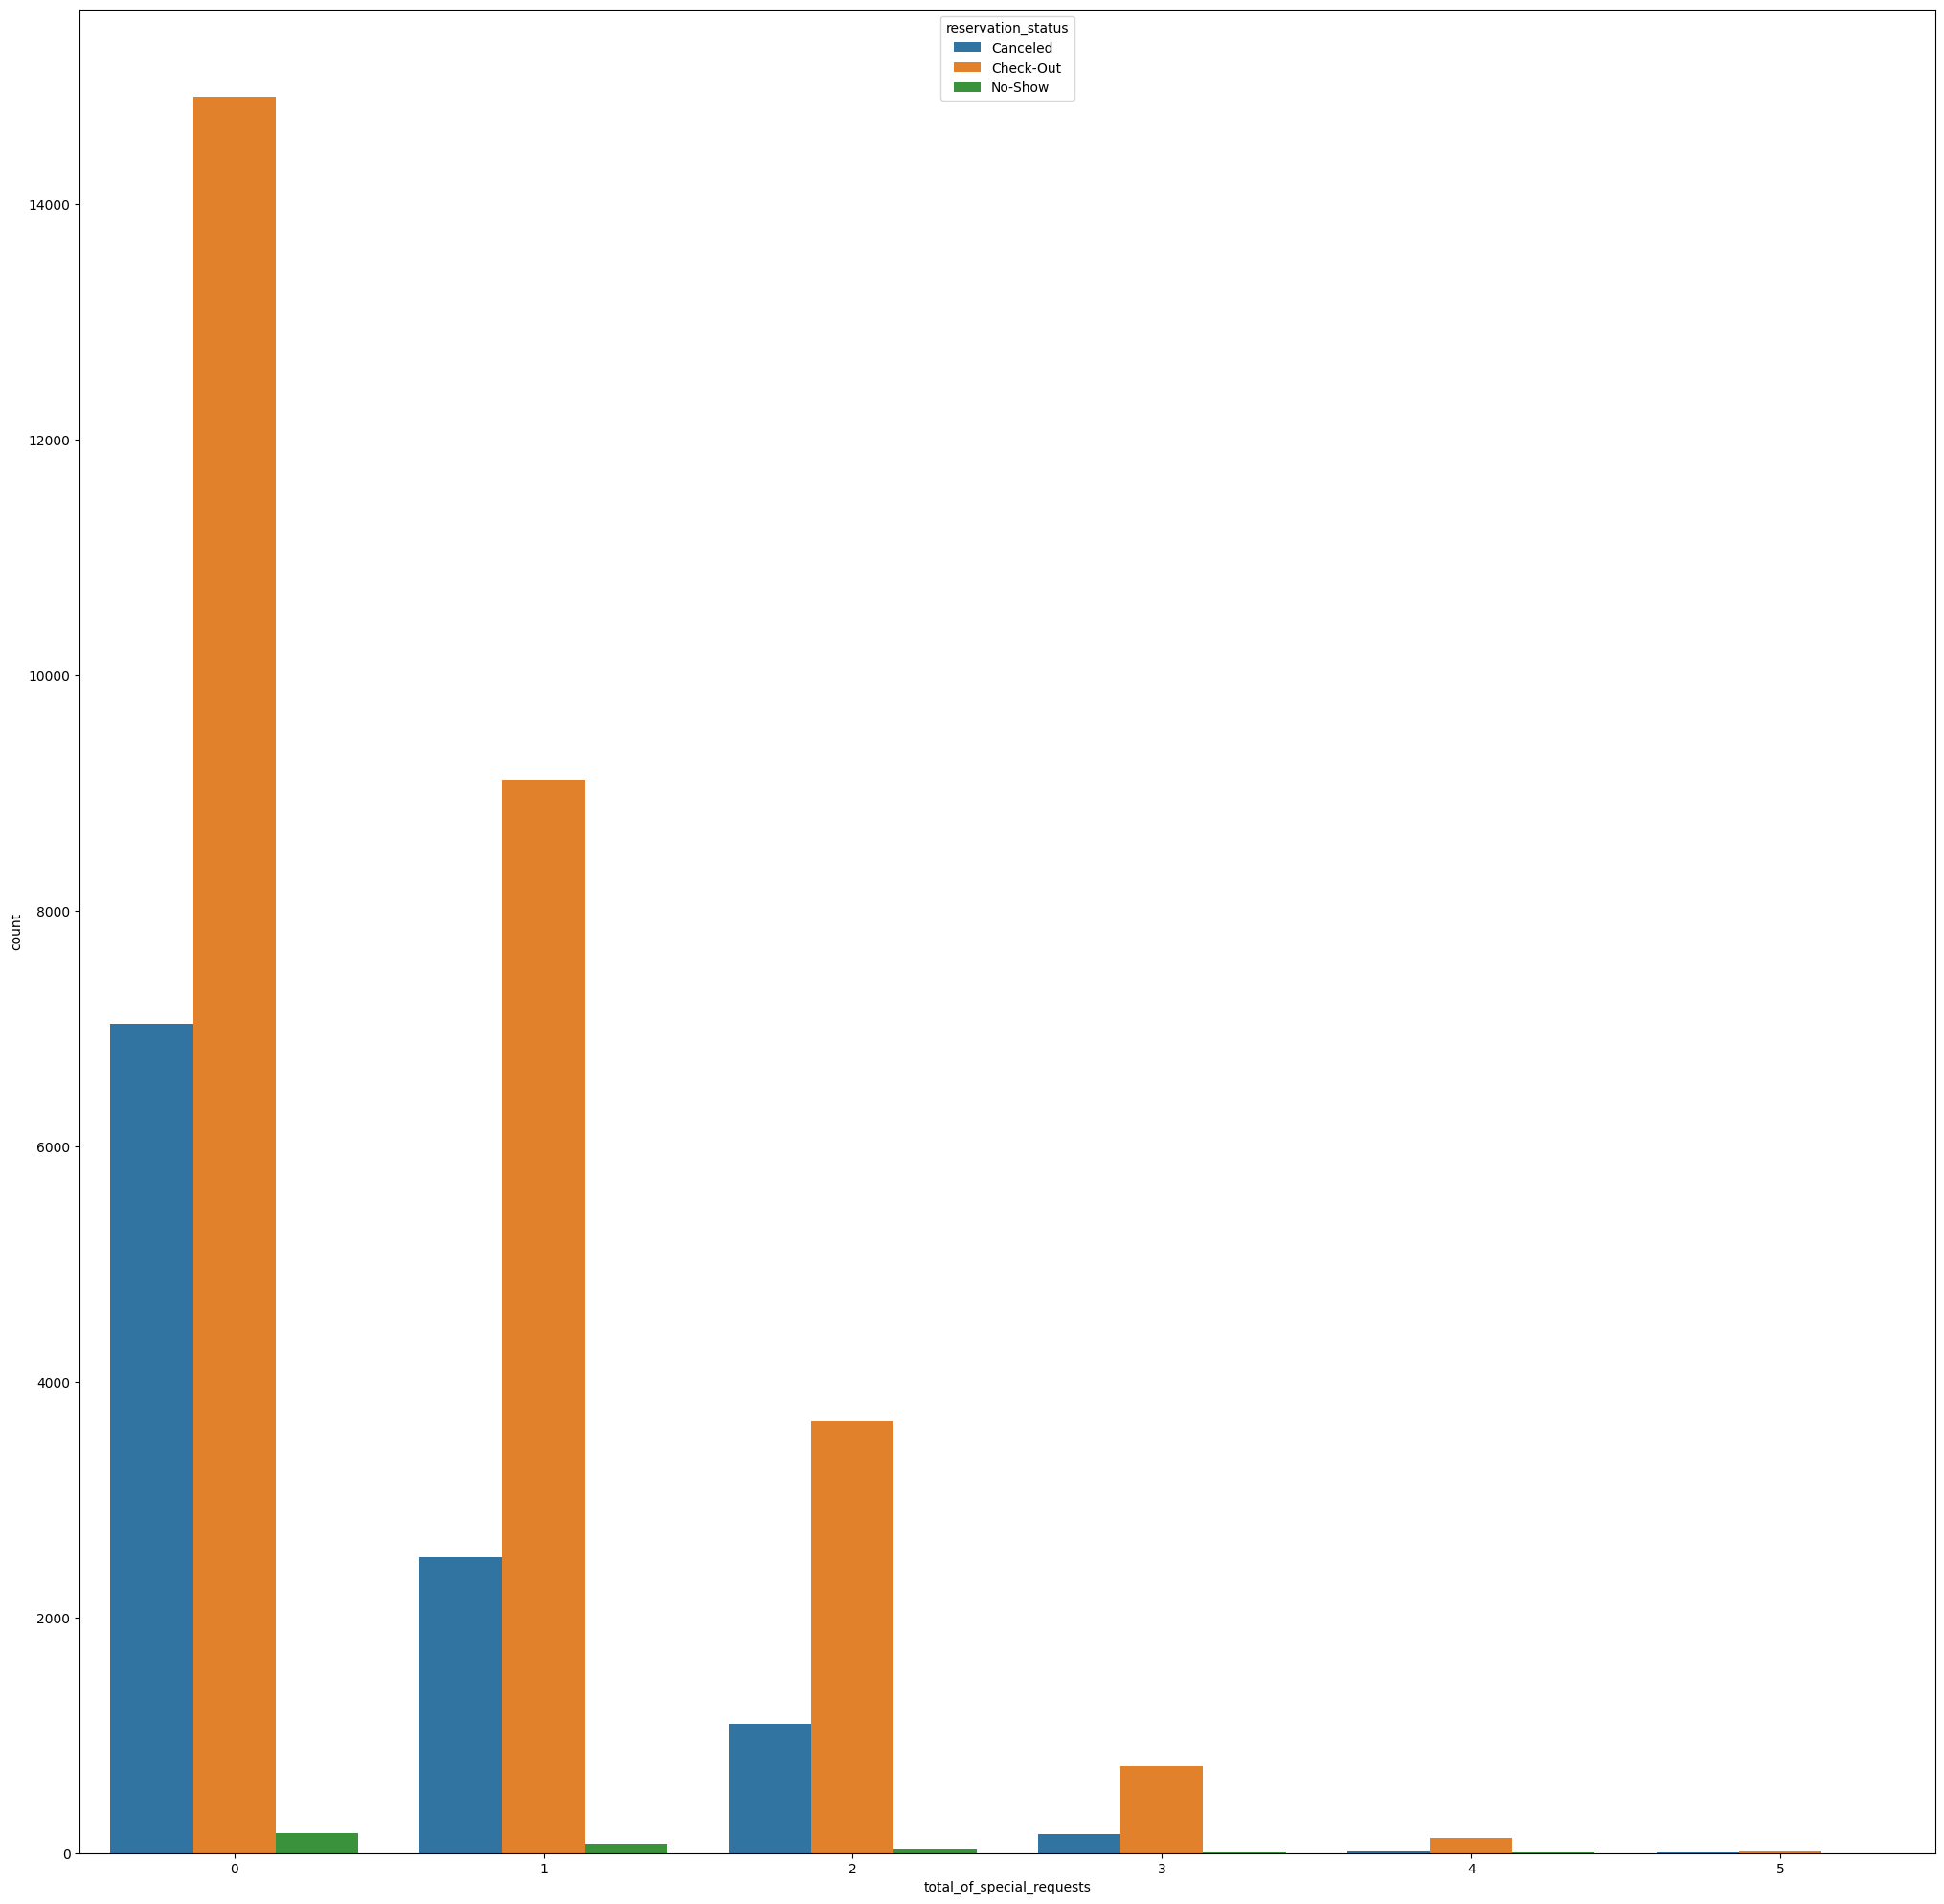

In [354]:
plt.figure(figsize=(25, 25))
sns.barplot(data=resort_parking_request, x='total_of_special_requests', y='count',hue='reservation_status')
plt.show()

- 차없이 많이 온다

In [355]:
resort_day_waiting_list = resort_hotel.groupby('reservation_status')['days_in_waiting_list'].mean().reset_index()

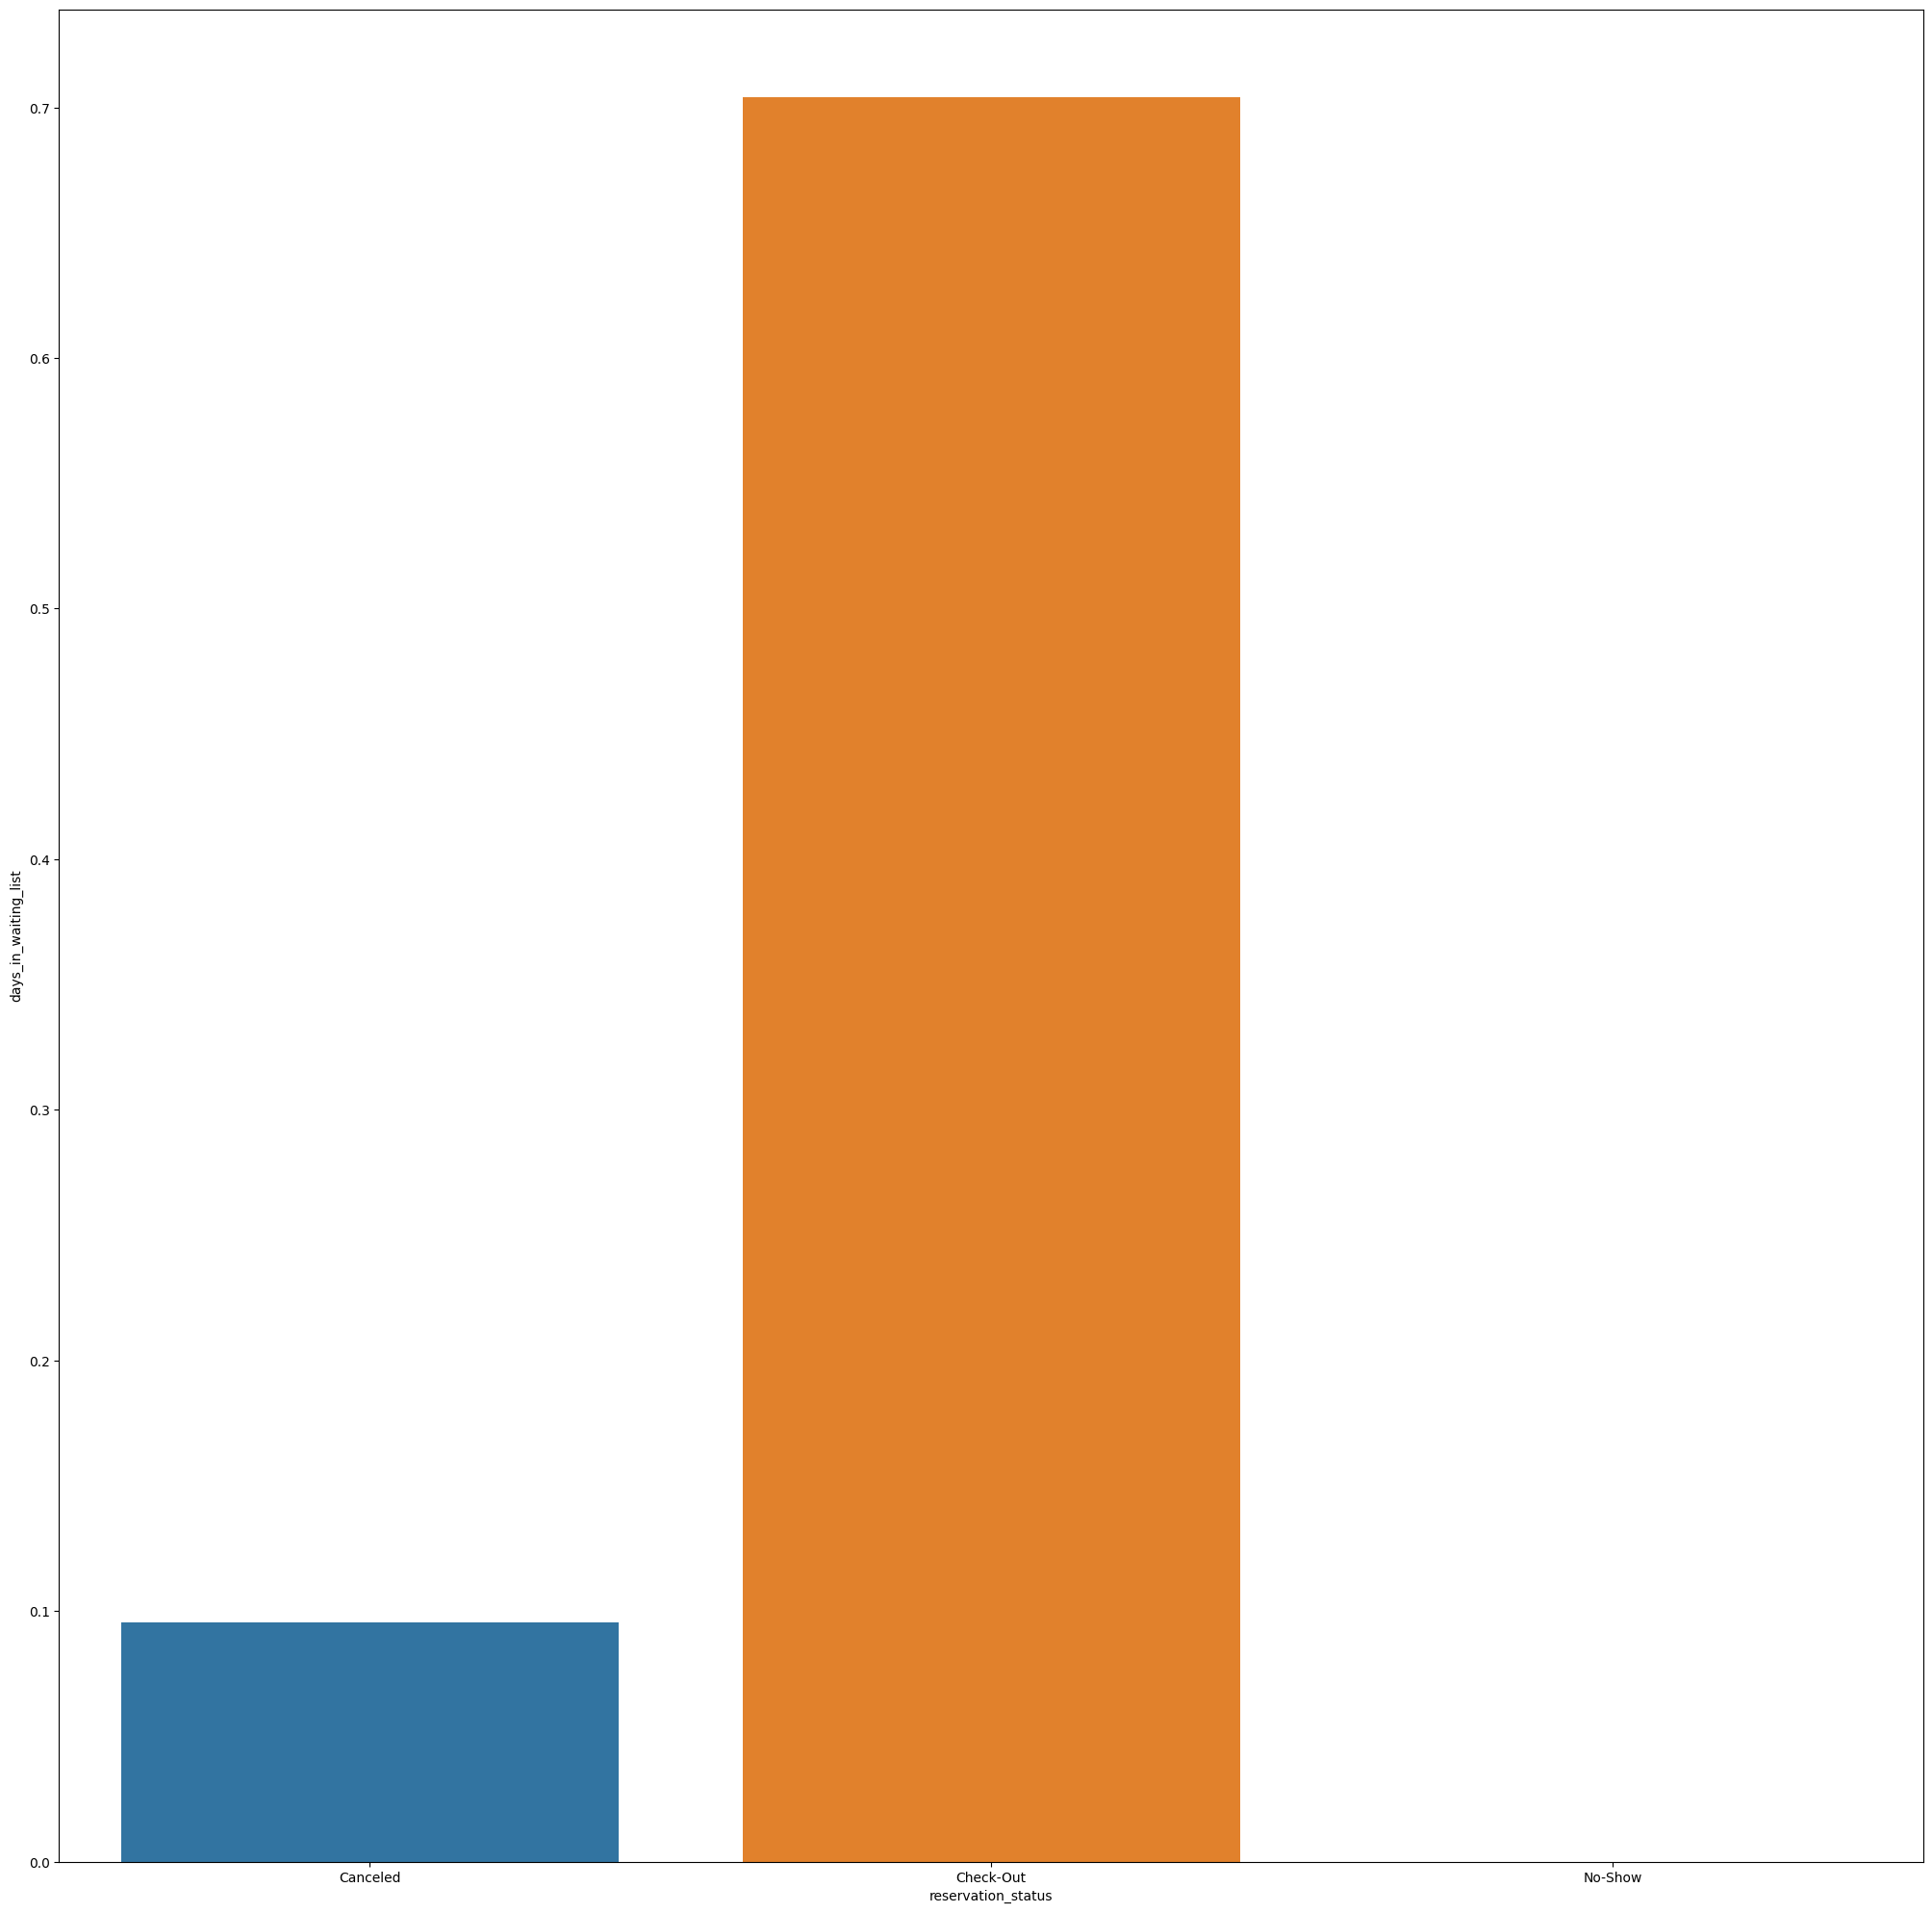

In [356]:
plt.figure(figsize=(25, 25))
sns.barplot(data=resort_day_waiting_list, x='reservation_status', y='days_in_waiting_list')
plt.show()

- 예약을 하고 몇일 안되서 바로 오는 편이고 방문률이 높다

In [357]:
resort_cust_hist = resort_hotel.groupby(['reservation_status','previous_cancellations'])['reservation_status'].size().reset_index(name='count')

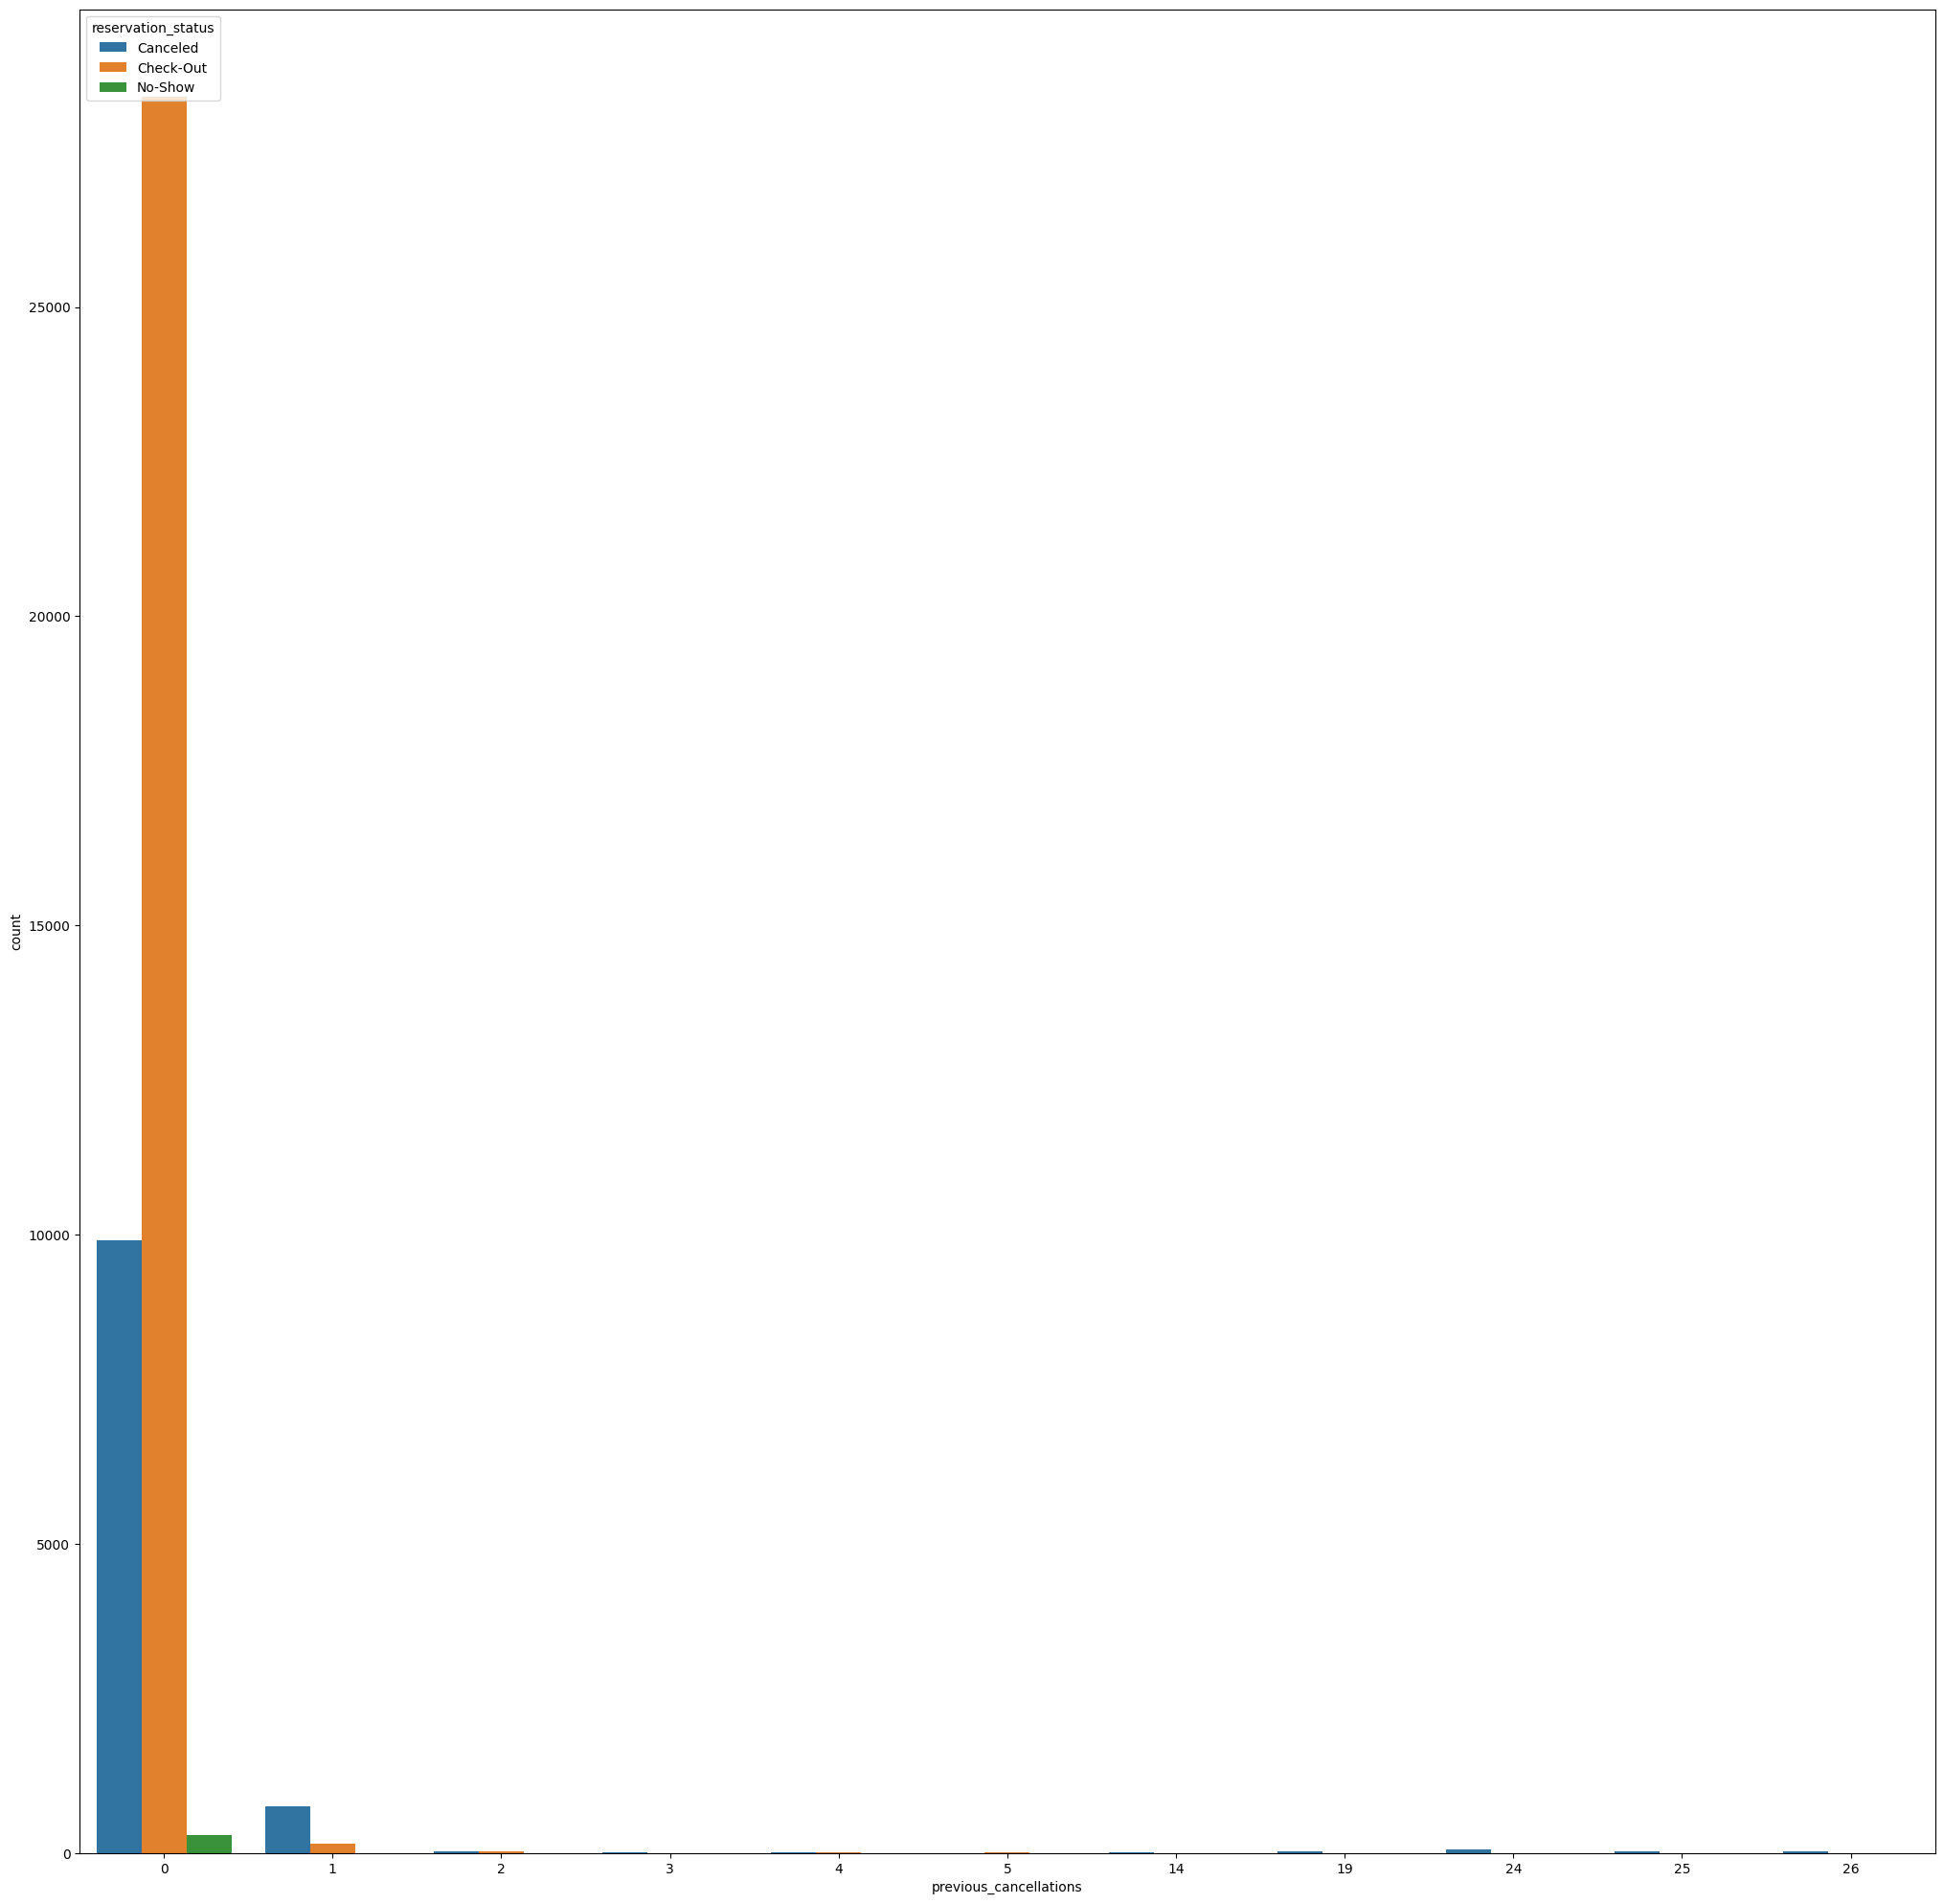

In [358]:
plt.figure(figsize=(25, 25))
sns.barplot(data=resort_cust_hist, x='previous_cancellations', y='count',hue='reservation_status')
plt.show()

- 이전에 cancel 기록이 있는사람은 취소할 확률이 높다

In [359]:
resort_repeated = resort_hotel.groupby(['reservation_status','is_repeated_guest'])['reservation_status'].size().reset_index(name='count')

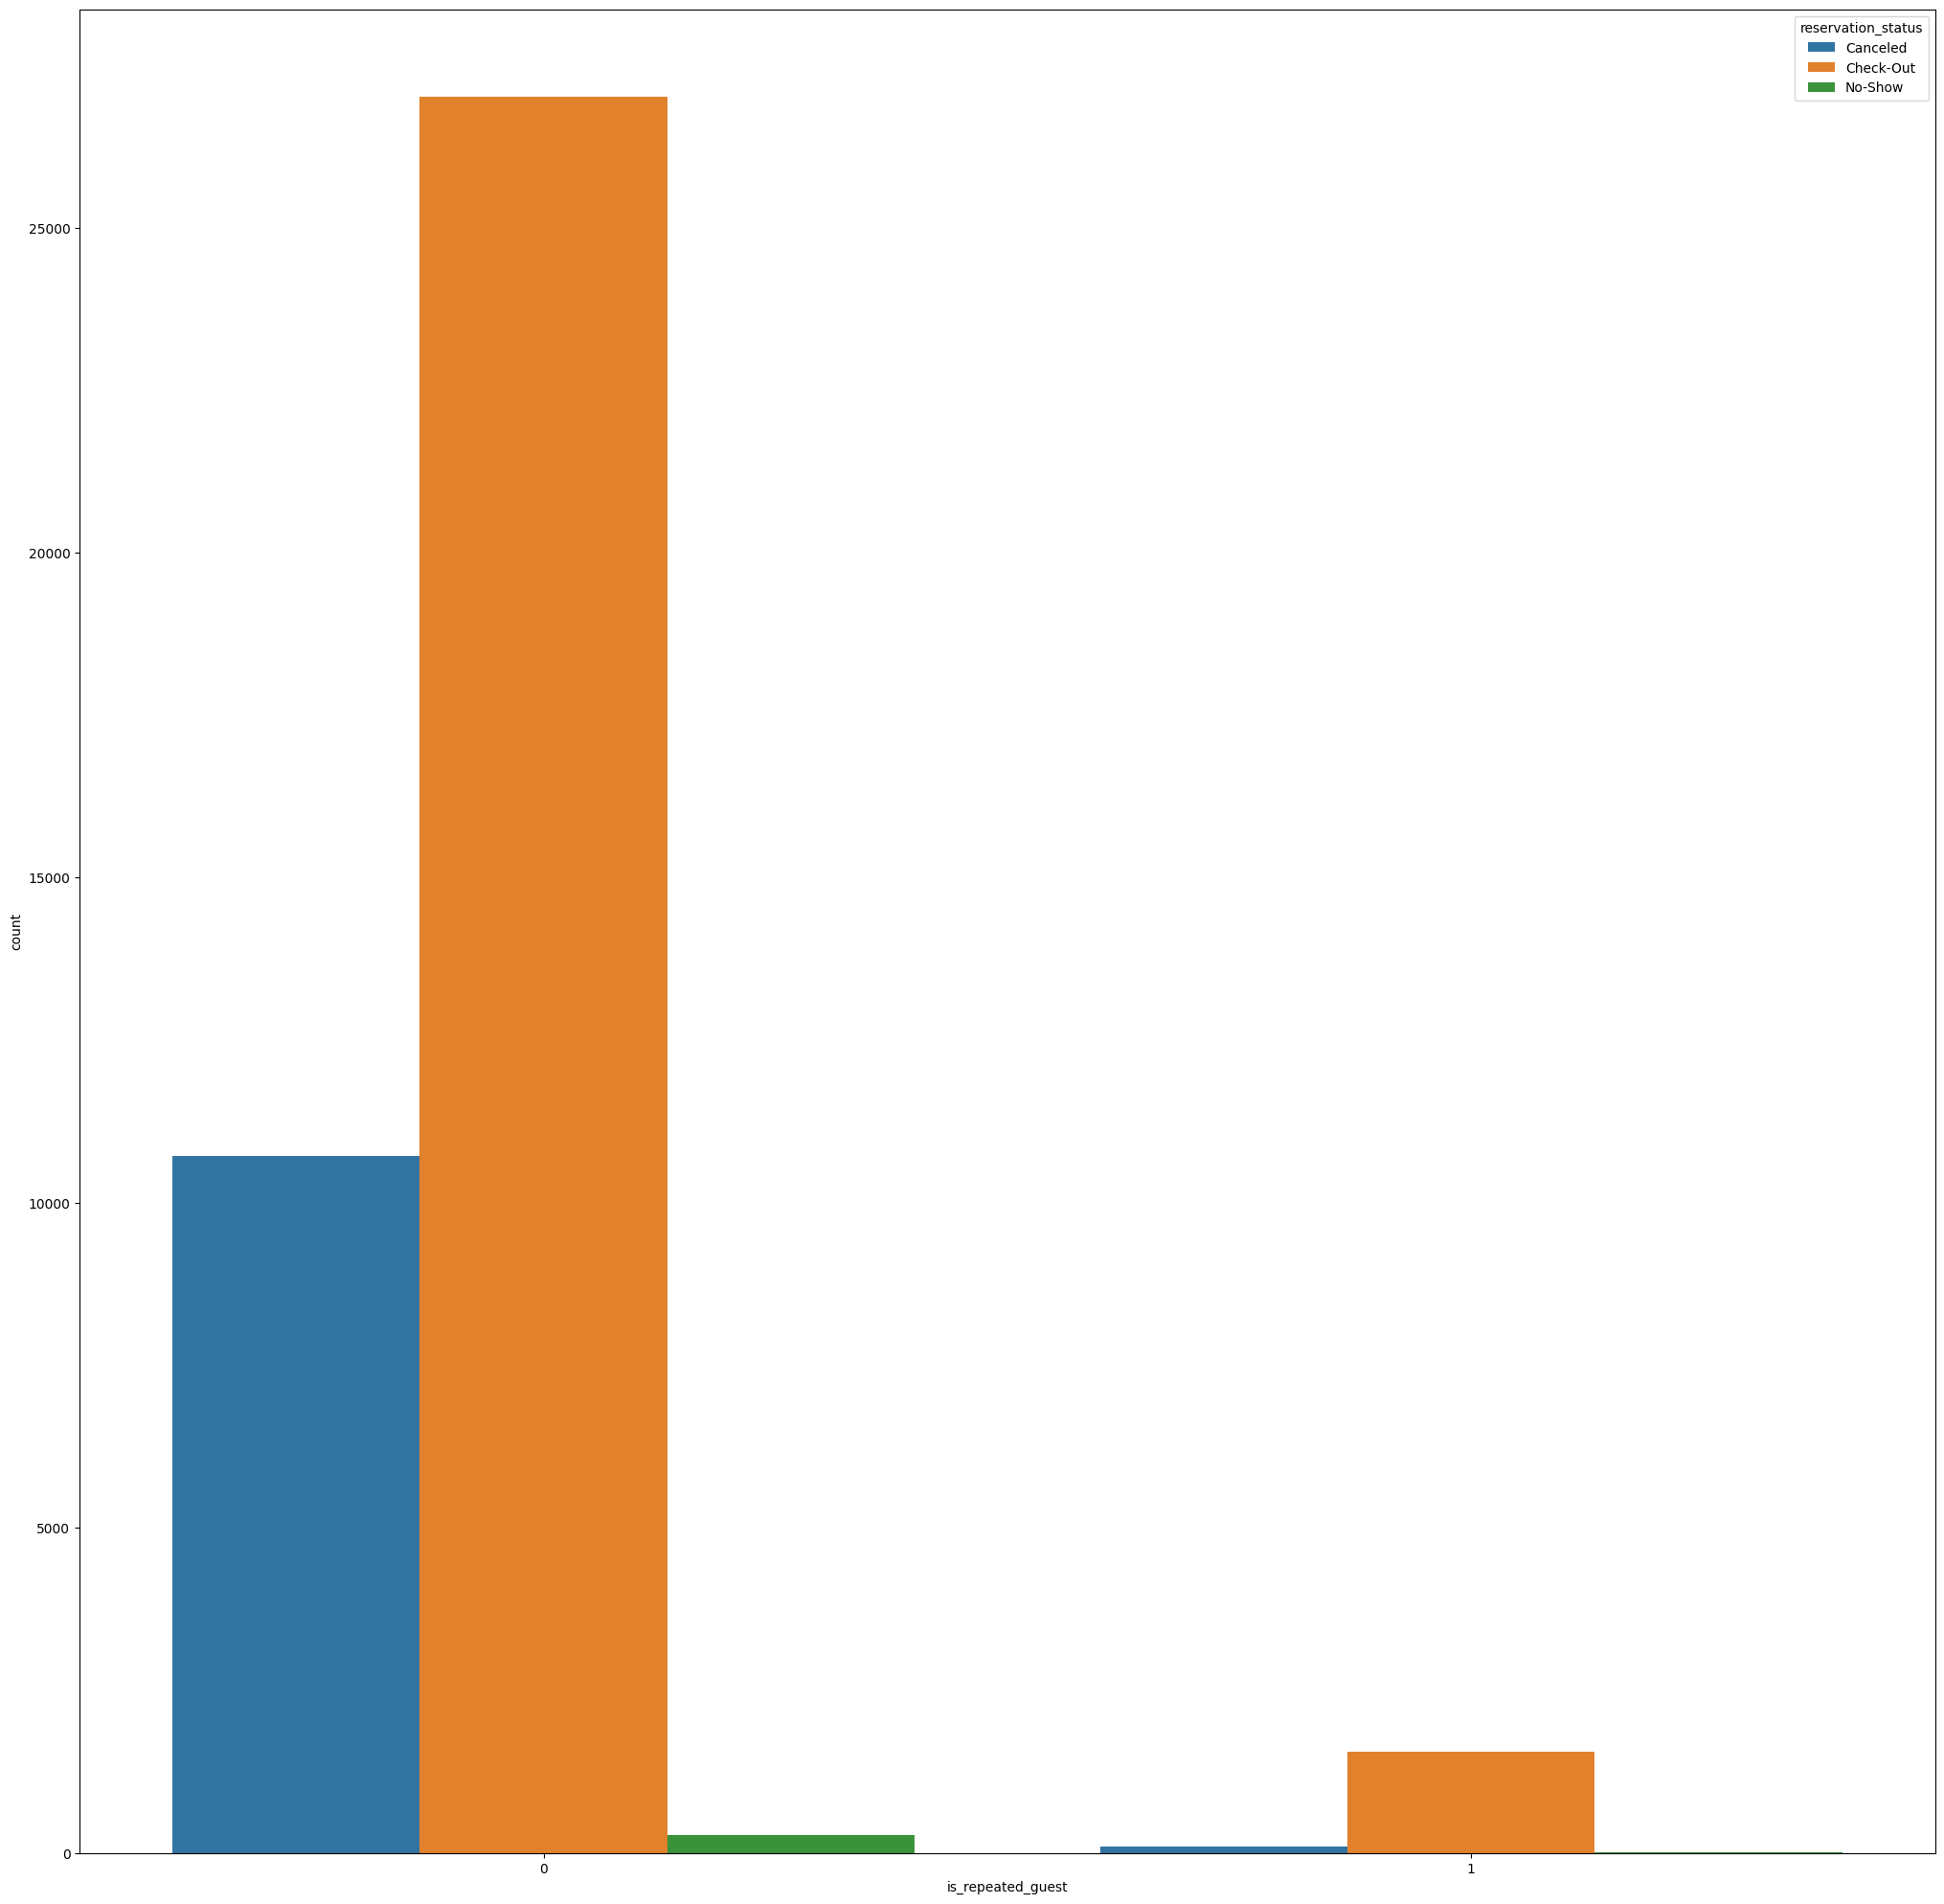

In [360]:
plt.figure(figsize=(25, 25))
sns.barplot(data=resort_repeated, x='is_repeated_guest', y='count',hue='reservation_status')
plt.show()

In [361]:
city_hotel = hotel_booking_df.loc[hotel_booking_df['hotel']=='City Hotel']

In [362]:
city_daily_bookings = city_hotel.groupby('year_month')['is_canceled'].count()

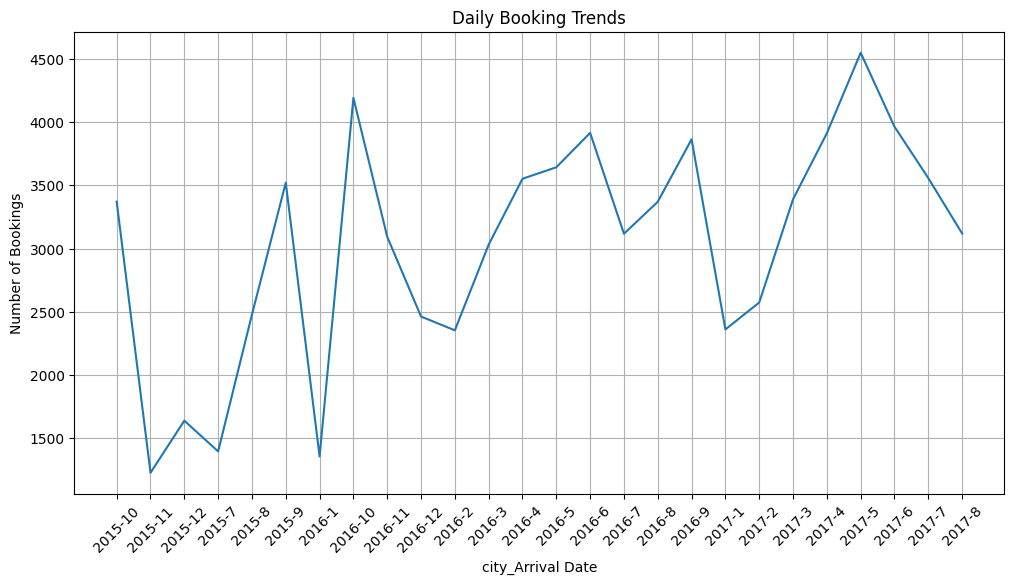

In [363]:
plt.figure(figsize=(12, 6))
plt.plot(city_daily_bookings.index, city_daily_bookings.values)
plt.xticks(rotation=45)
plt.xlabel('city_Arrival Date')
plt.ylabel('Number of Bookings')
plt.title('Daily Booking Trends')
plt.grid()
plt.show()

- 시티 호텔은 2017년 5월에 예약건수가 많다 

In [364]:
city_cust_country=city_hotel.groupby(['country'])['country'].size().sort_values(ascending=False).head(10).reset_index(name='count')

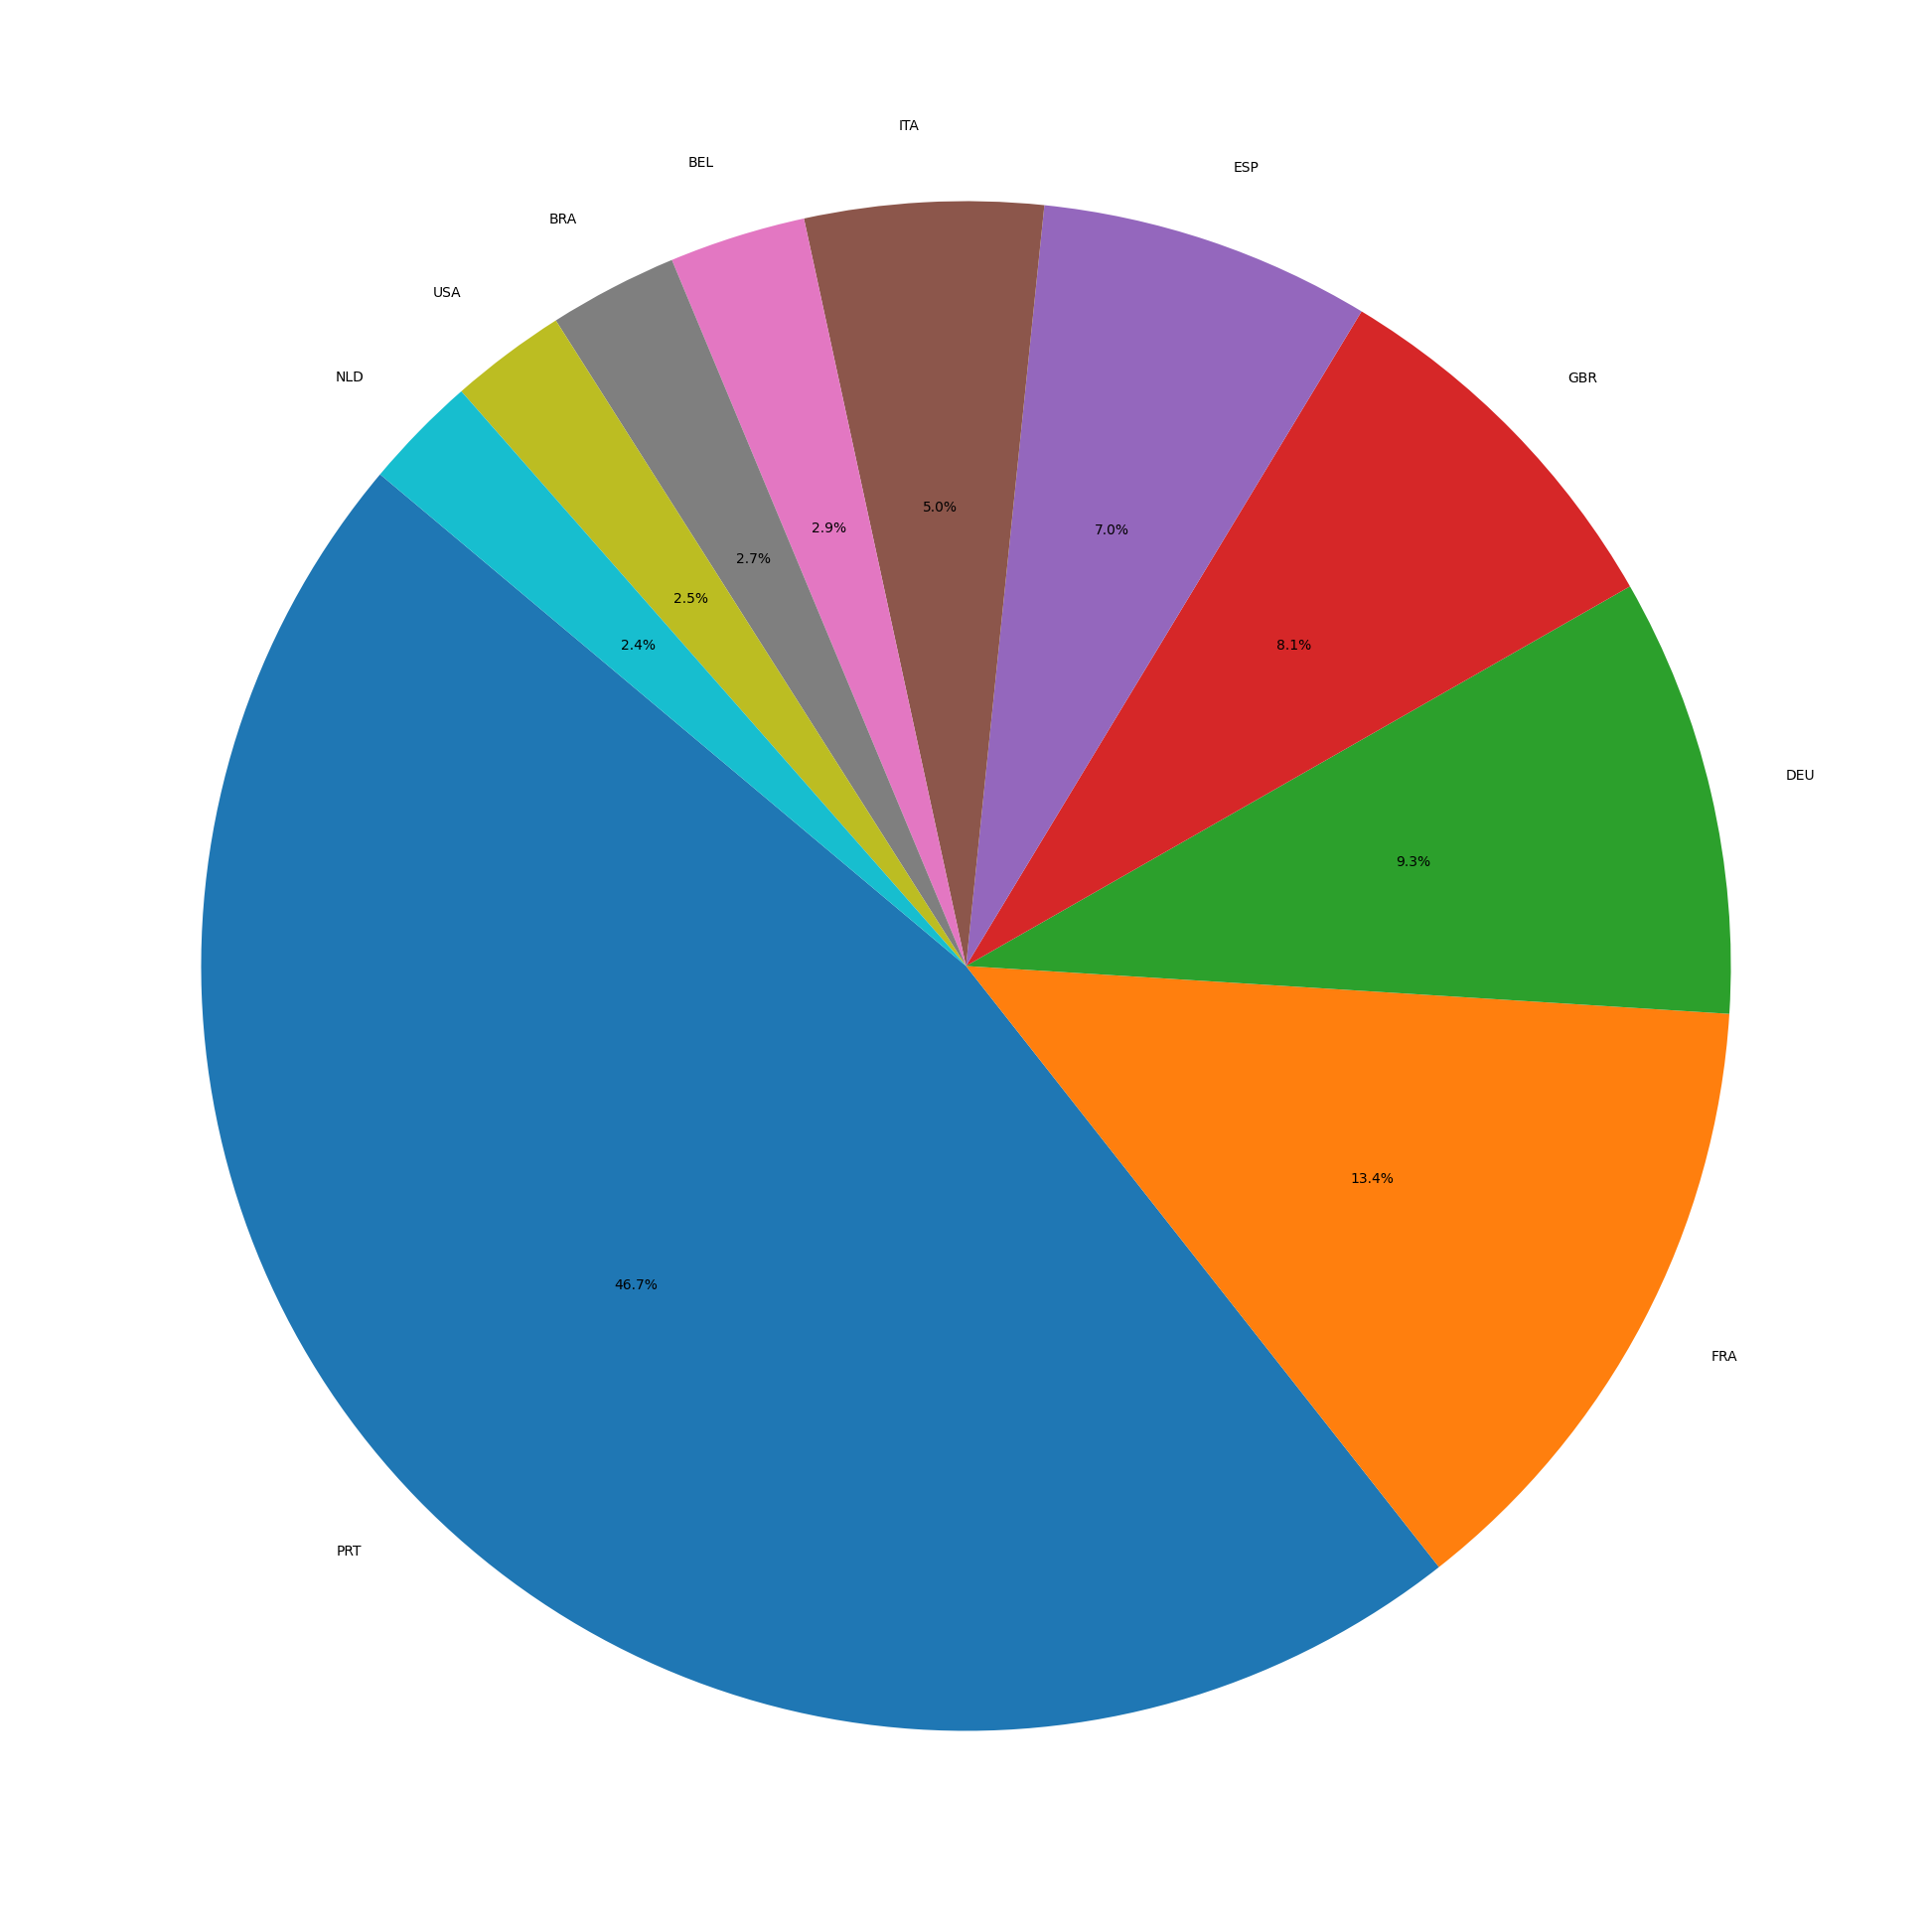

In [365]:
plt.figure(figsize=(25, 25))
plt.pie(city_cust_country['count'], labels=city_cust_country['country'], autopct='%1.1f%%', startangle=140)
plt.show()

- 포르투갈과 프랑스에서 이용이 많음

In [366]:
city_cust_country_status=city_hotel.groupby(['country','reservation_status'])['country'].size().sort_values(ascending=False).head(10).reset_index(name='count')

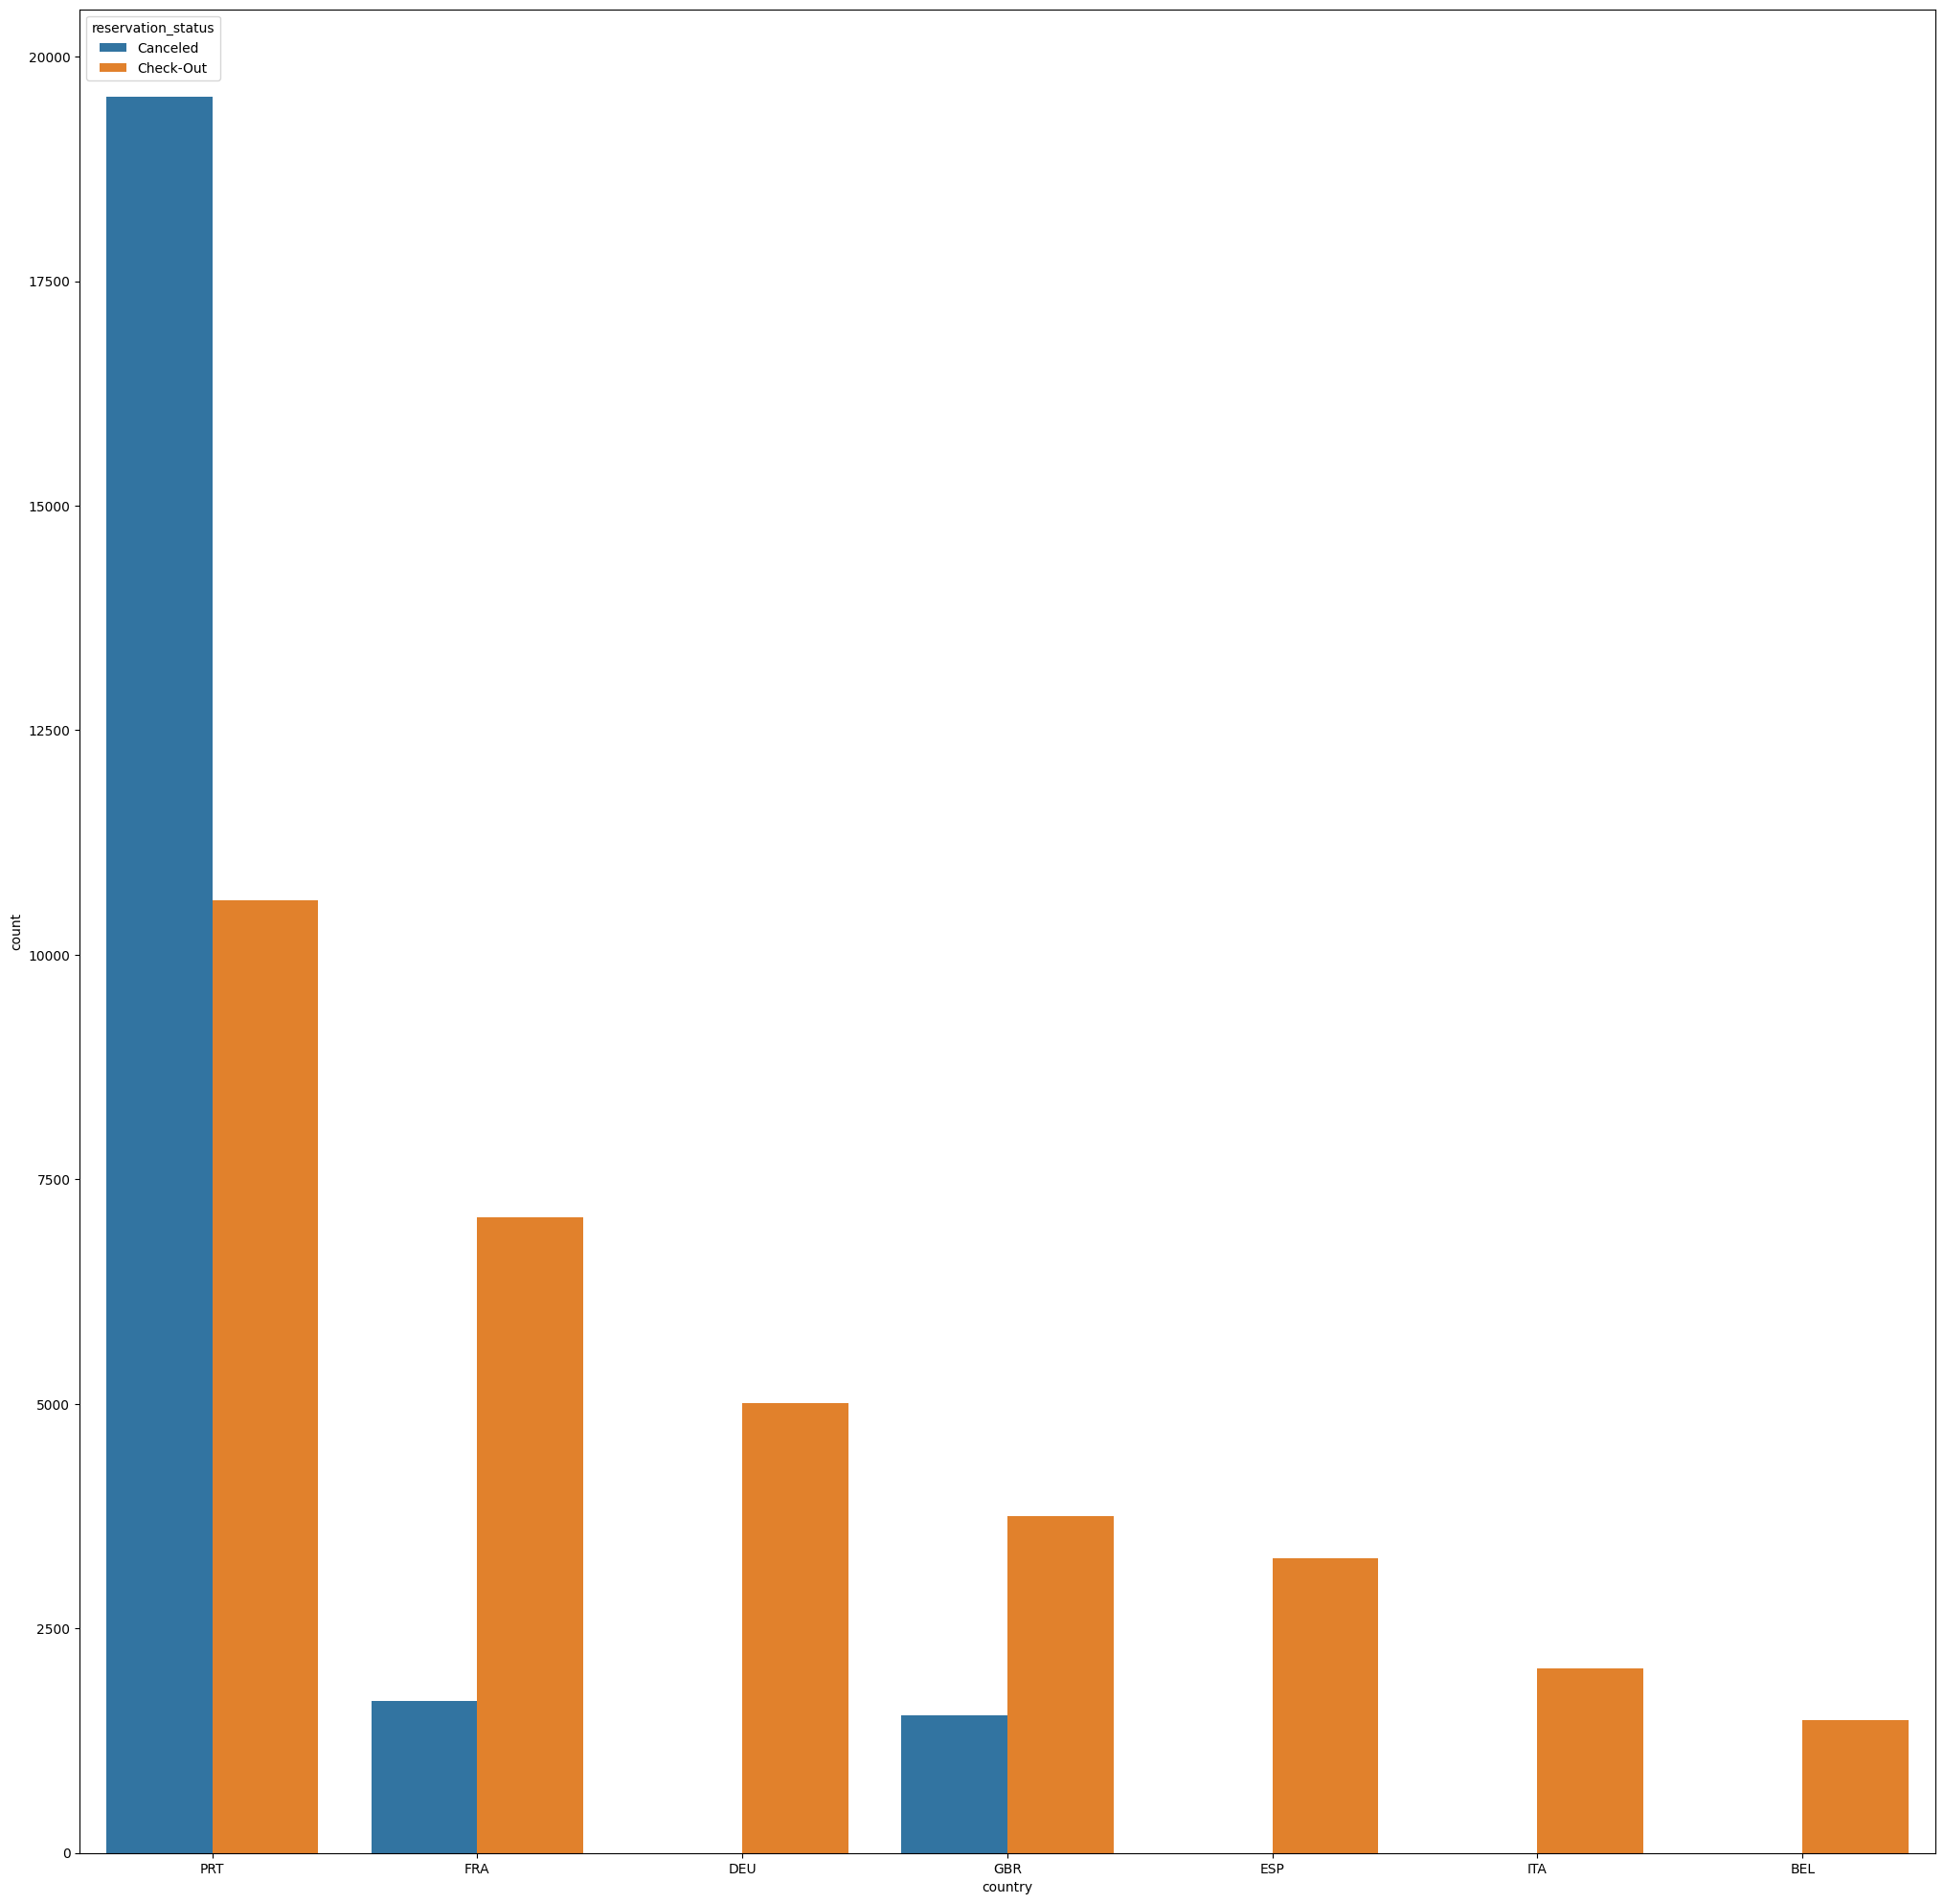

In [367]:
plt.figure(figsize=(25, 25))
sns.barplot(data=city_cust_country_status, x='country', y='count',hue='reservation_status')
plt.show()

- 시티호텔을 방문하는 포르투갈 소님들이 취소률이 높습니다

In [368]:
city_percent=city_hotel.groupby(['reservation_status'])['reservation_status'].size().reset_index(name='count')

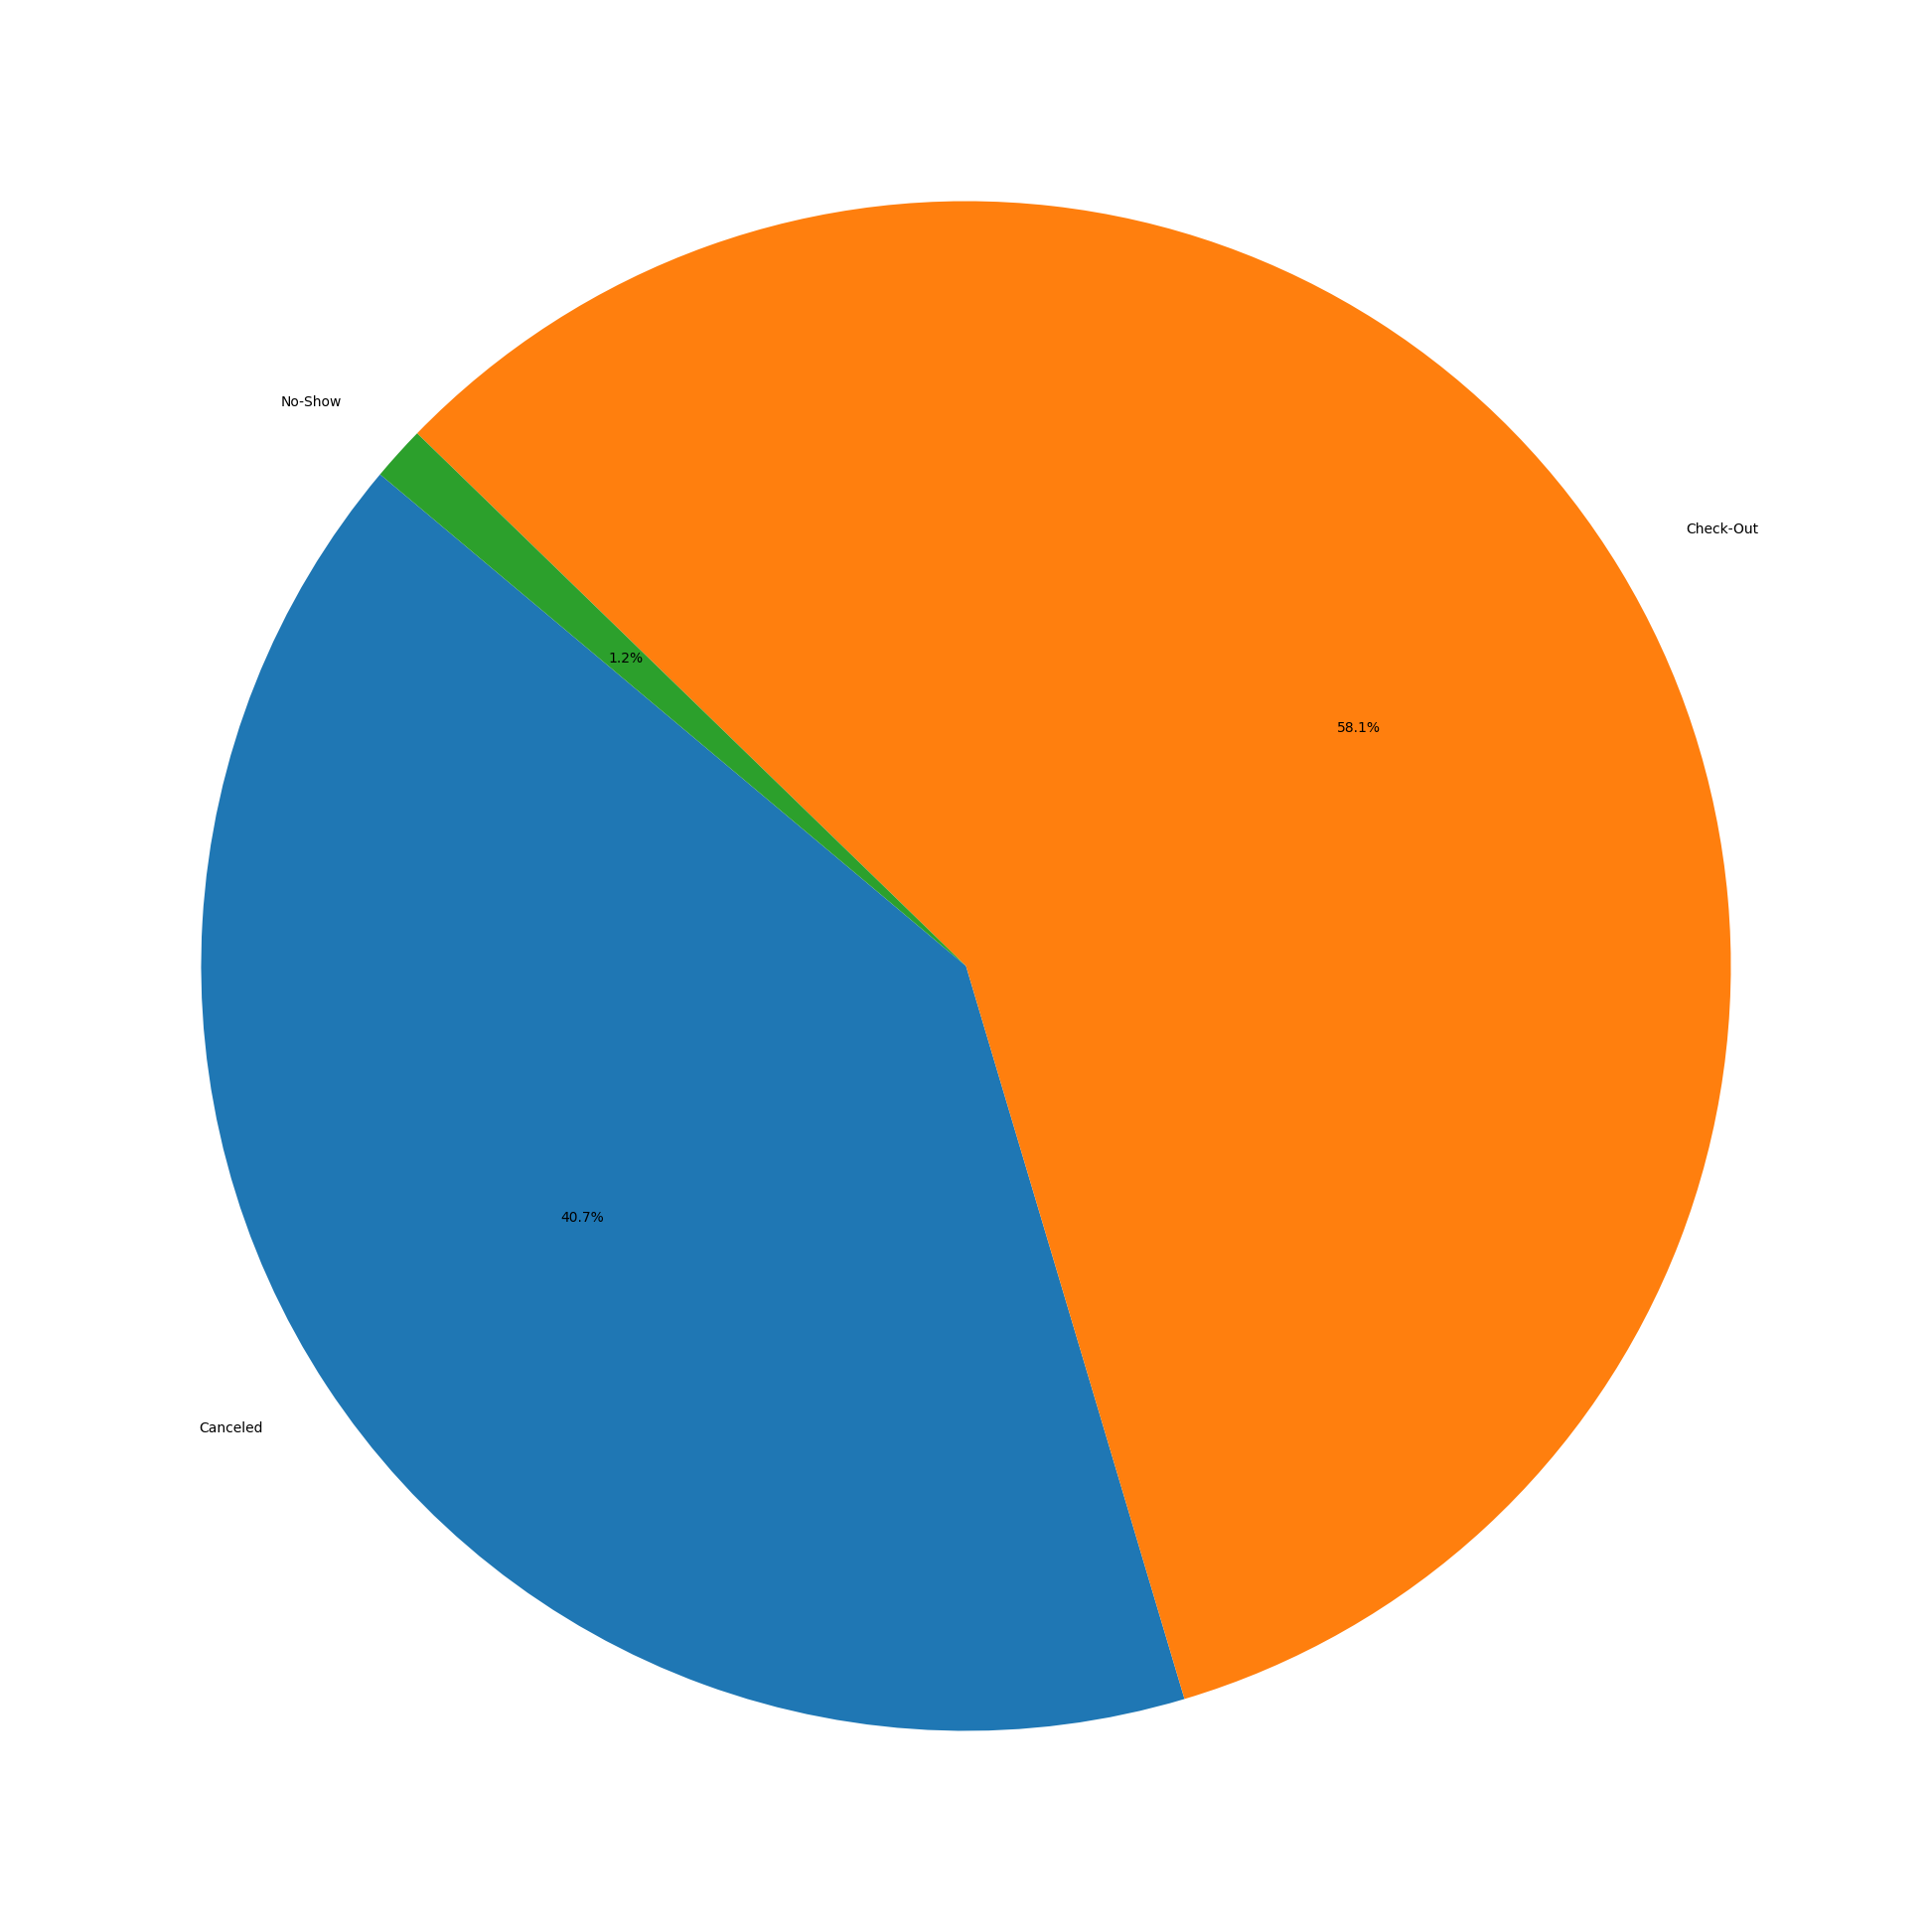

In [369]:
plt.figure(figsize=(25, 25))
plt.pie(city_percent['count'], labels=city_percent['reservation_status'], autopct='%1.1f%%', startangle=140)
plt.show()

- 리조트 호텔에 비해 취소률이 많습니다

In [370]:
city_meal=city_hotel.groupby(['meal','reservation_status'])['reservation_status'].size().reset_index(name='count')

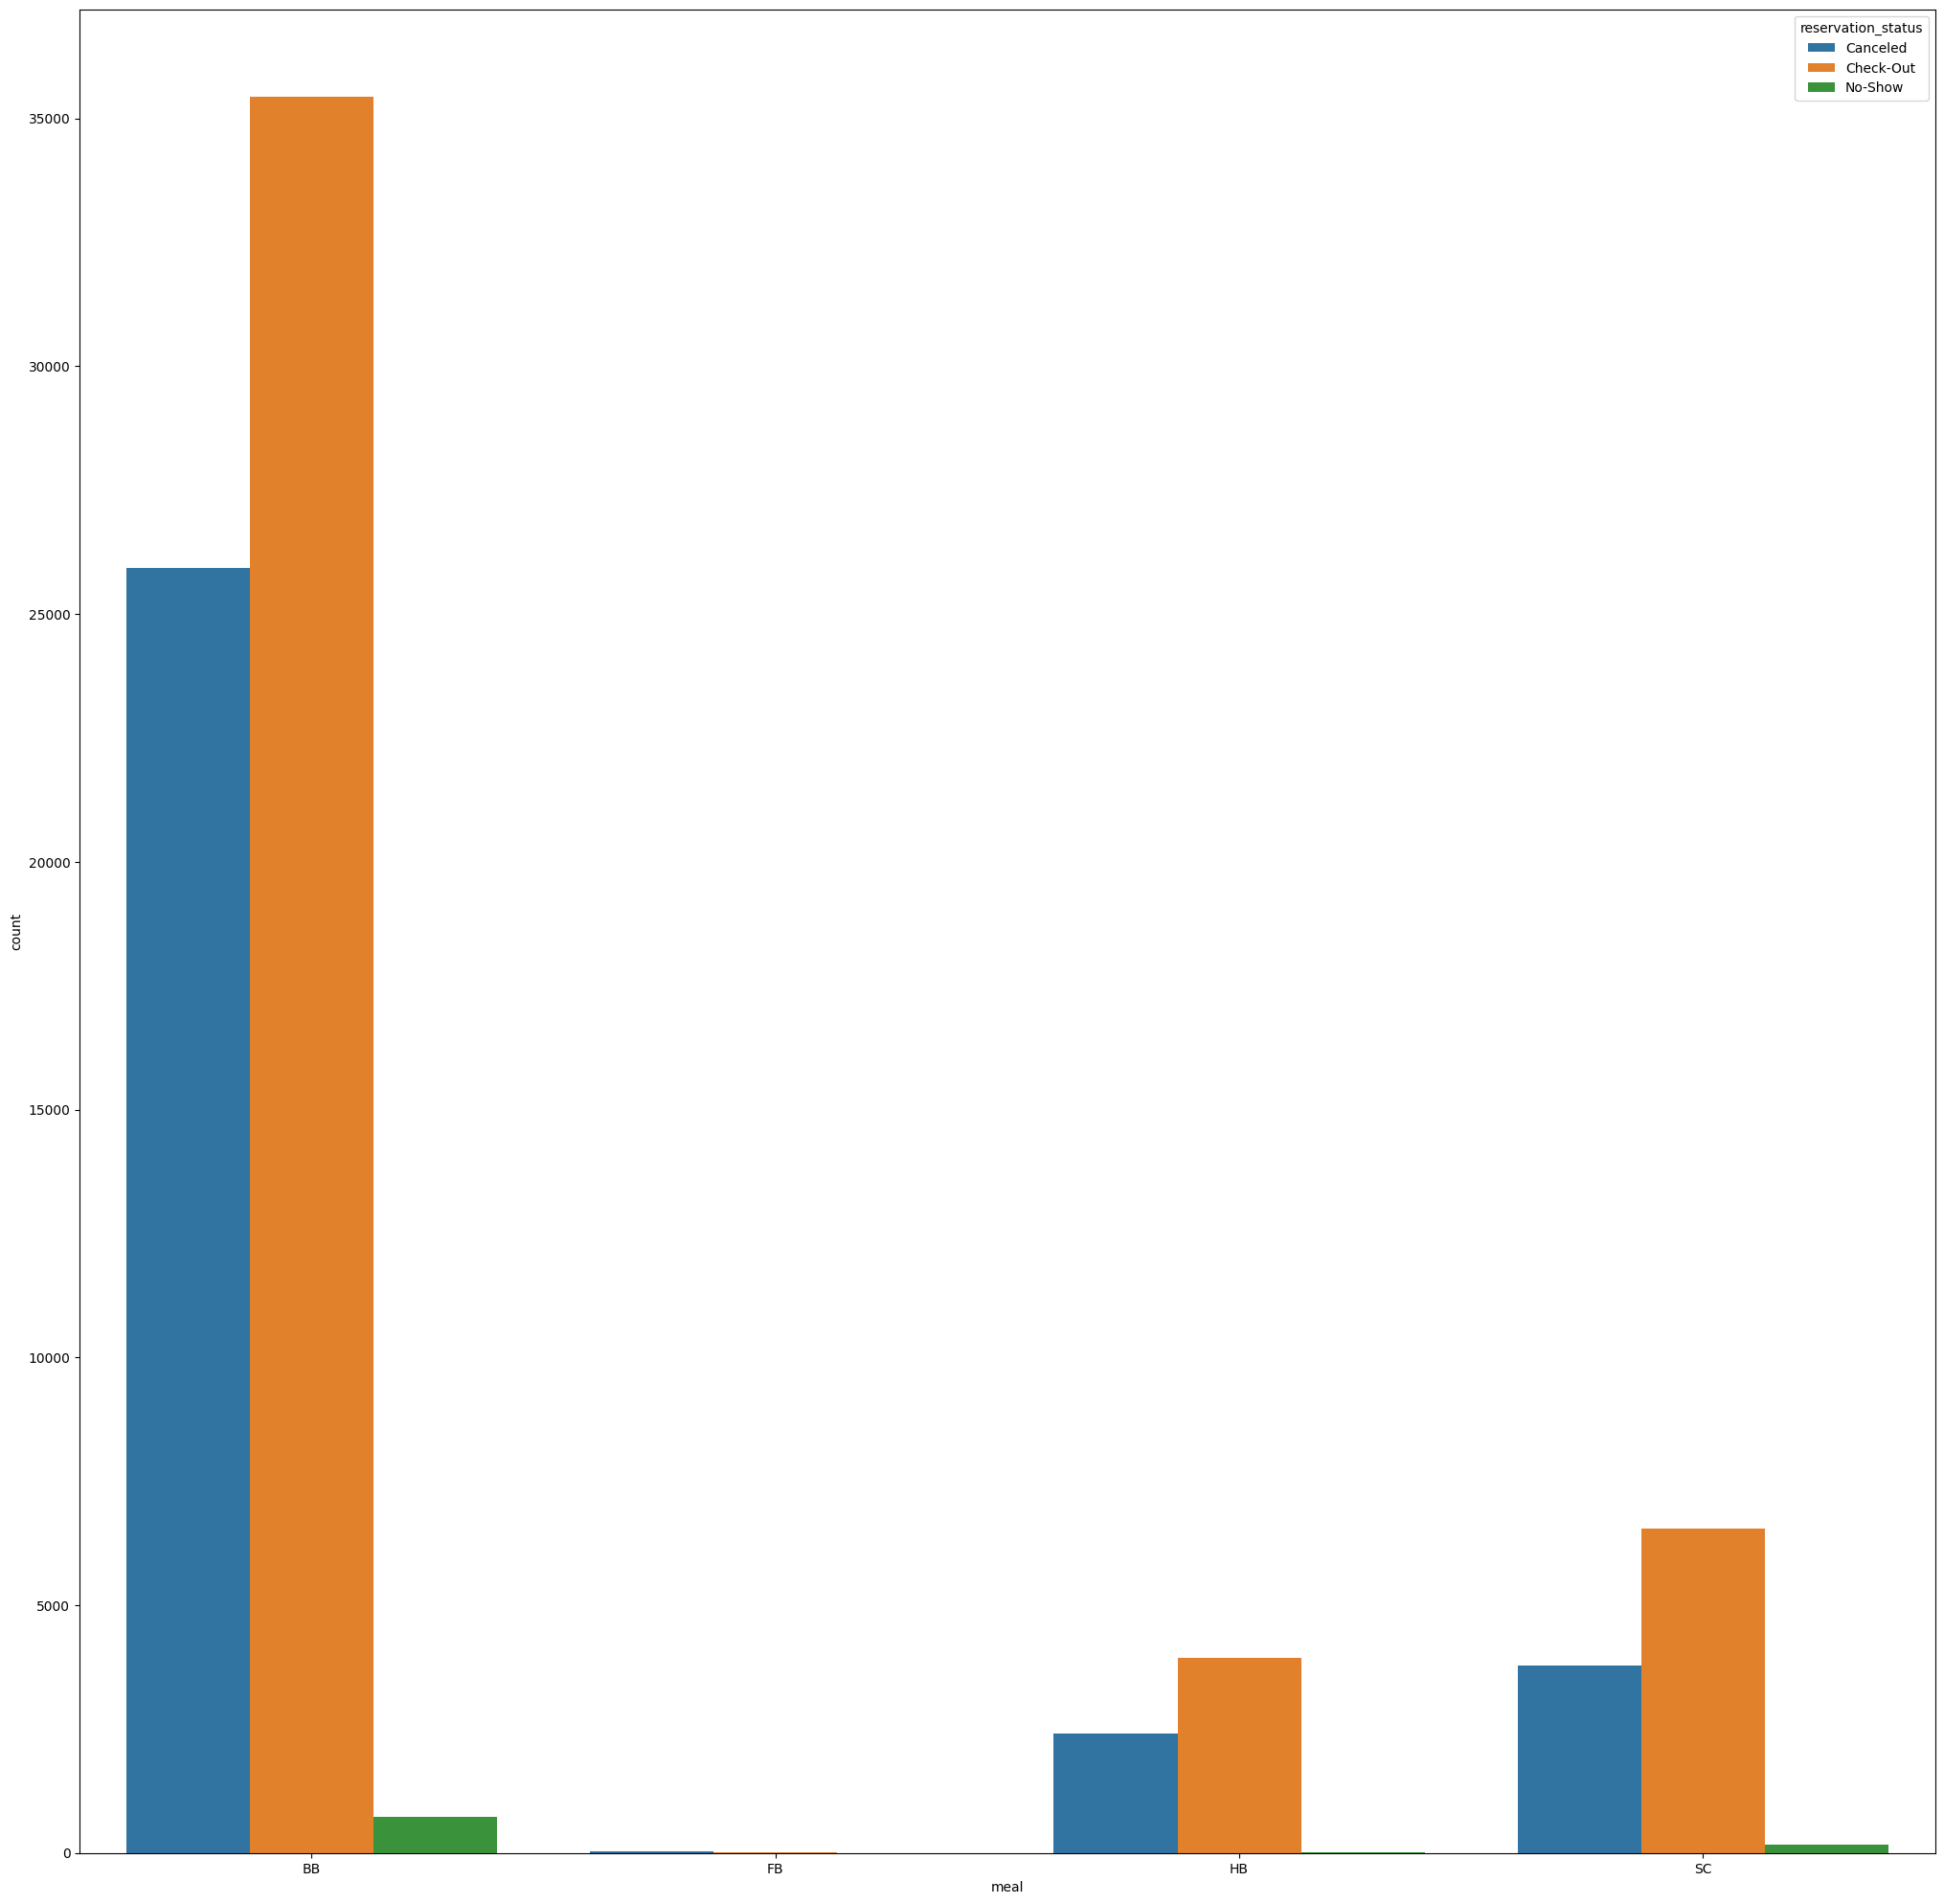

In [371]:
plt.figure(figsize=(25, 25))
sns.barplot(data=city_meal, x='meal', y='count',hue='reservation_status')
plt.show()

- 아침만 신청한 손님들이 많지만 취소률이 높다
- 식사는 취소에대해 큰 영향이 없다

In [372]:
city_visit_month = city_hotel.groupby(['arrival_date_month','reservation_status'])['reservation_status'].size().reset_index(name='count')

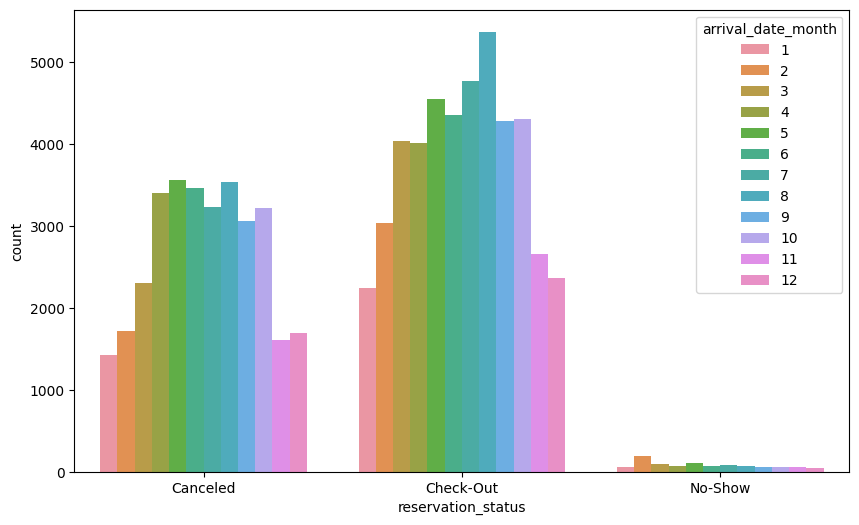

In [373]:
plt.figure(figsize=(10, 6))
sns.barplot(data=city_visit_month, x='reservation_status', y='count', hue='arrival_date_month')
plt.show()

- 8월에 예약이 많다
- 예약에 비해 4월달에 취소가 많다
- 시티호텔의 사용 목적이 달라서인지 3월 부터 10월까지 비교적 큰 차이가 없는편입니다

In [374]:
city_visit_day = city_hotel.groupby(['reservation_status','day_of_week'])['reservation_status'].size().reset_index(name='count')

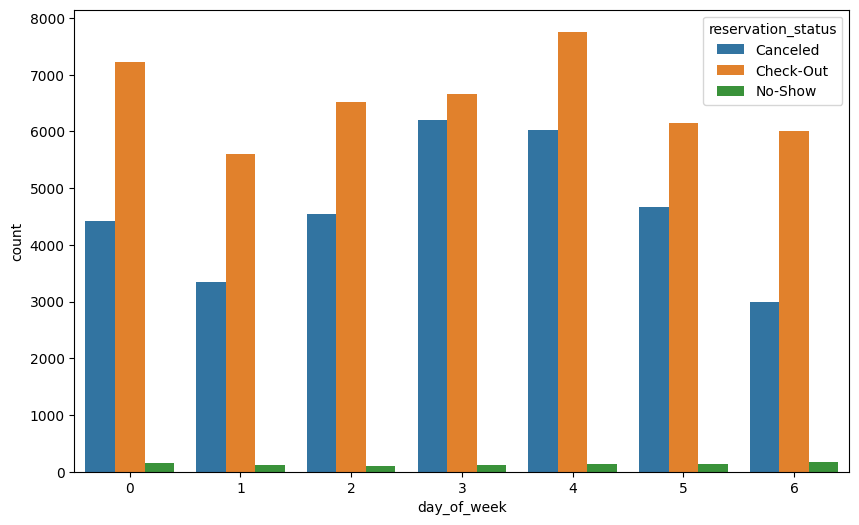

In [375]:
plt.figure(figsize=(10, 6))
sns.barplot(data=city_visit_day, x='day_of_week', y='count', hue='reservation_status')
plt.show()

- 목요일에 예약도 많고 취소도 많다

In [376]:
city_hotel_market = city_hotel.groupby(['reservation_status','market_segment'])['reservation_status'].count().reset_index(name='count')

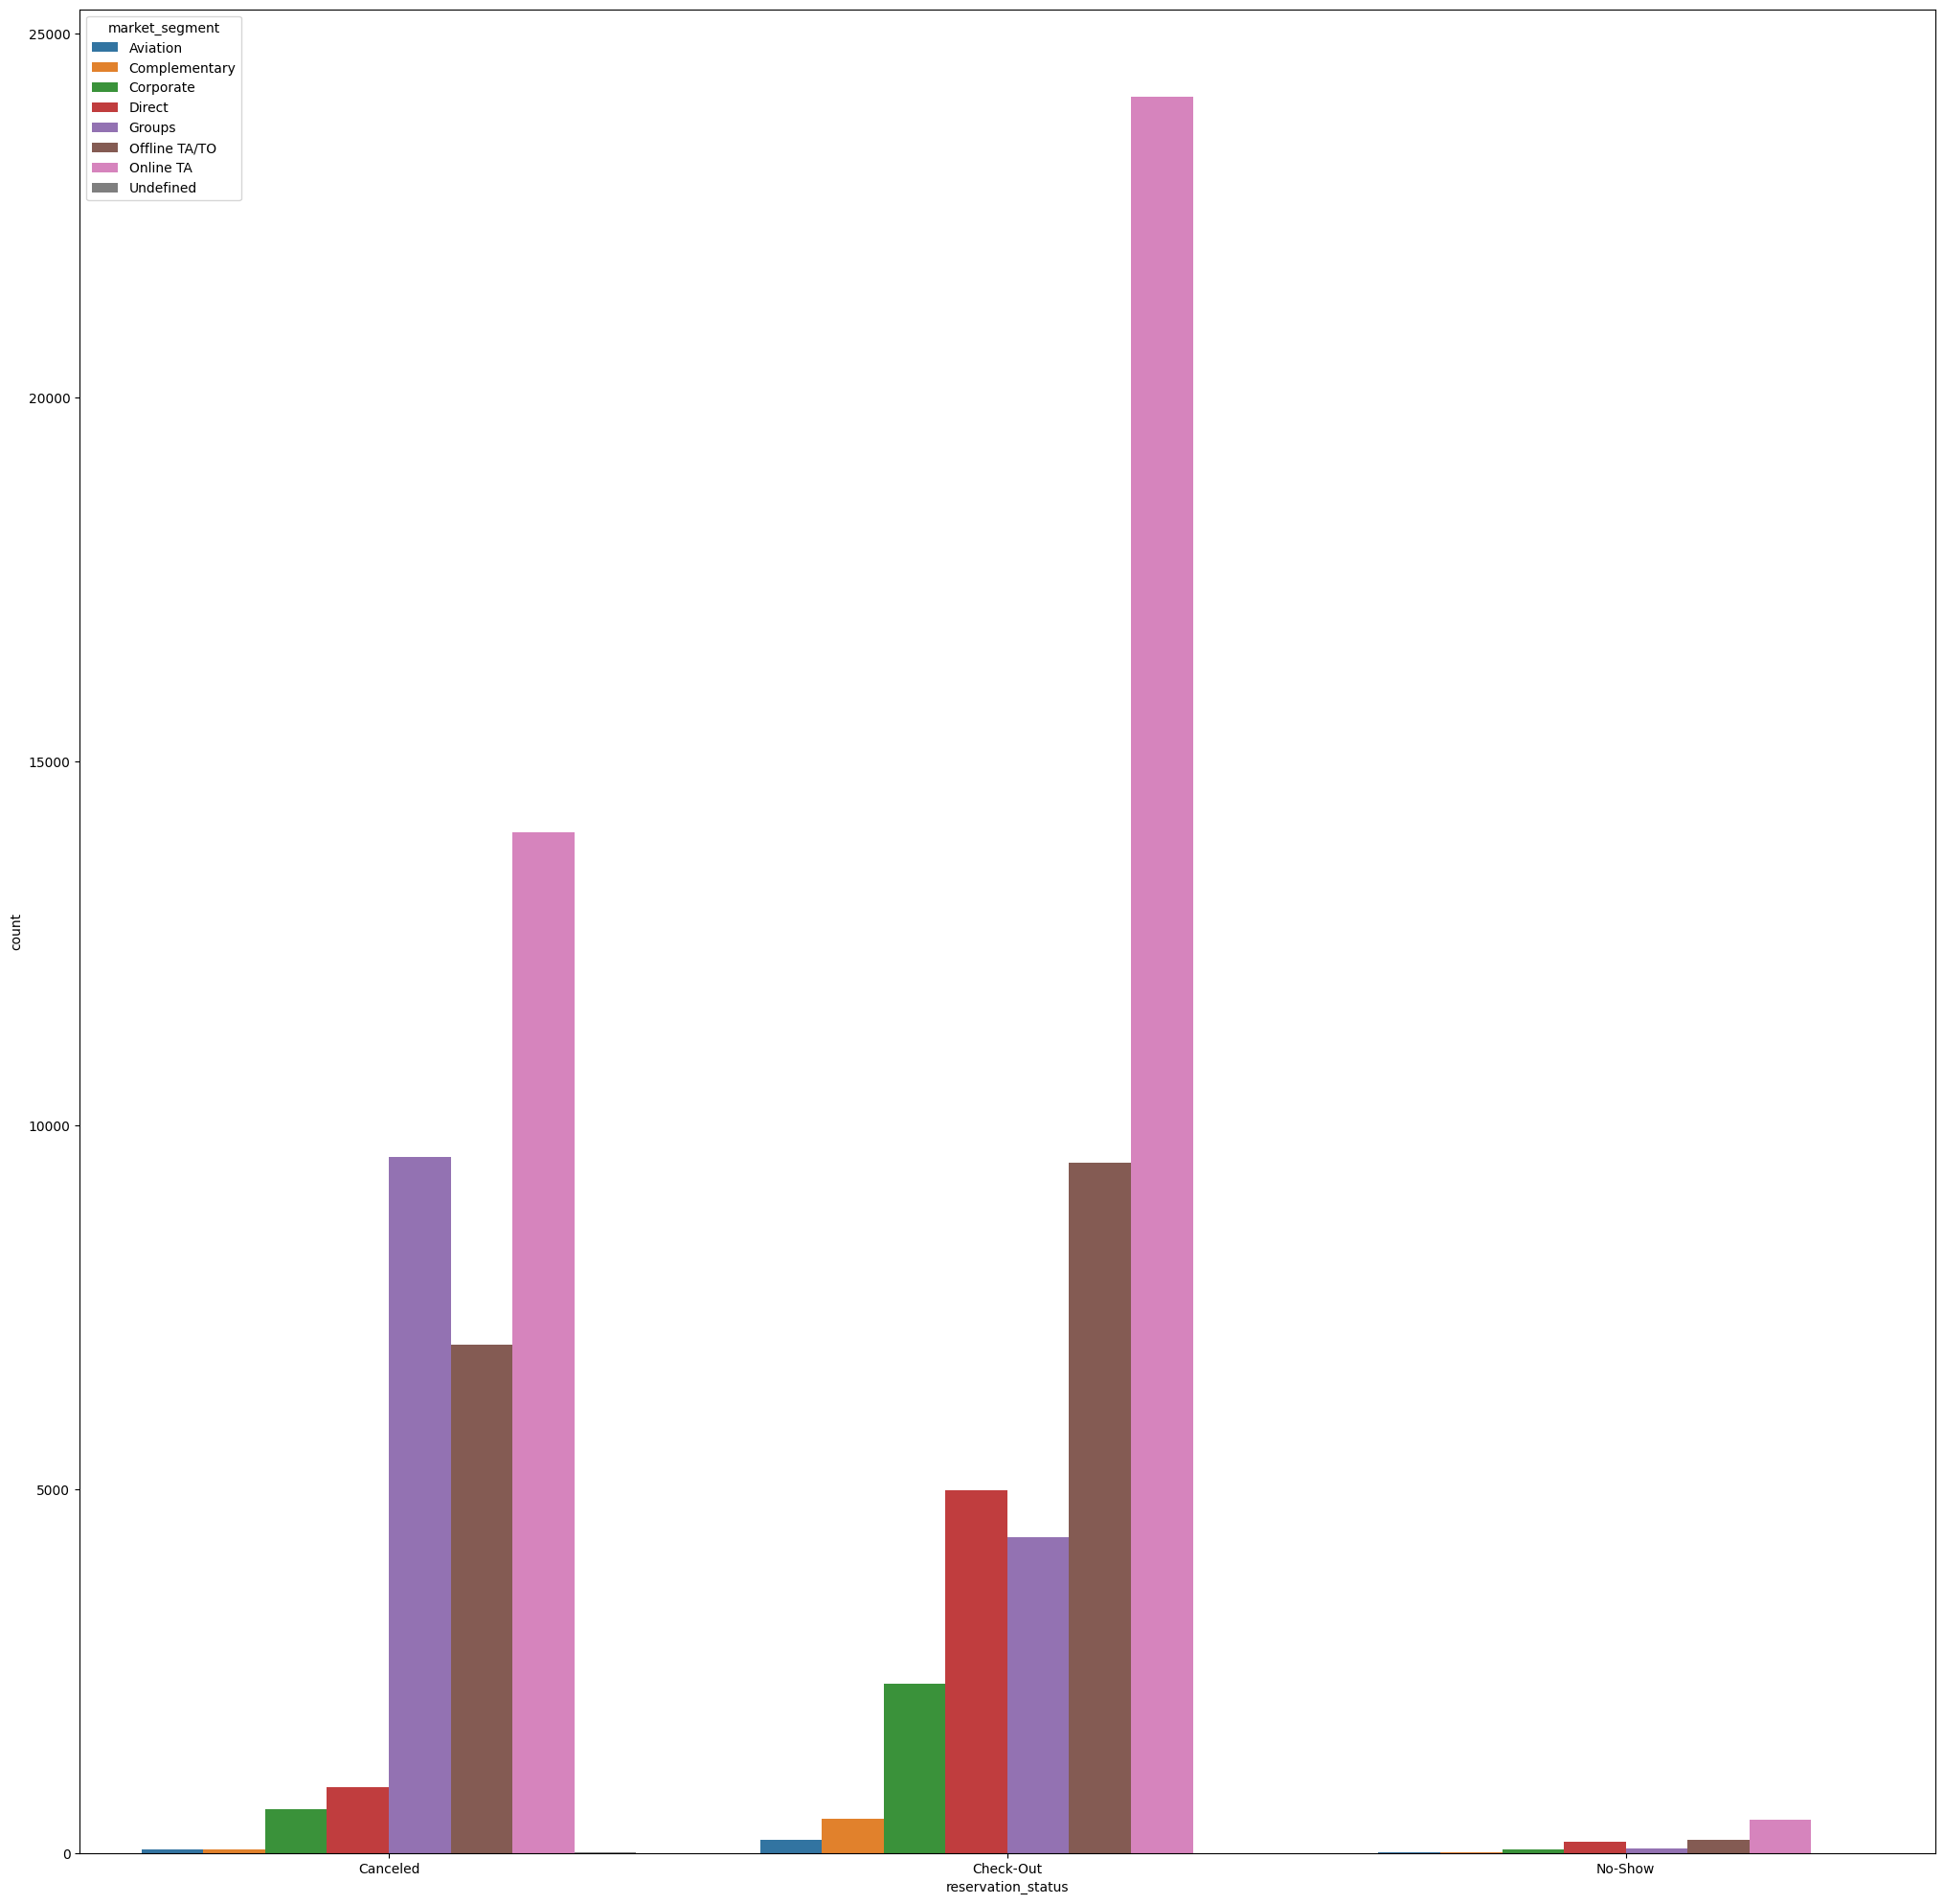

In [377]:
plt.figure(figsize=(25, 25))
sns.barplot(data=city_hotel_market, x='reservation_status', y='count',hue='market_segment')
plt.show()

- 여행사 예약이 많다
- 그룹예약을 했을때 취소률이 높다

In [378]:
city_hotel_segment = city_hotel.groupby(['reservation_status','distribution_channel'])['reservation_status'].count().reset_index(name='count')

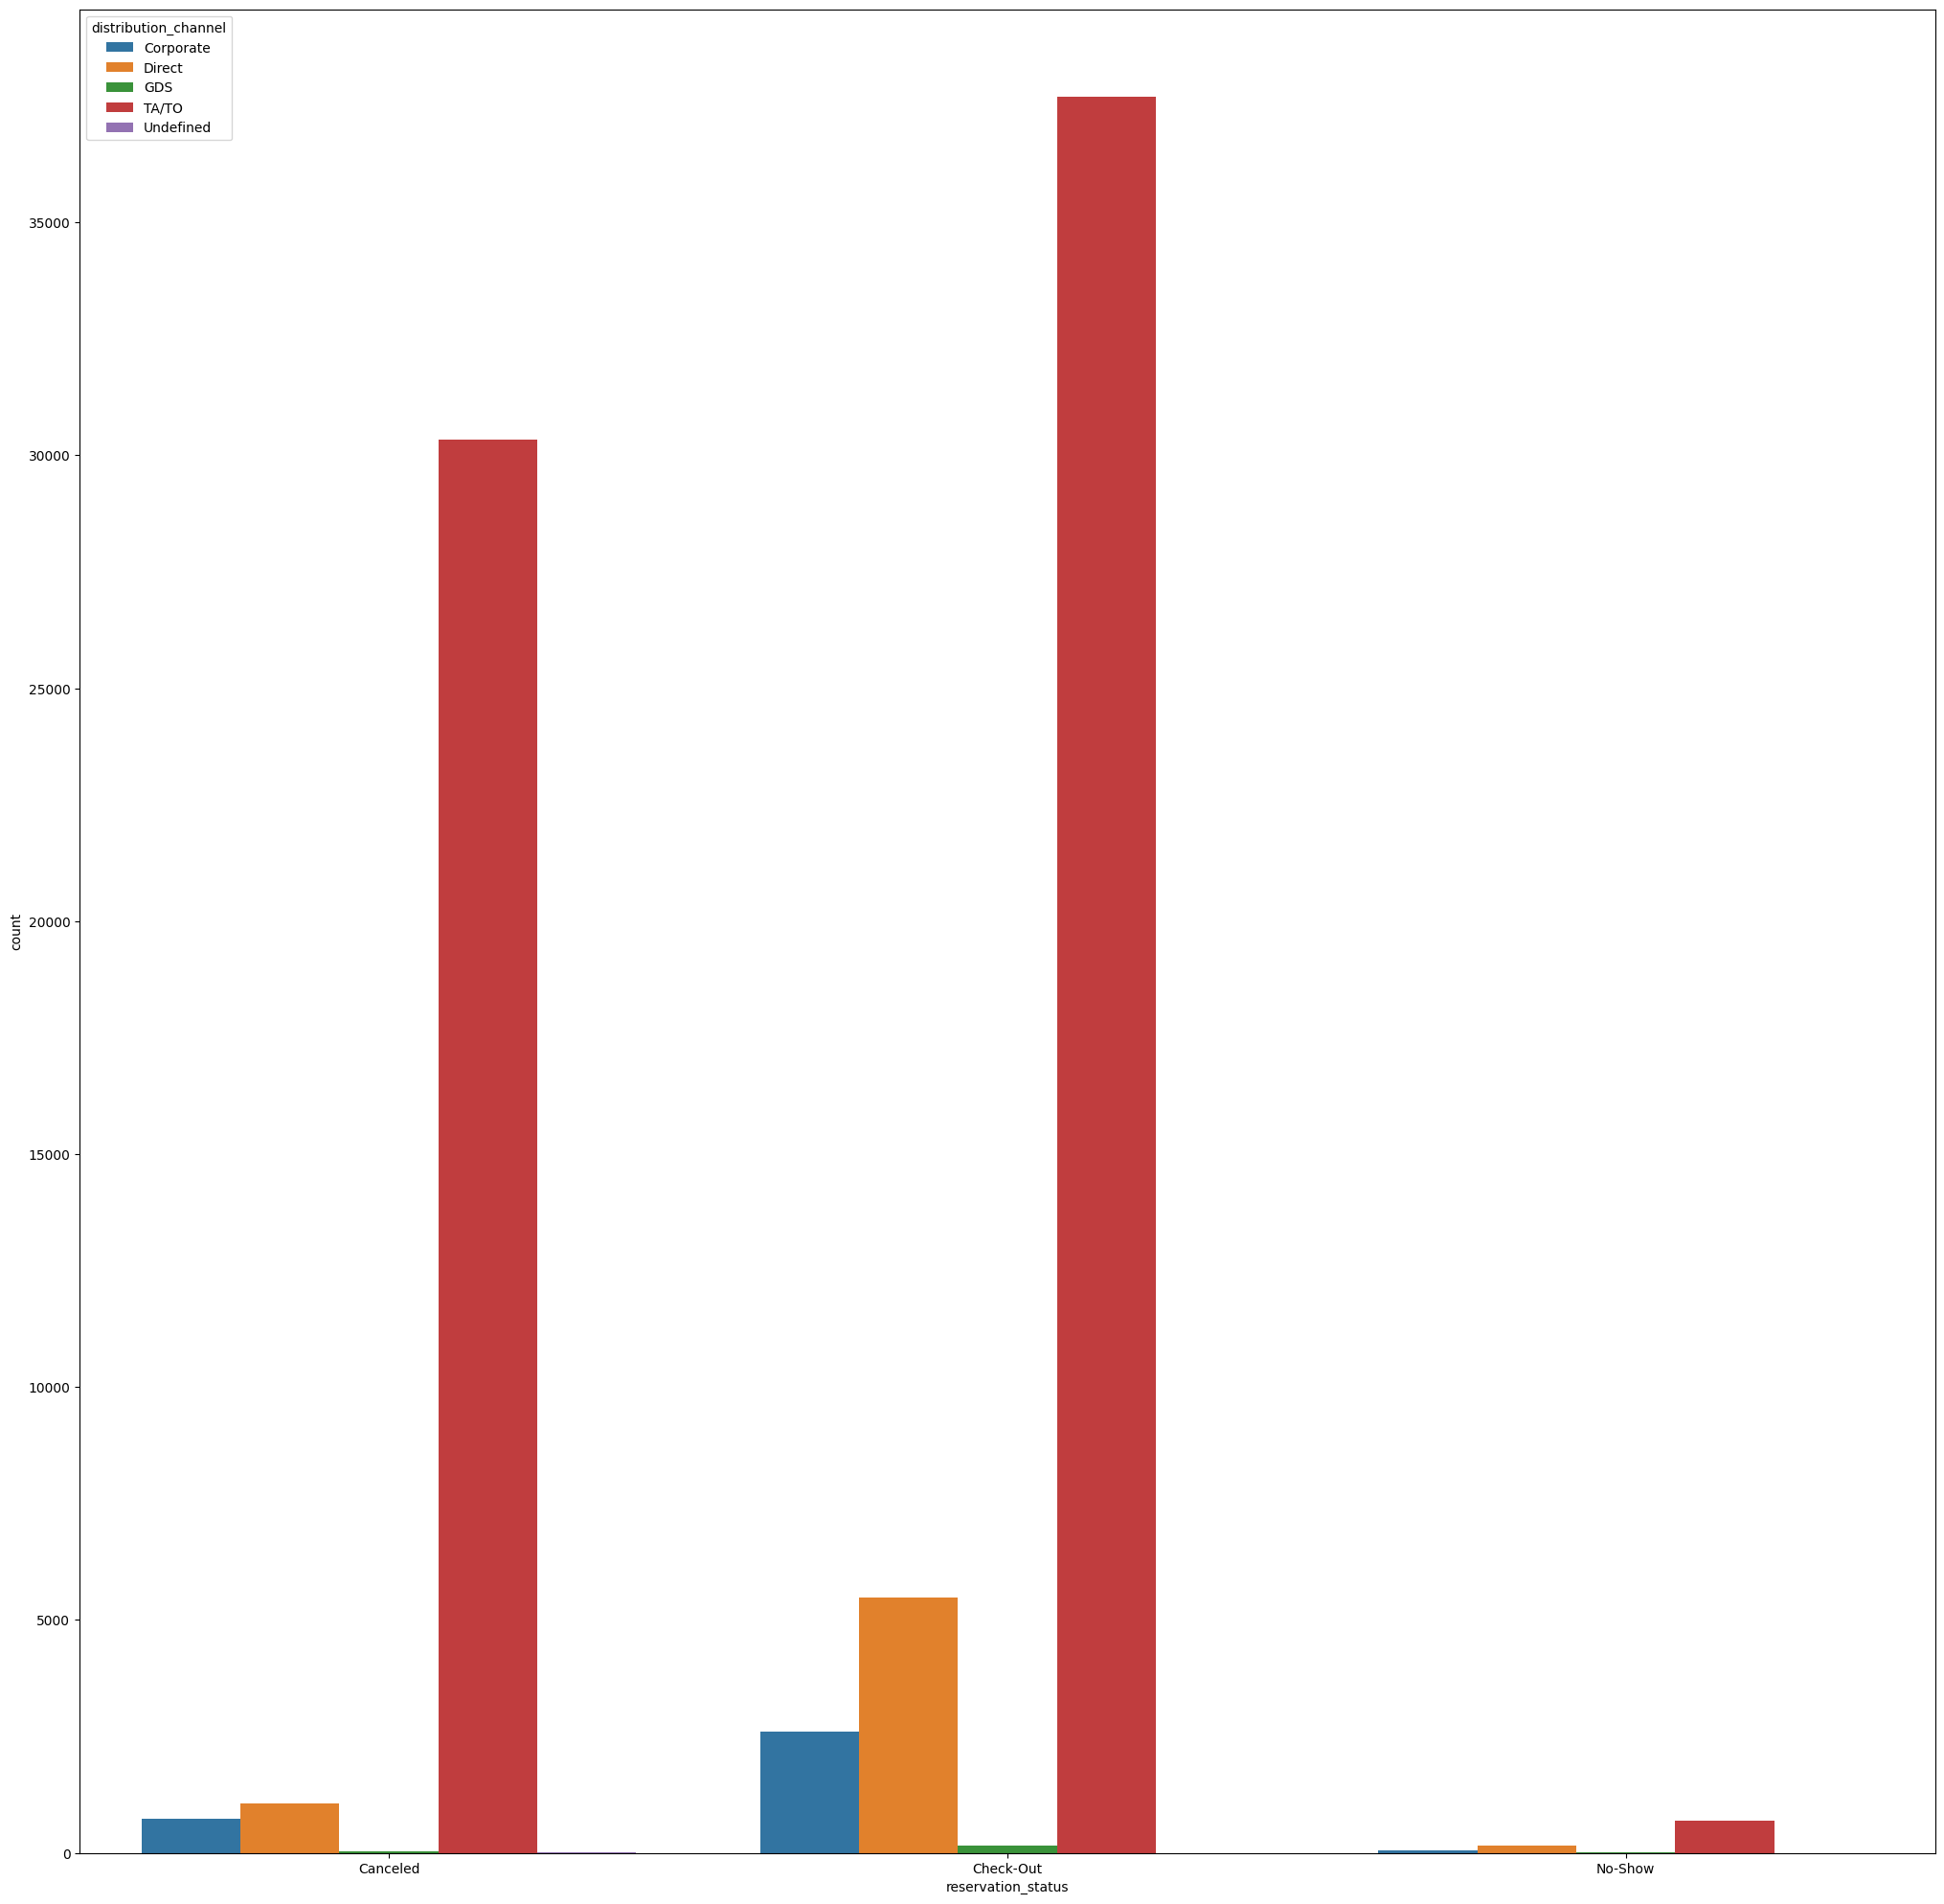

In [379]:
plt.figure(figsize=(25, 25))
sns.barplot(data=city_hotel_segment, x='reservation_status', y='count',hue='distribution_channel')
plt.show()

- 여행사 유통이 대부분이다

In [380]:
city_special_request = city_hotel.groupby(['total_of_special_requests','reservation_status'])['reservation_status'].size().reset_index(name='count')

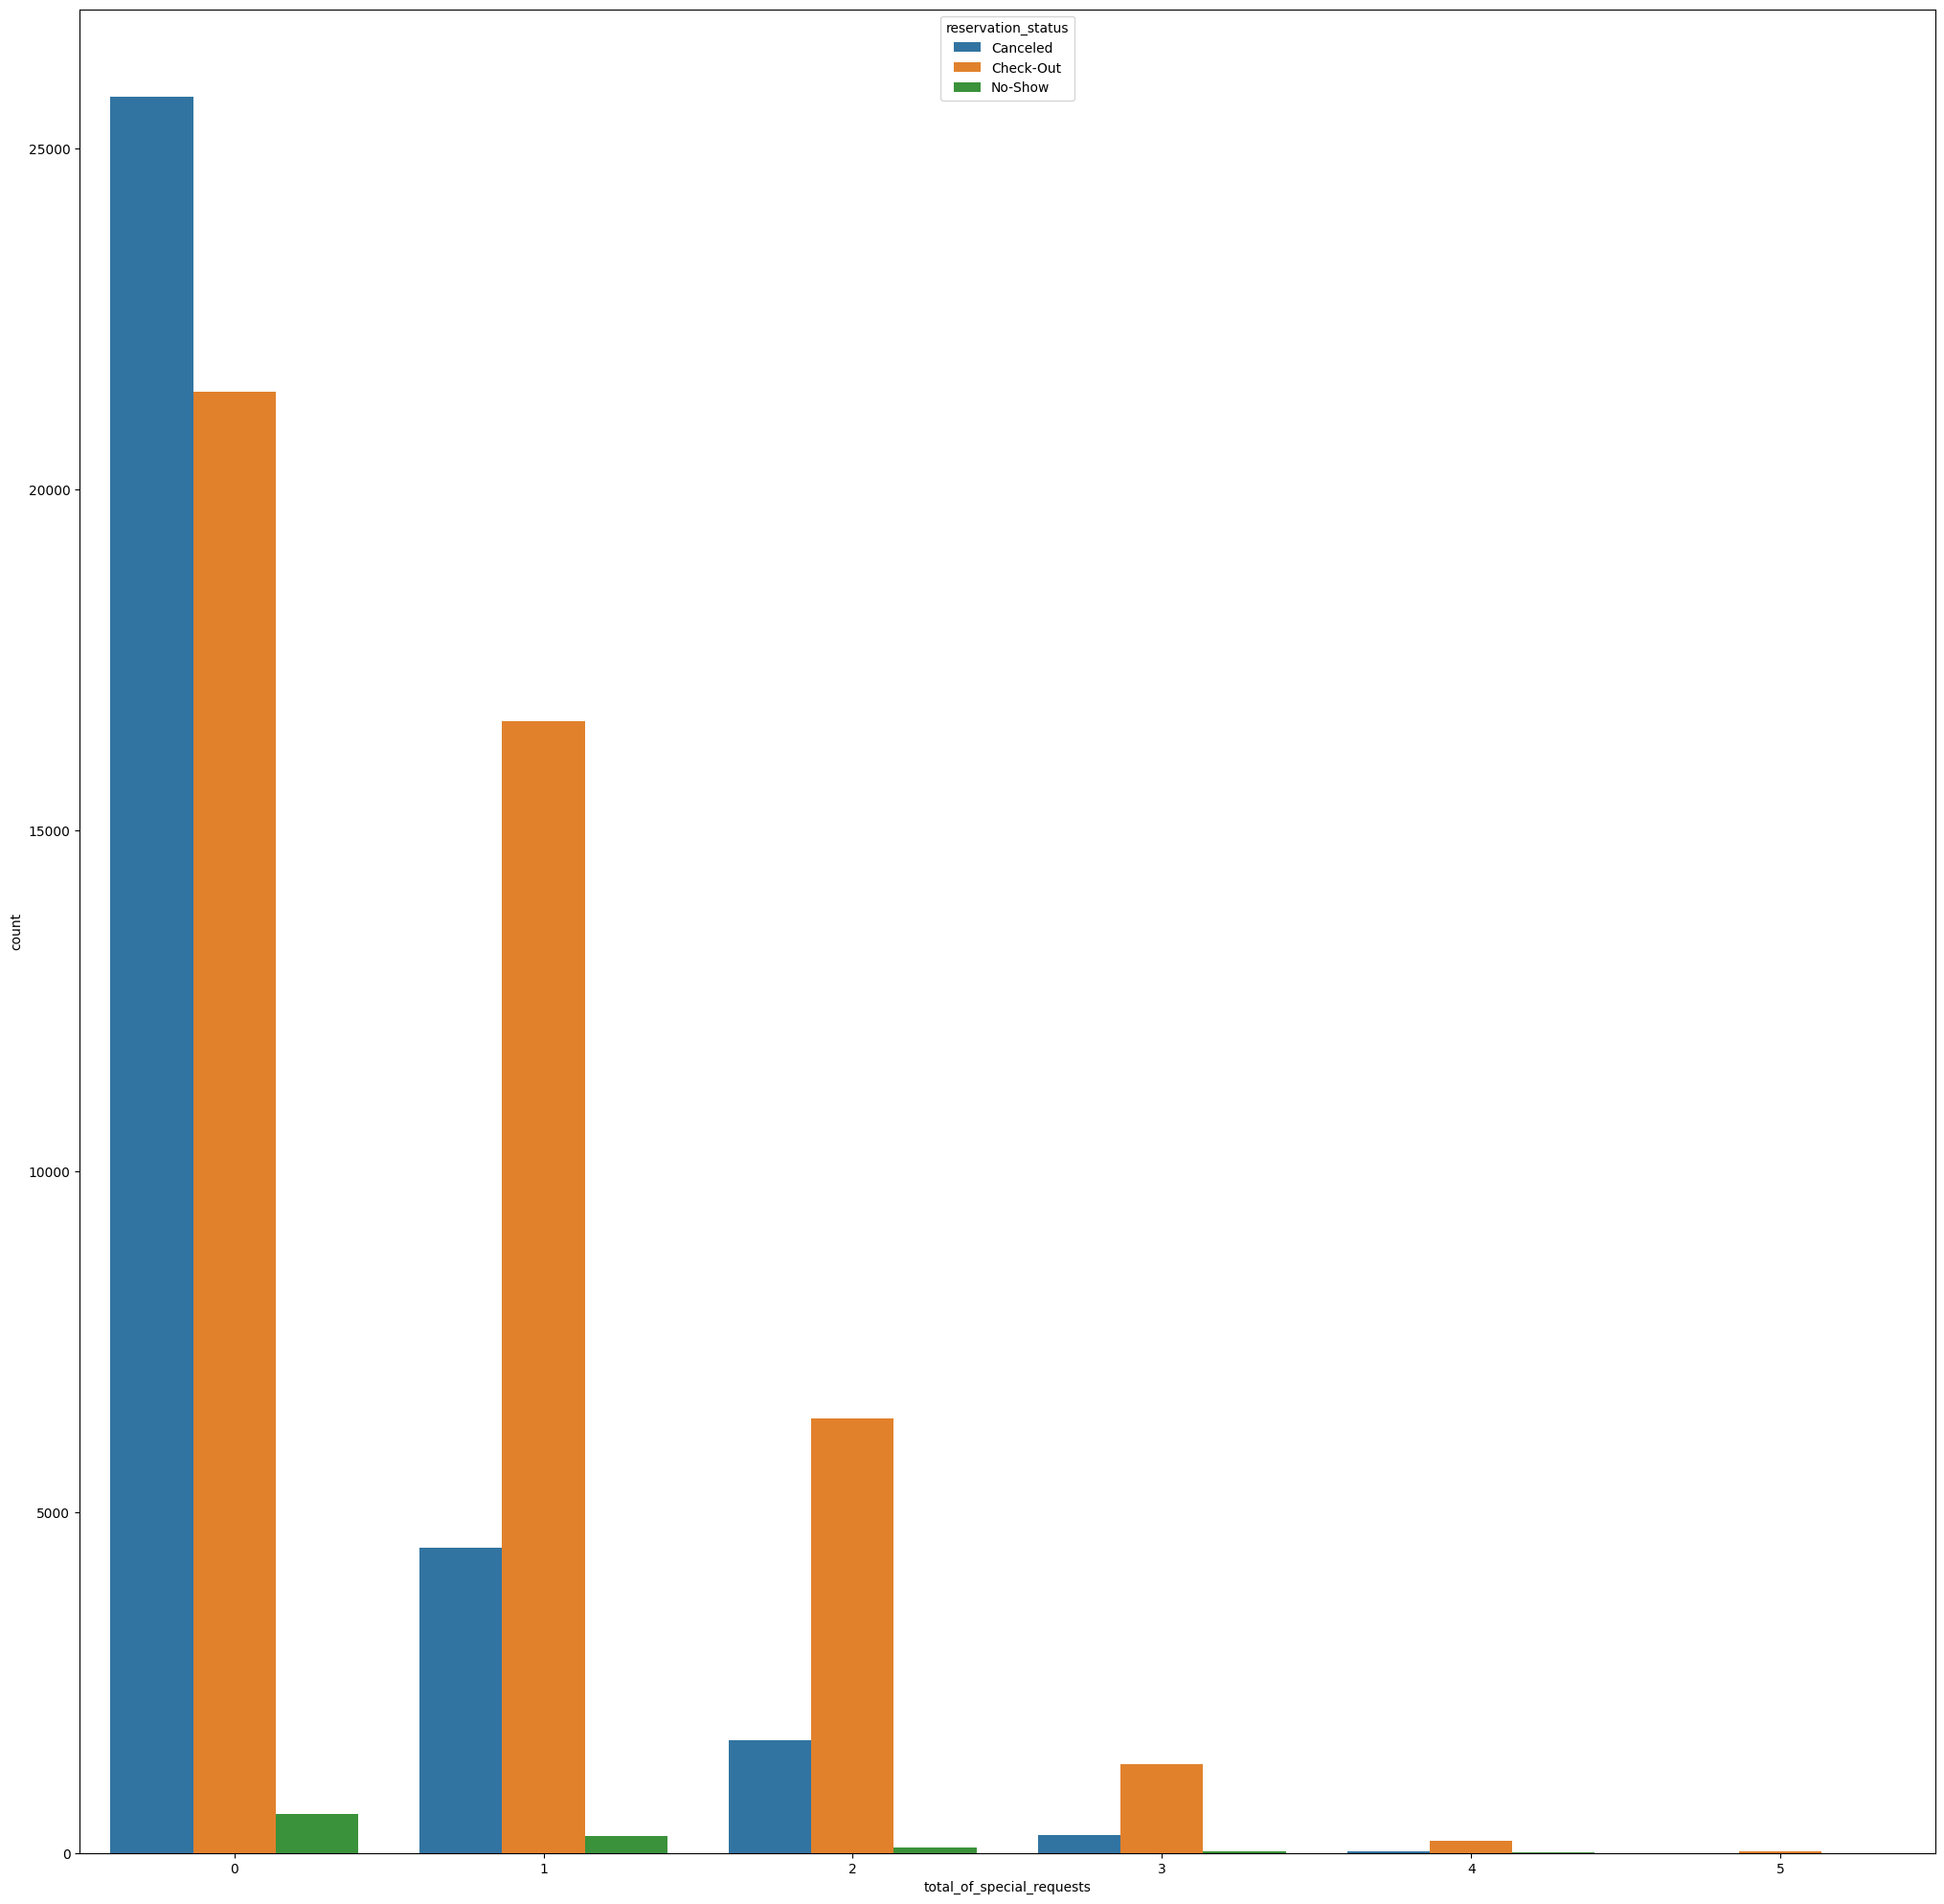

In [381]:
plt.figure(figsize=(25, 25))
sns.barplot(data=city_special_request, x='total_of_special_requests', y='count',hue='reservation_status')
plt.show()

- 요구를 특별히 안한 건수가 많지만 취소가 방문보다 많고 한번 요구했을시에 취소률이 적어진다

In [382]:
city_changed_booking = city_hotel.groupby(['reservation_status','booking_changes'])['reservation_status'].size().reset_index(name='count')

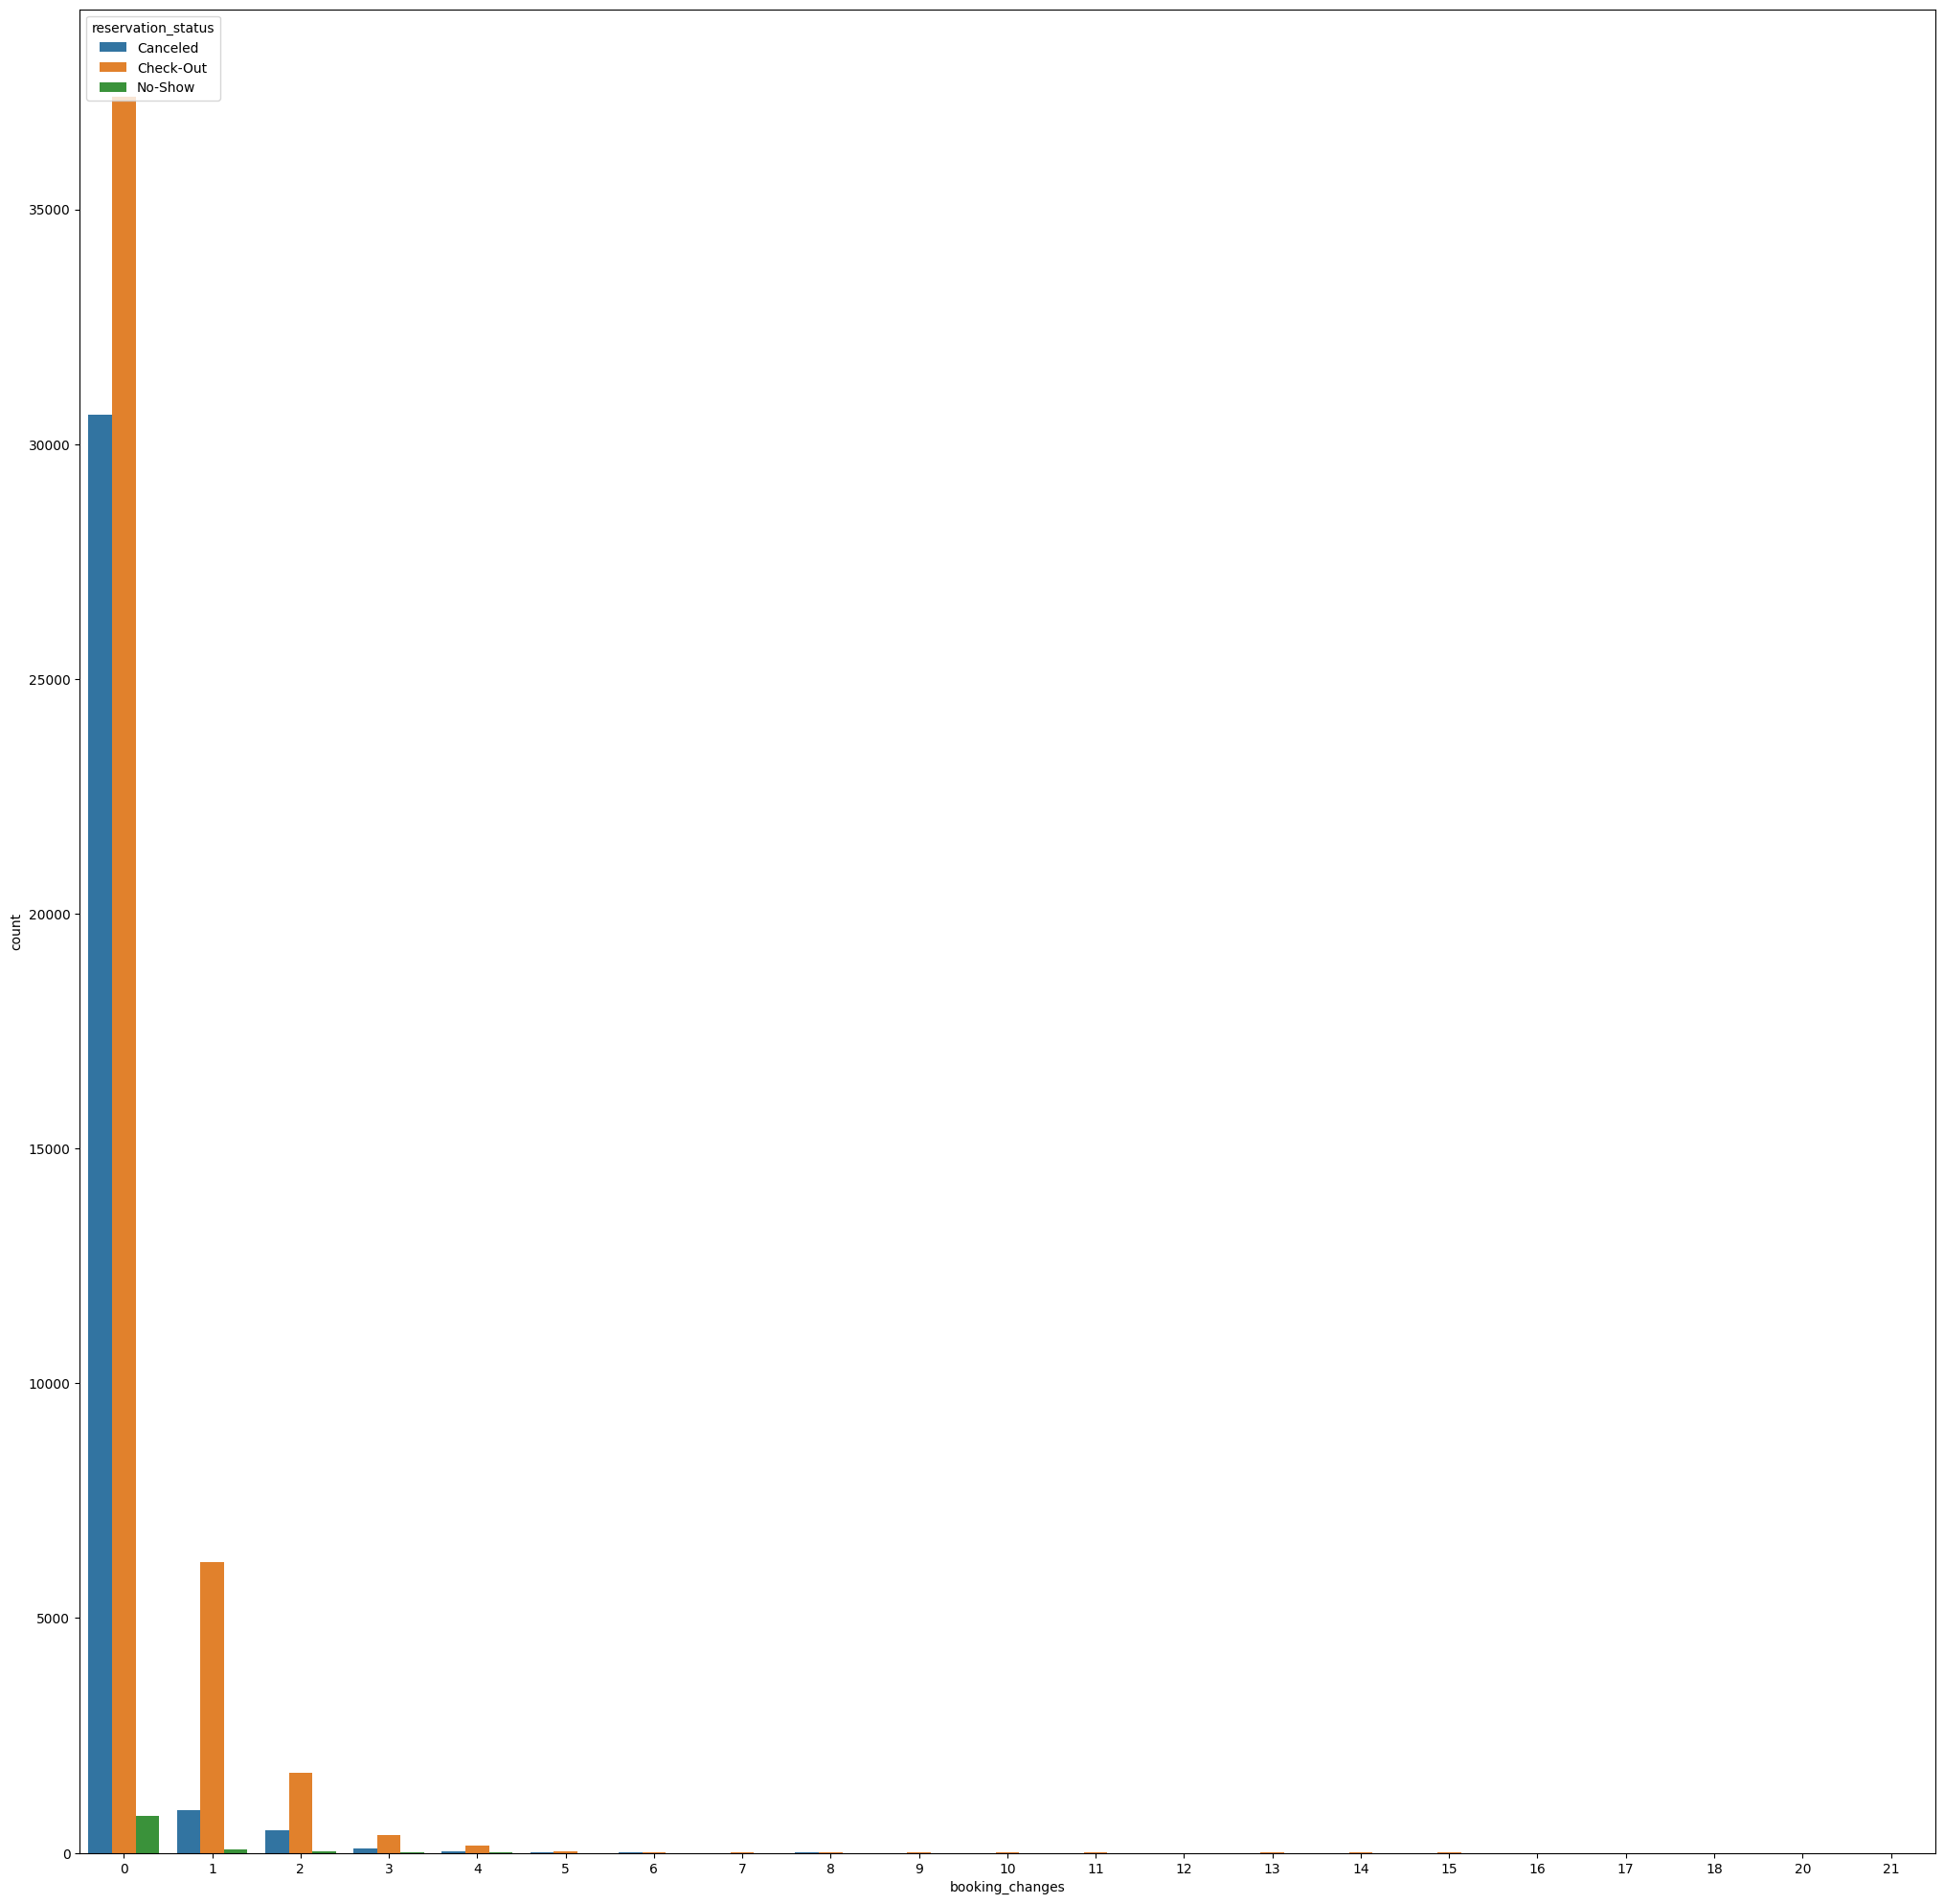

In [383]:
plt.figure(figsize=(25, 25))
sns.barplot(data=city_changed_booking, x='booking_changes', y='count',hue='reservation_status')
plt.show()

- 특별 request가 한번 있었을떄 취소가 적음

In [384]:
city_day_waiting_list = city_hotel.groupby('reservation_status')['days_in_waiting_list'].mean().reset_index()

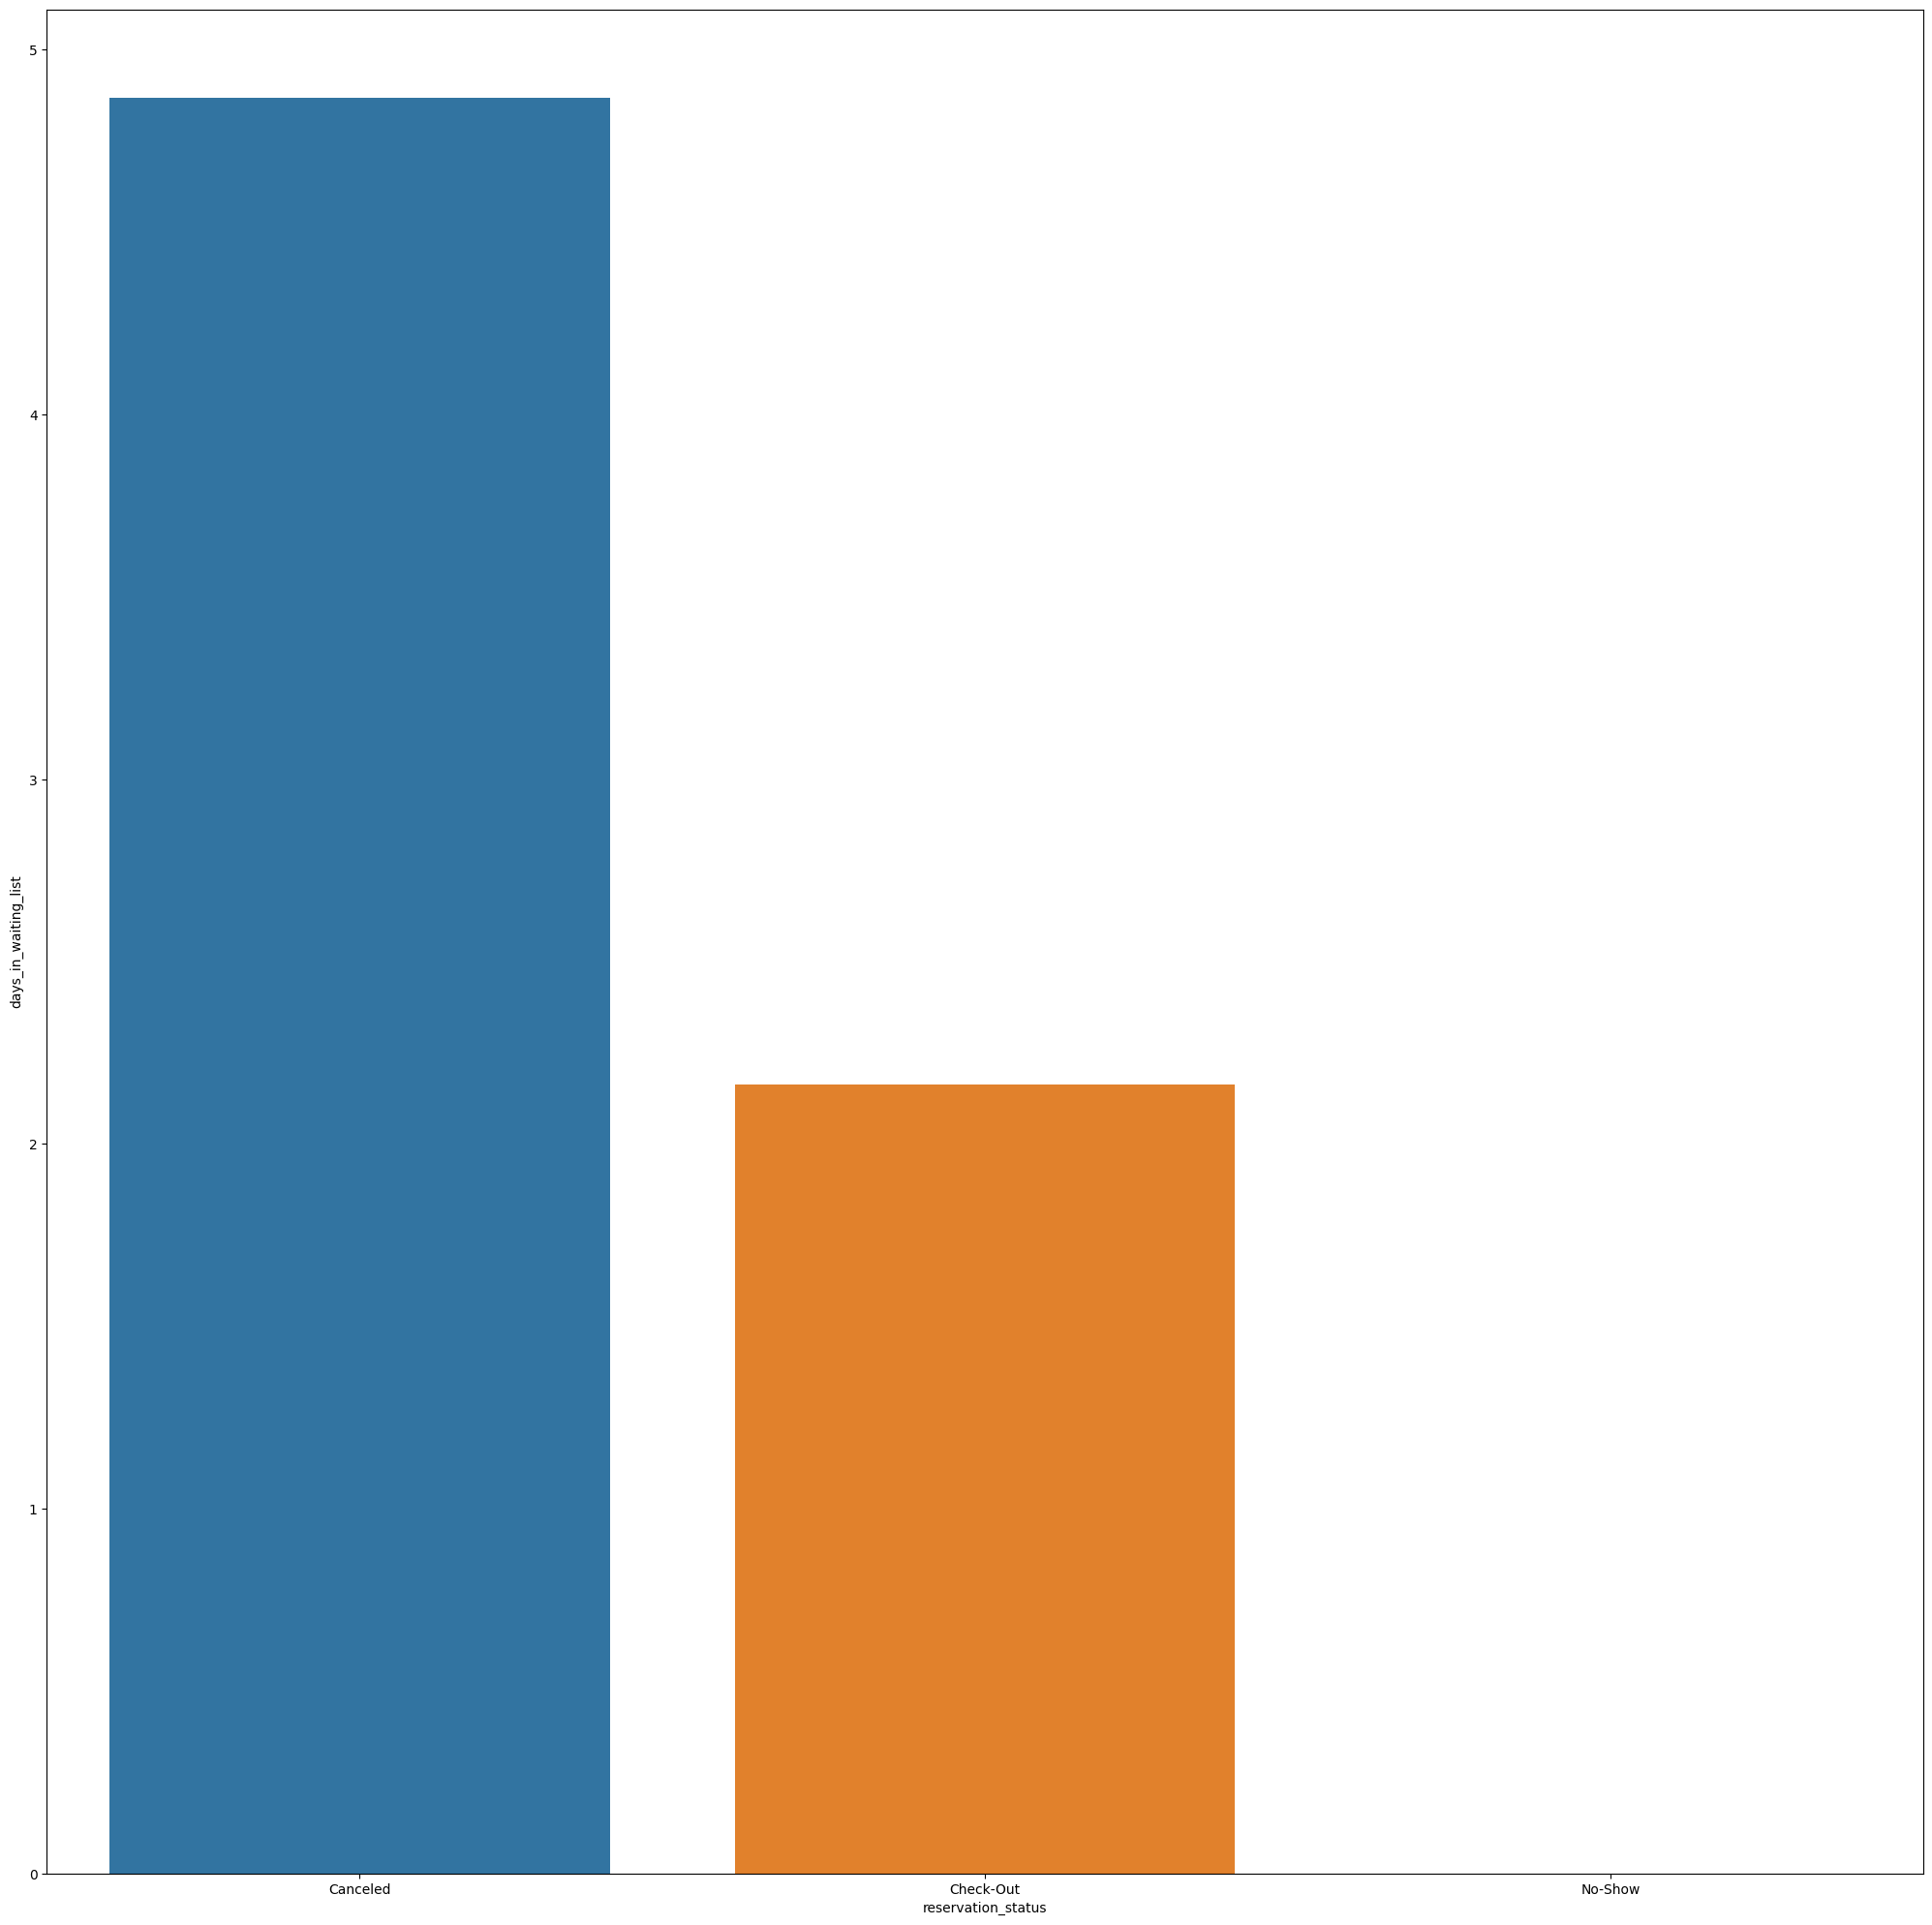

In [385]:
plt.figure(figsize=(25, 25))
sns.barplot(data=city_day_waiting_list, x='reservation_status', y='days_in_waiting_list')
plt.show()

- waiting list에 오래 기달릴 때 취소할 확률이 높다

In [386]:
city_cust_hist = city_hotel.groupby(['reservation_status','previous_cancellations'])['reservation_status'].size().reset_index(name='count')

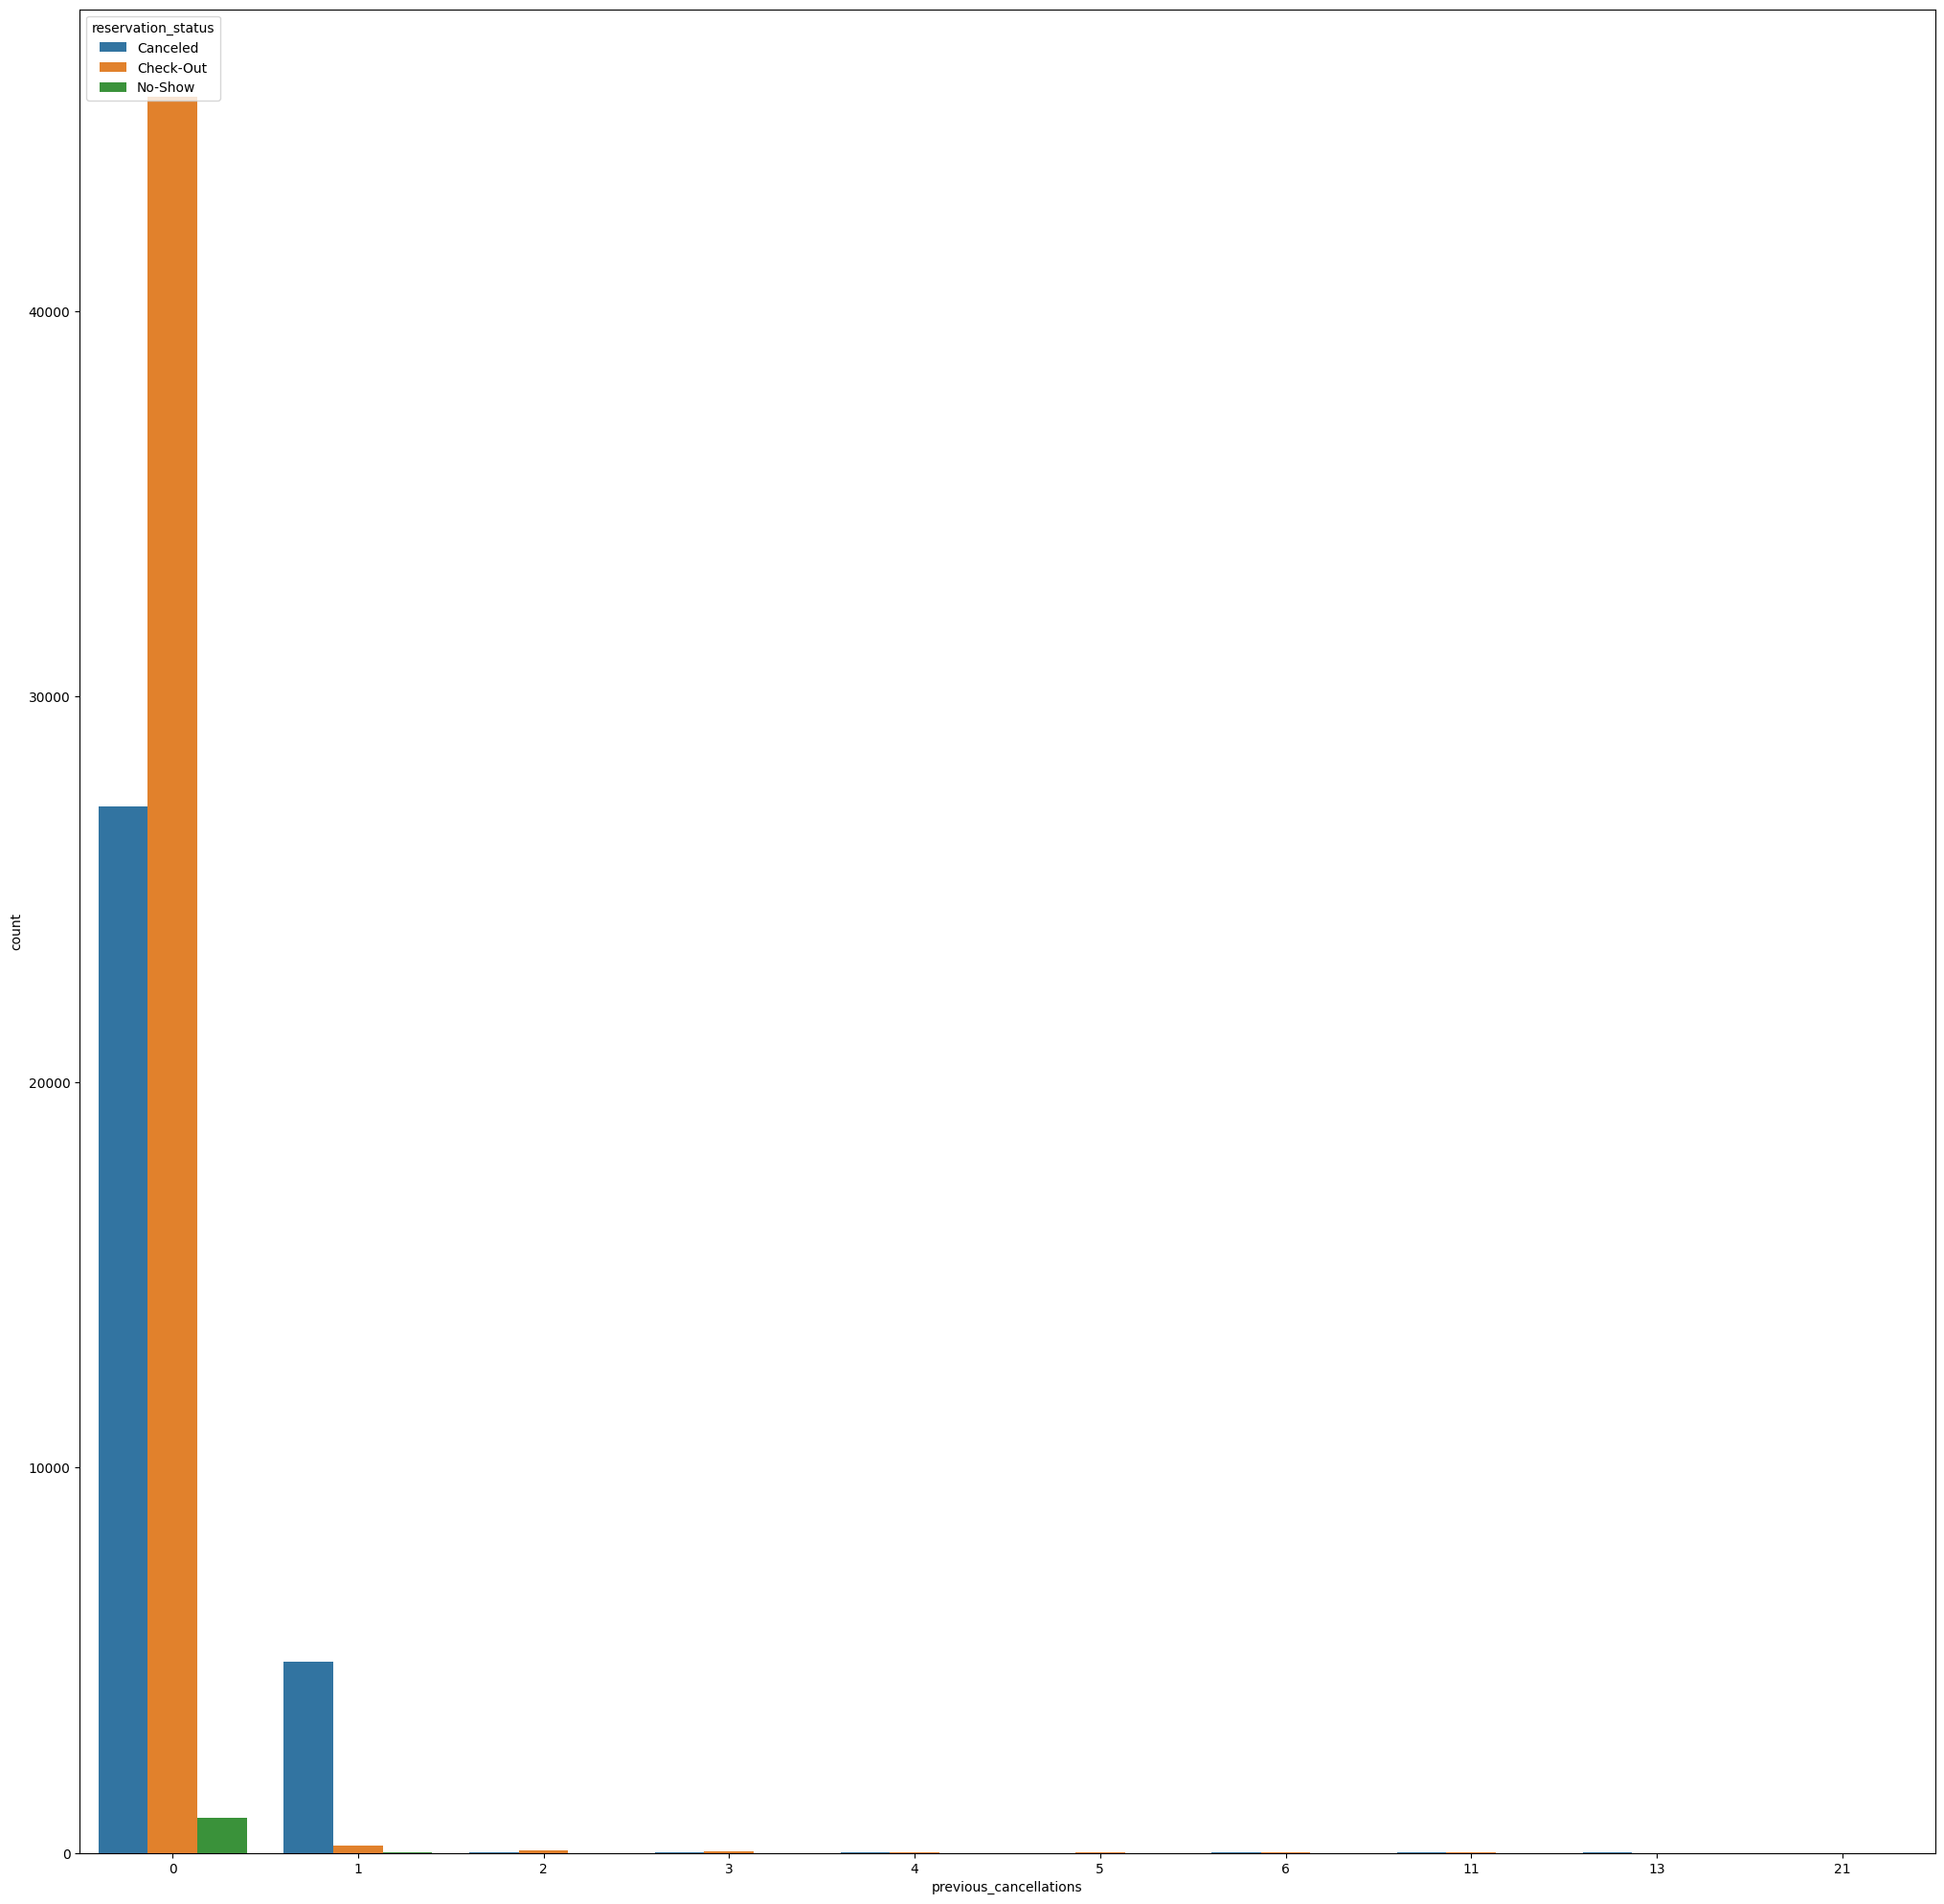

In [387]:
plt.figure(figsize=(25, 25))
sns.barplot(data=city_cust_hist, x='previous_cancellations', y='count',hue='reservation_status')
plt.show()

- 취소를 한번 한 기록이 있는 손님은 취소률이 높다

In [388]:
city_repeated = city_hotel.groupby(['reservation_status','is_repeated_guest'])['reservation_status'].size().reset_index(name='count')


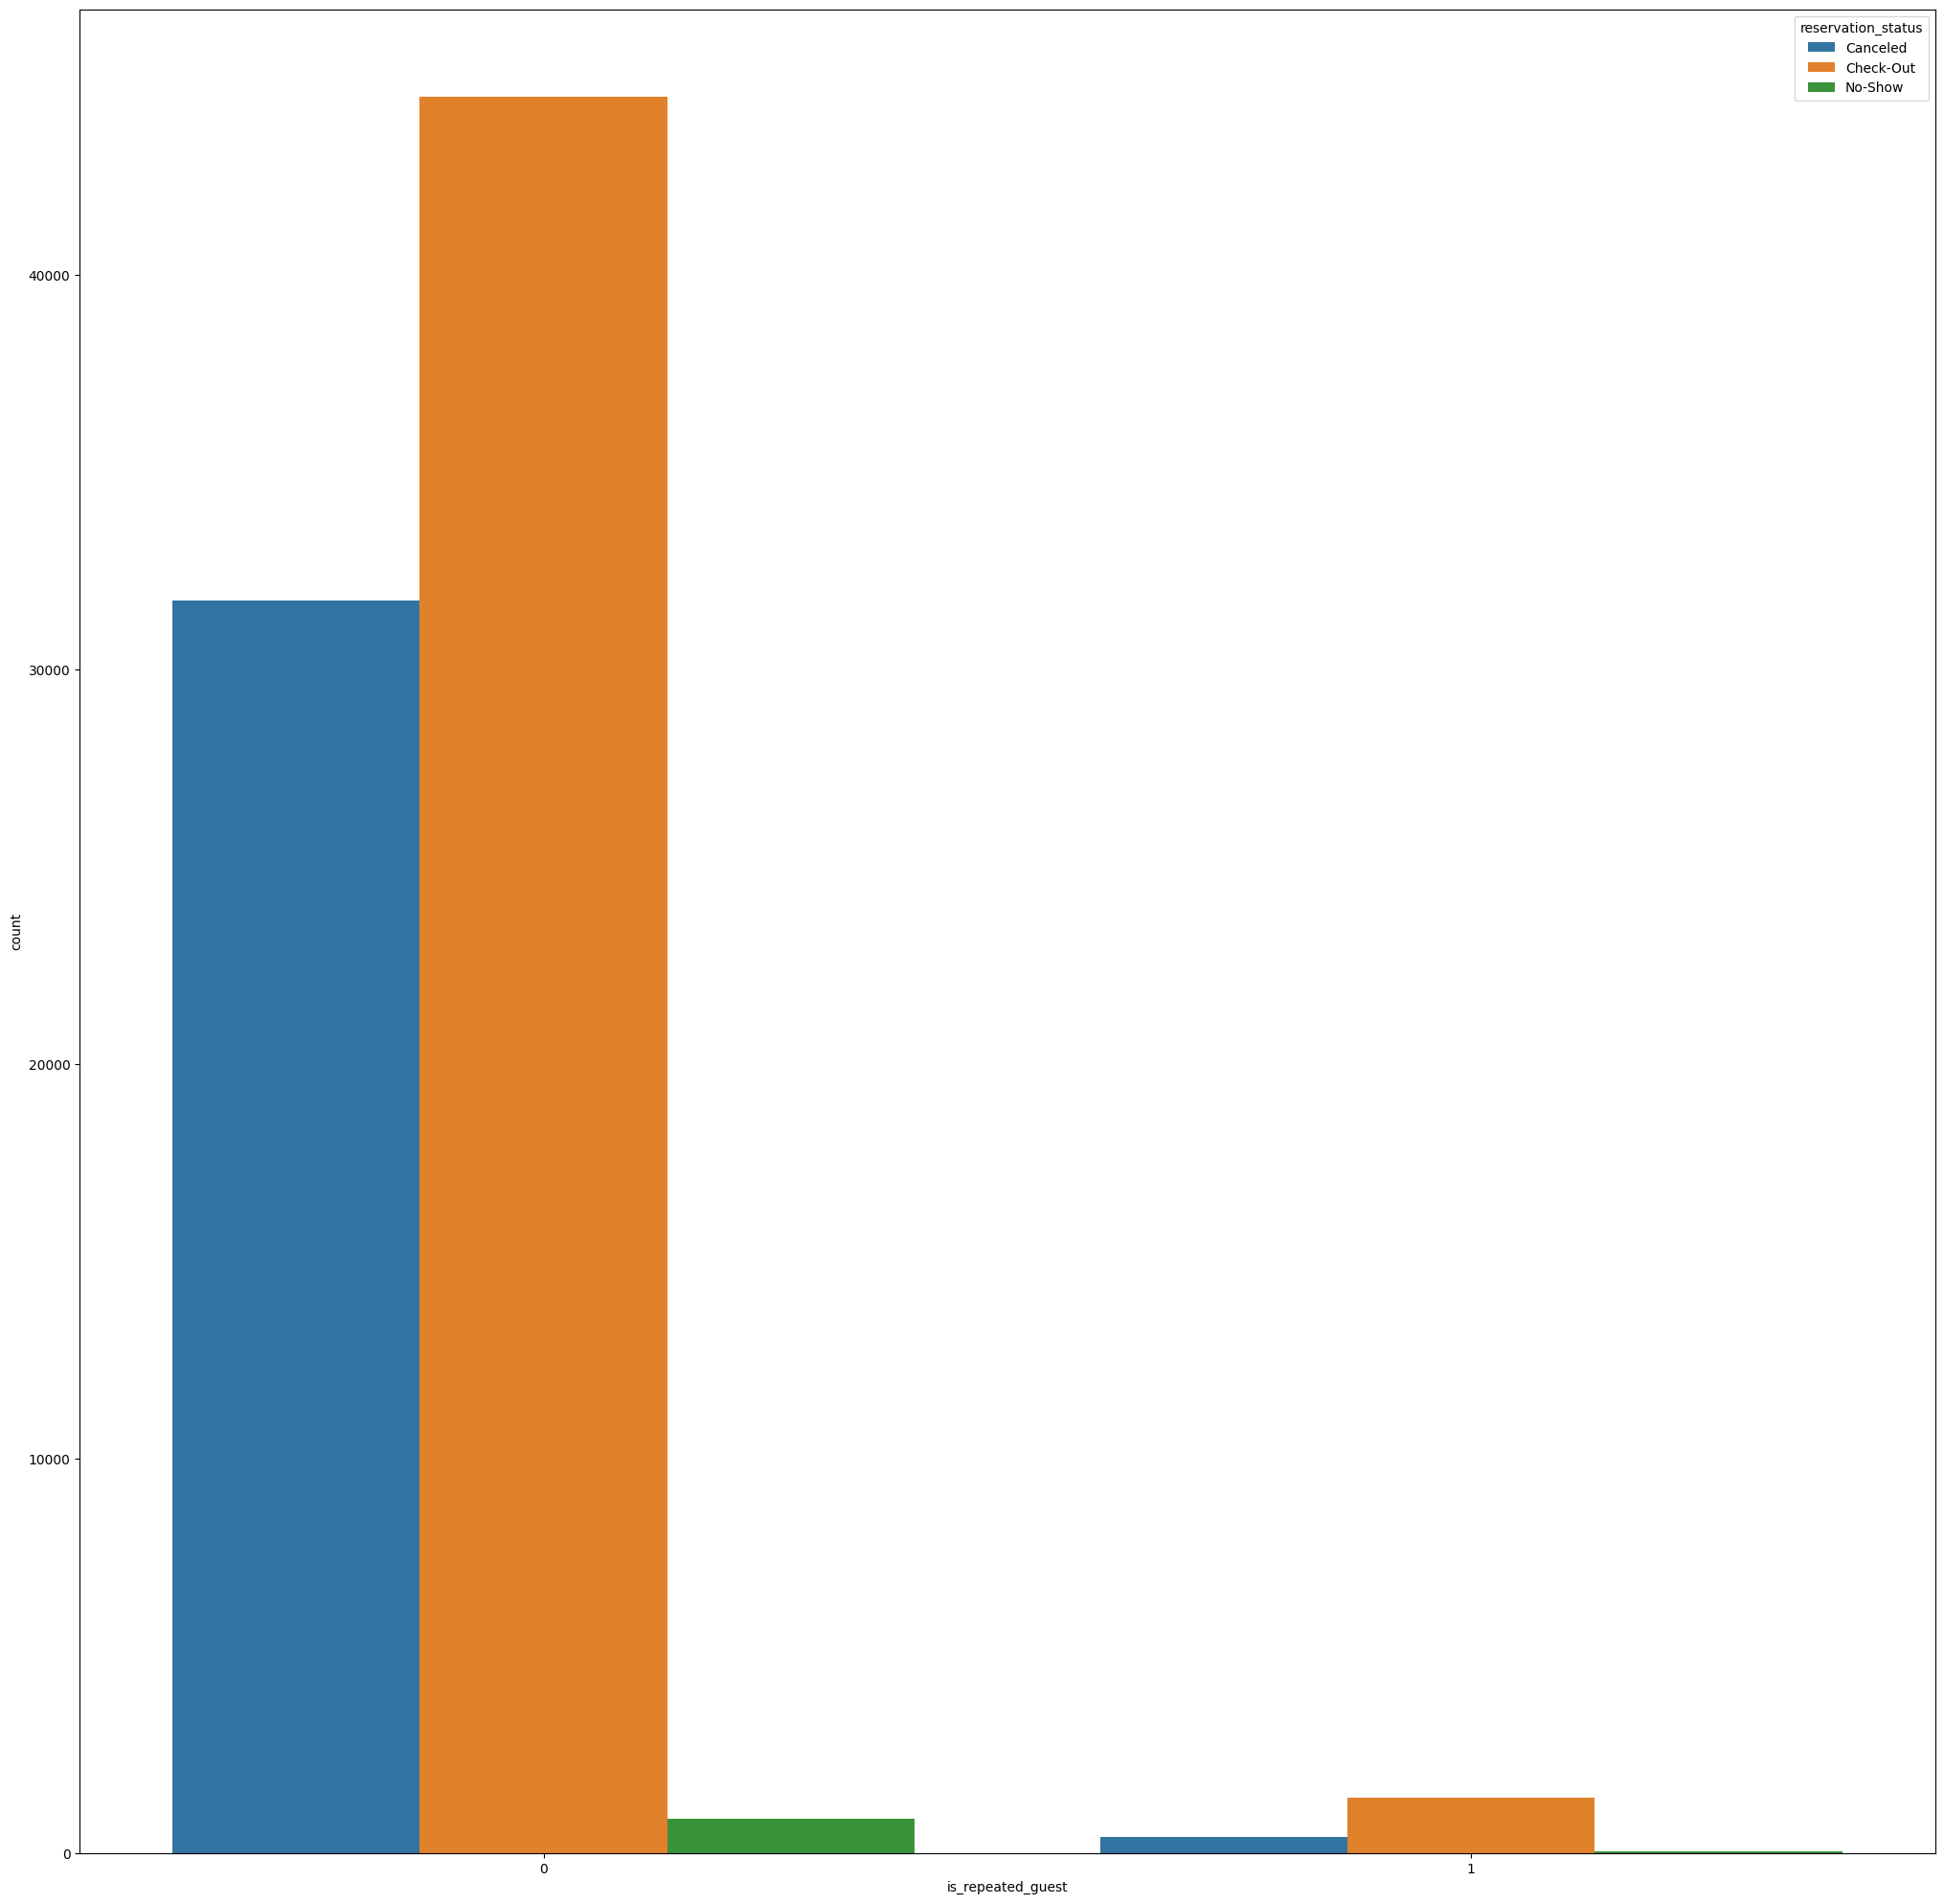

In [389]:
plt.figure(figsize=(25, 25))
sns.barplot(data=city_repeated, x='is_repeated_guest', y='count',hue='reservation_status')
plt.show()

In [390]:
hotel_price = hotel_booking_df.groupby('hotel')['adr'].mean().reset_index()

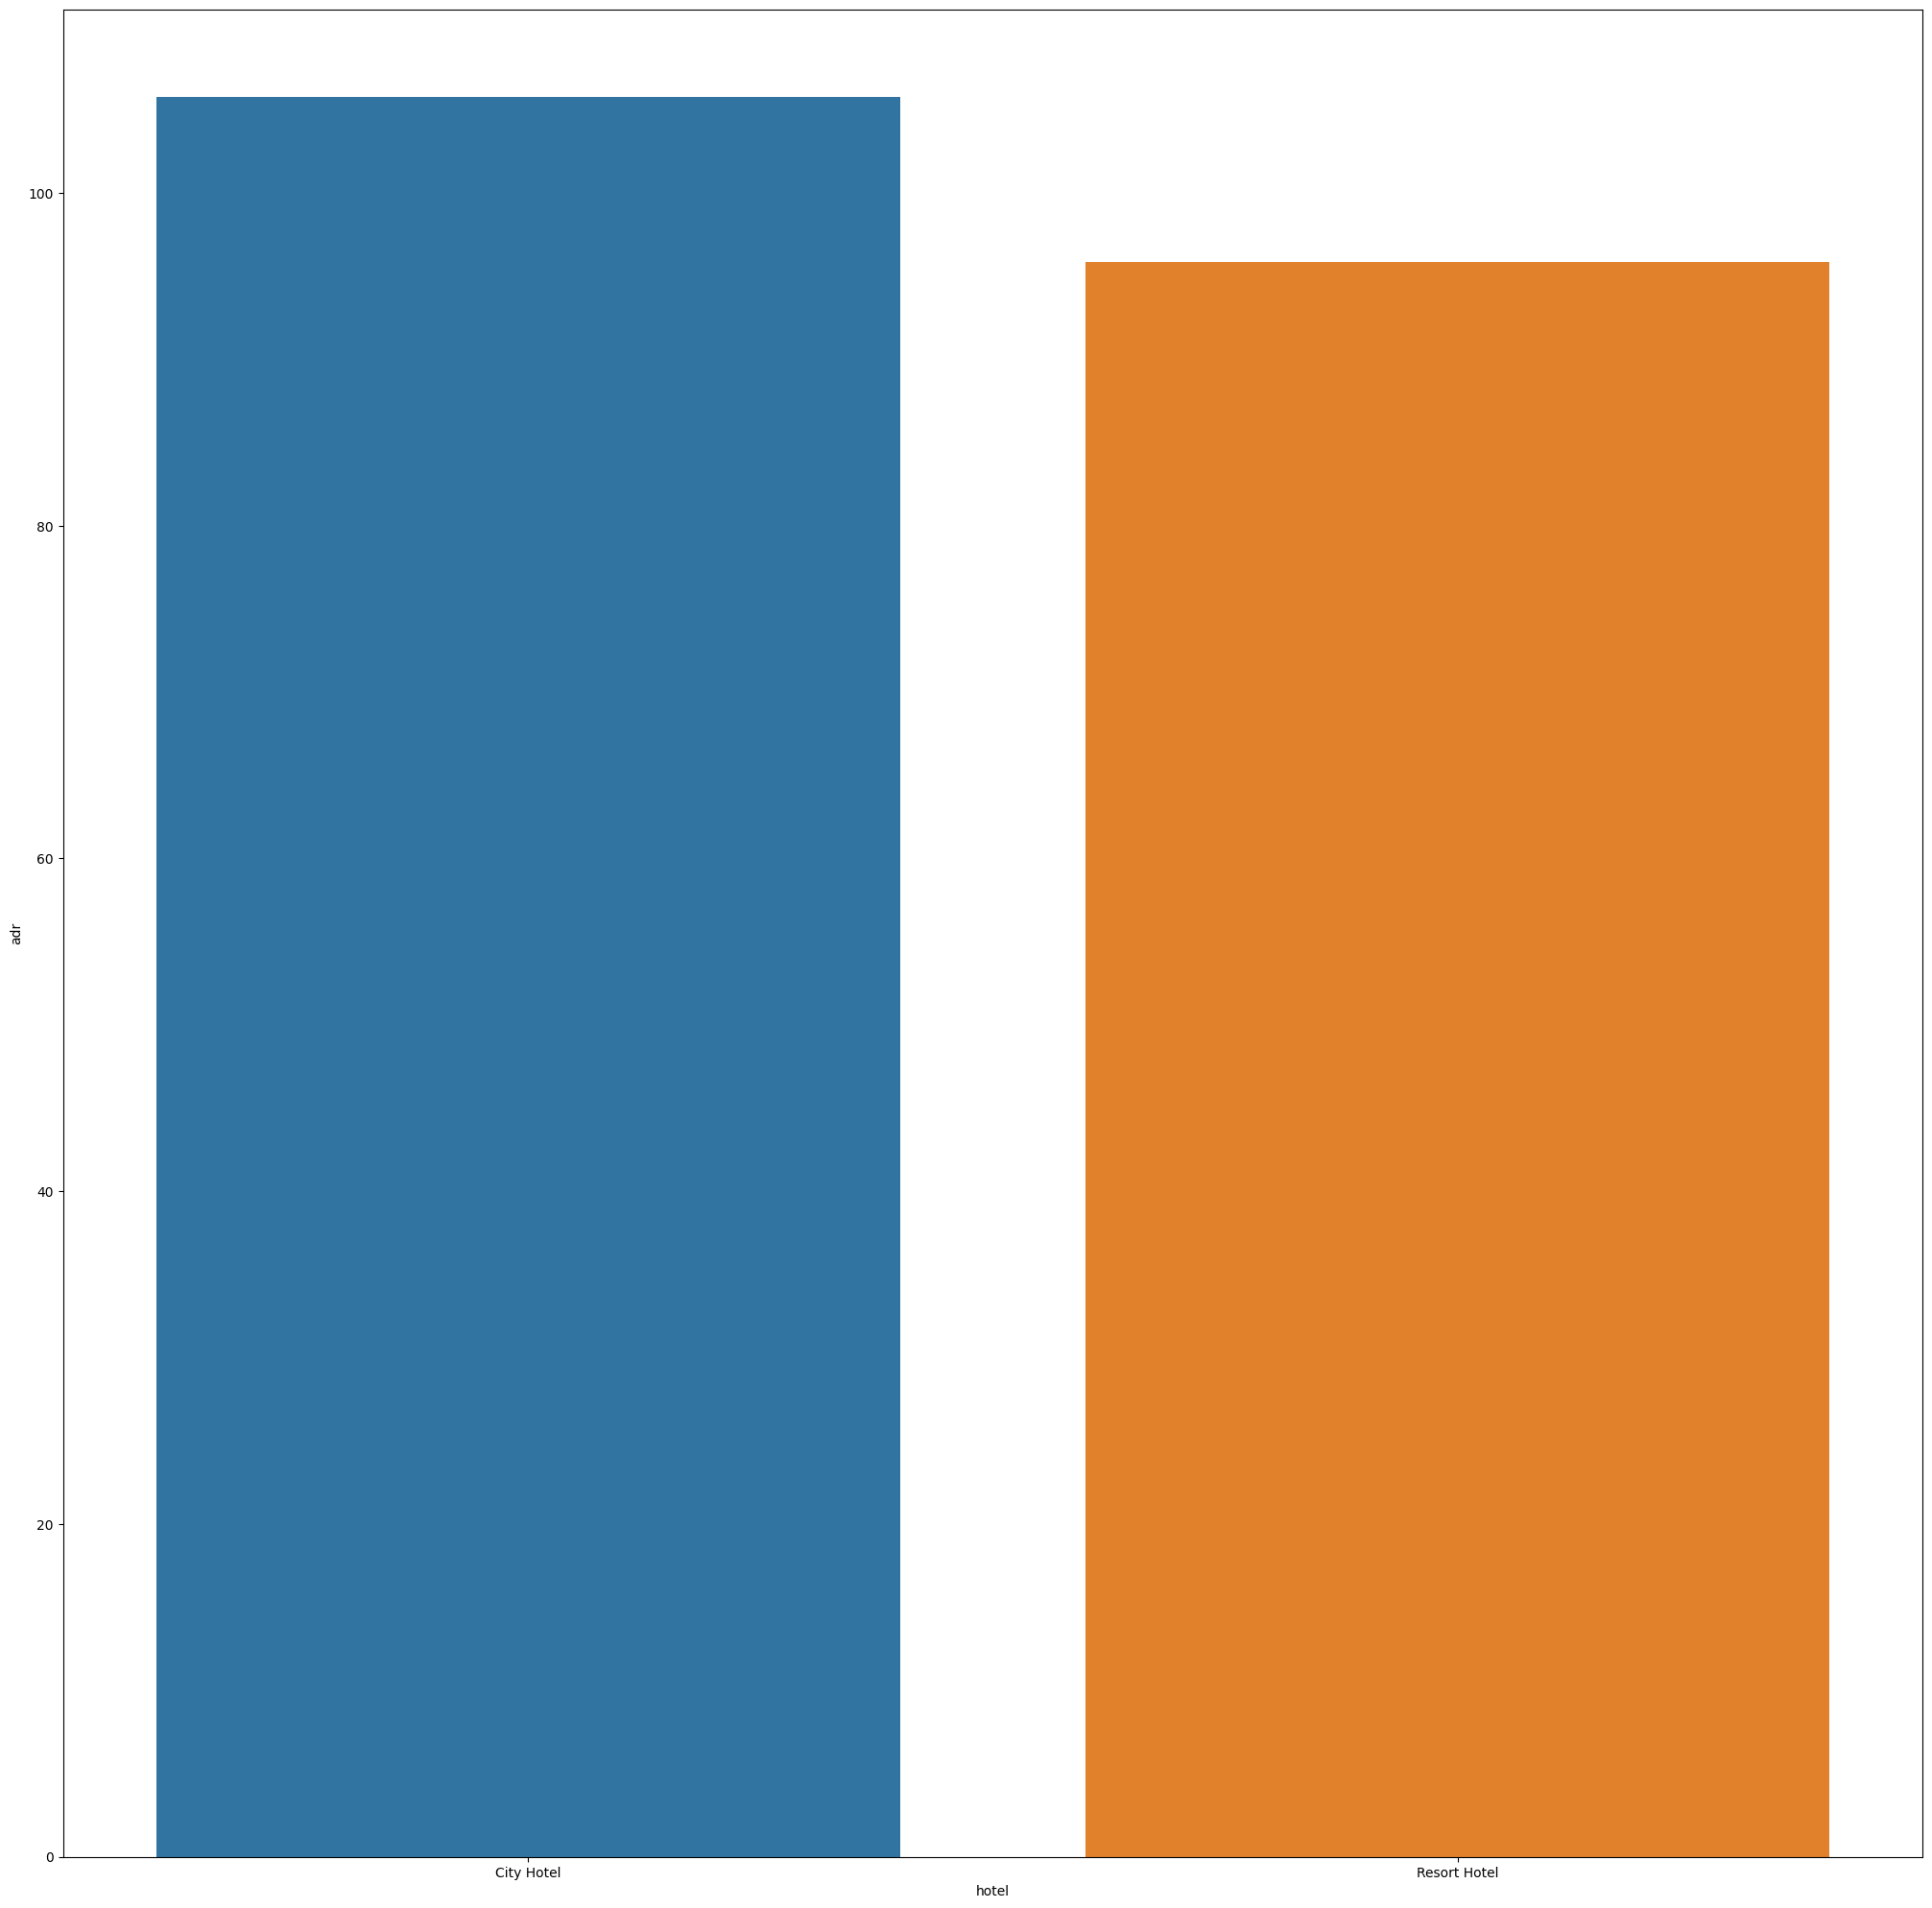

In [391]:
plt.figure(figsize=(25, 25))
sns.barplot(data=hotel_price, x='hotel', y='adr')
plt.show()

- 시티 호텔이 리조트호텔보다 평균가가 비싸다

In [392]:
hotel_price_by_status = hotel_booking_df.groupby(['hotel','reservation_status'])['adr'].mean().reset_index()

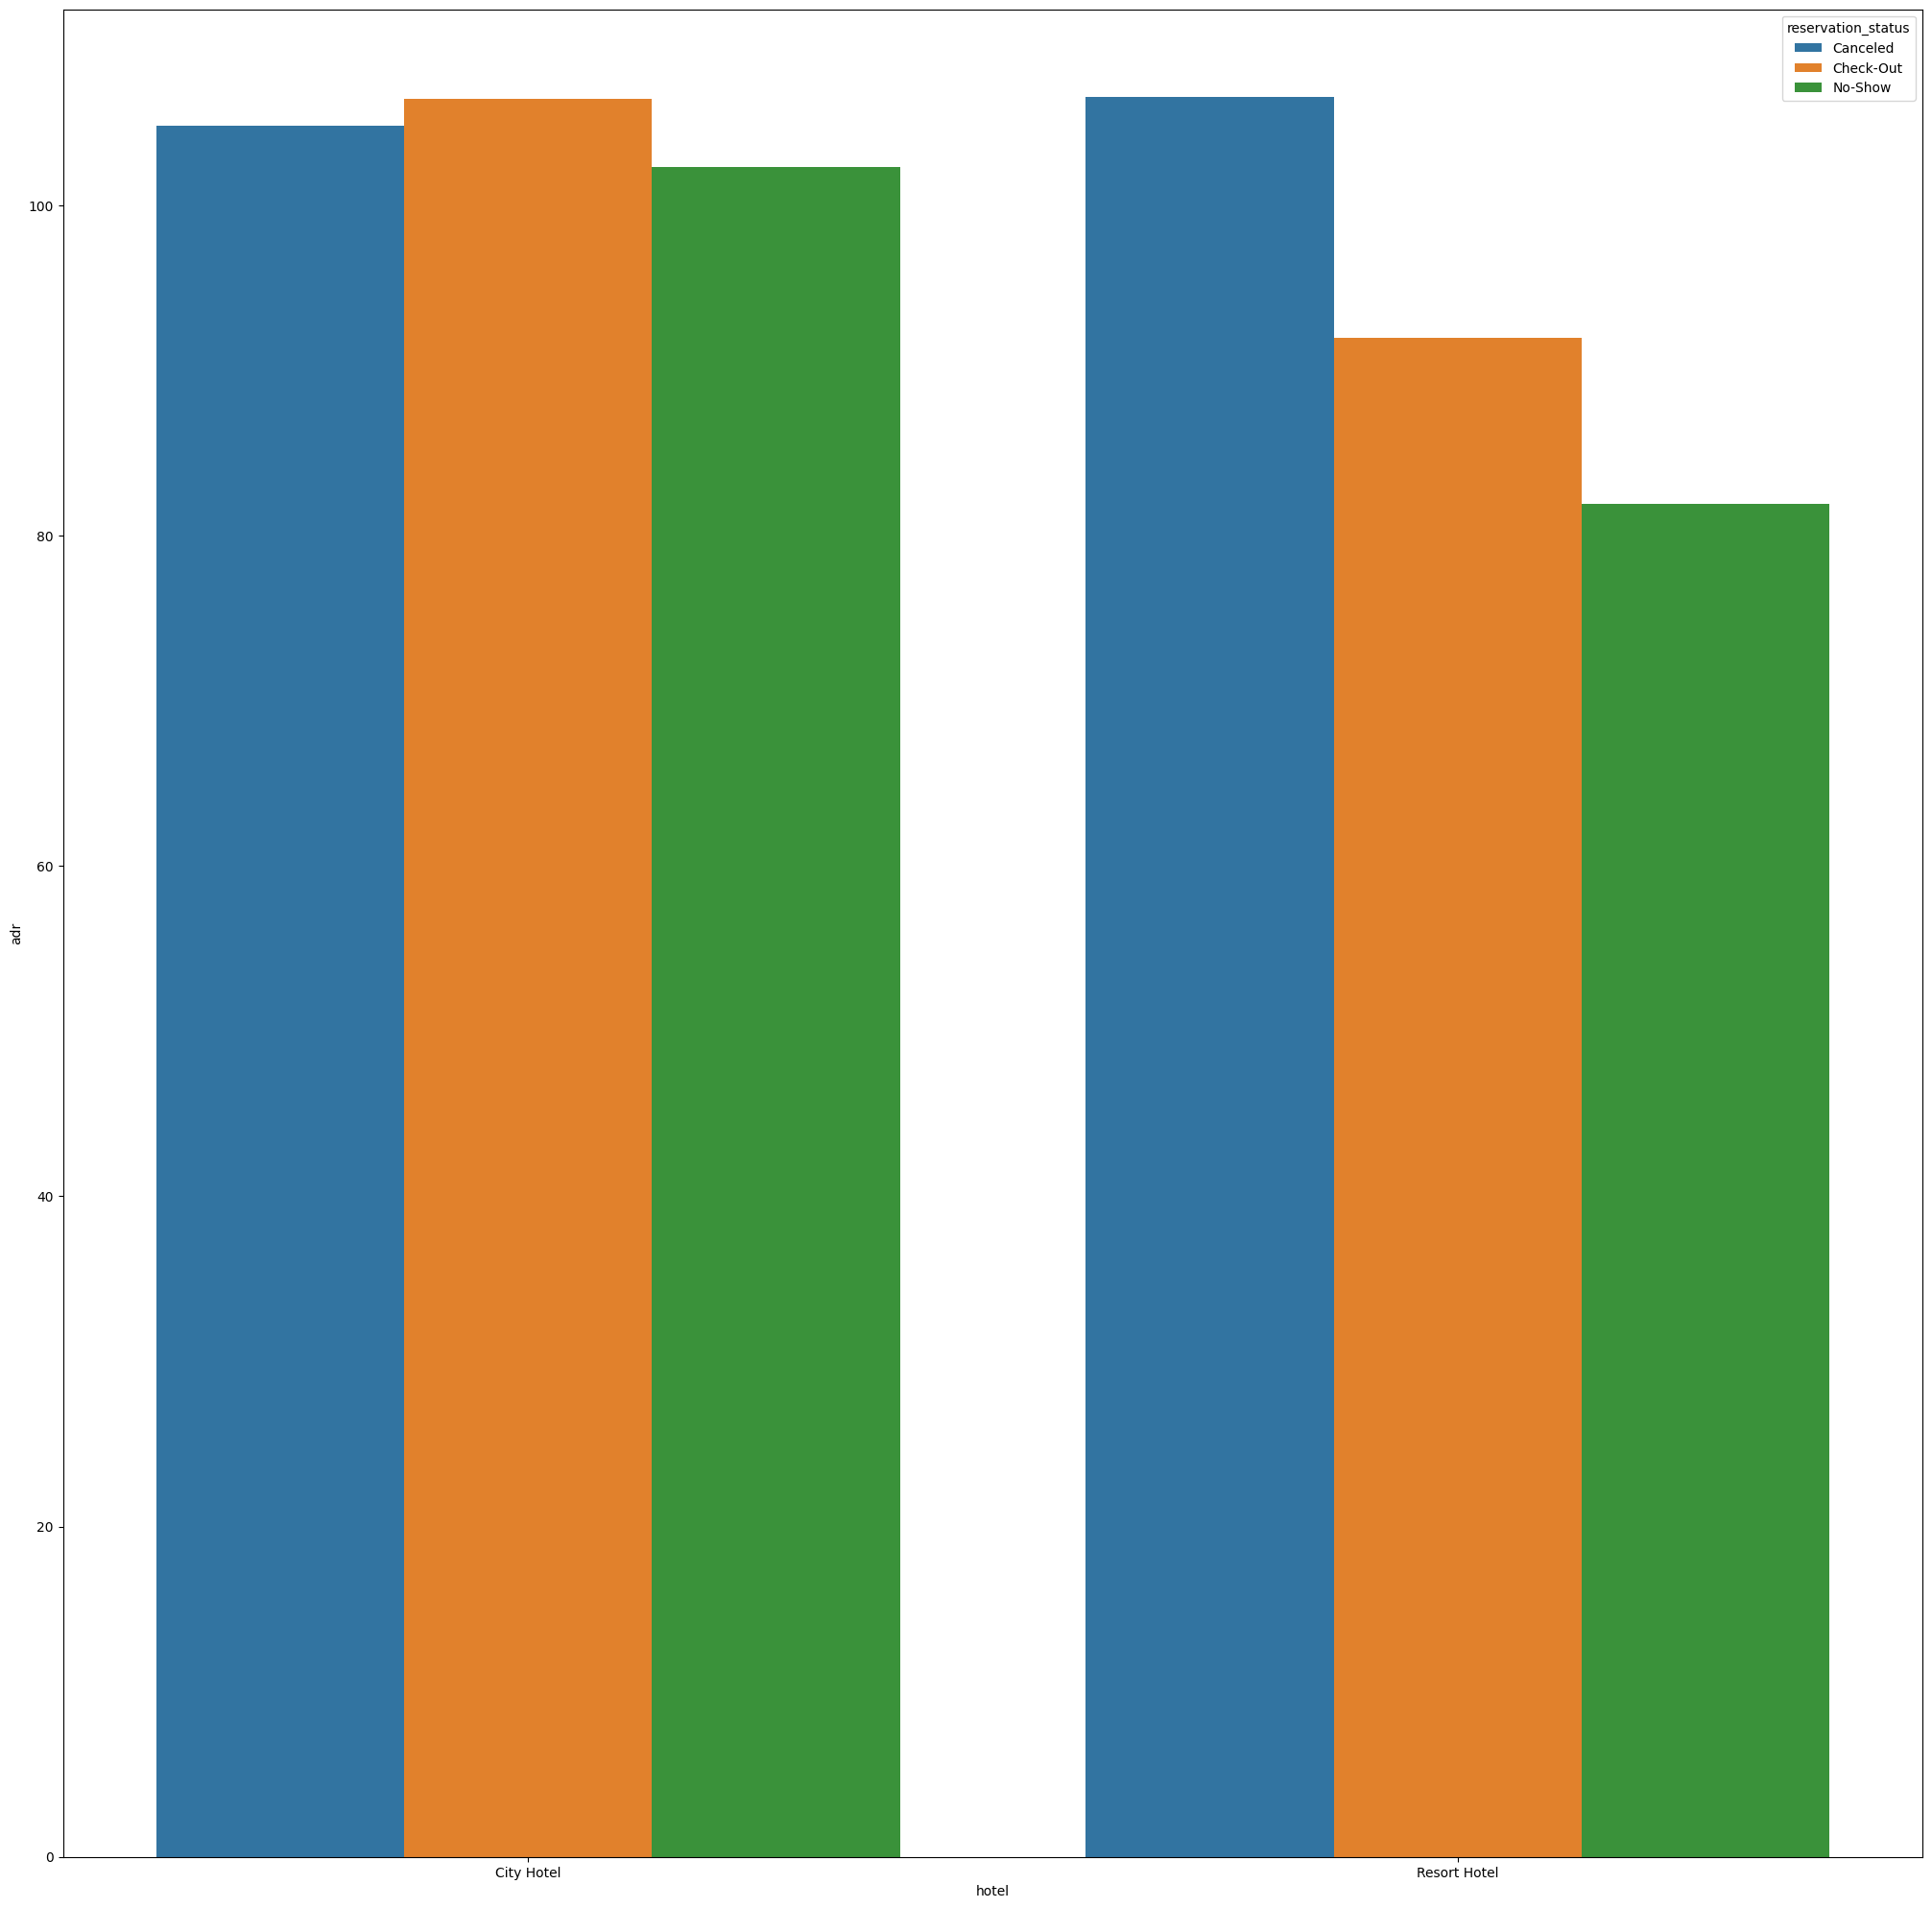

In [393]:
plt.figure(figsize=(25, 25))
sns.barplot(data=hotel_price_by_status, x='hotel', y='adr',hue='reservation_status')
plt.show()

- 리조트는 가격이 비쌀때에 취소가 높고 시티호텔의 가격은 비슷하다

In [394]:
hotel_room = hotel_booking_df.groupby(['hotel'])['total_num'].mean().reset_index()

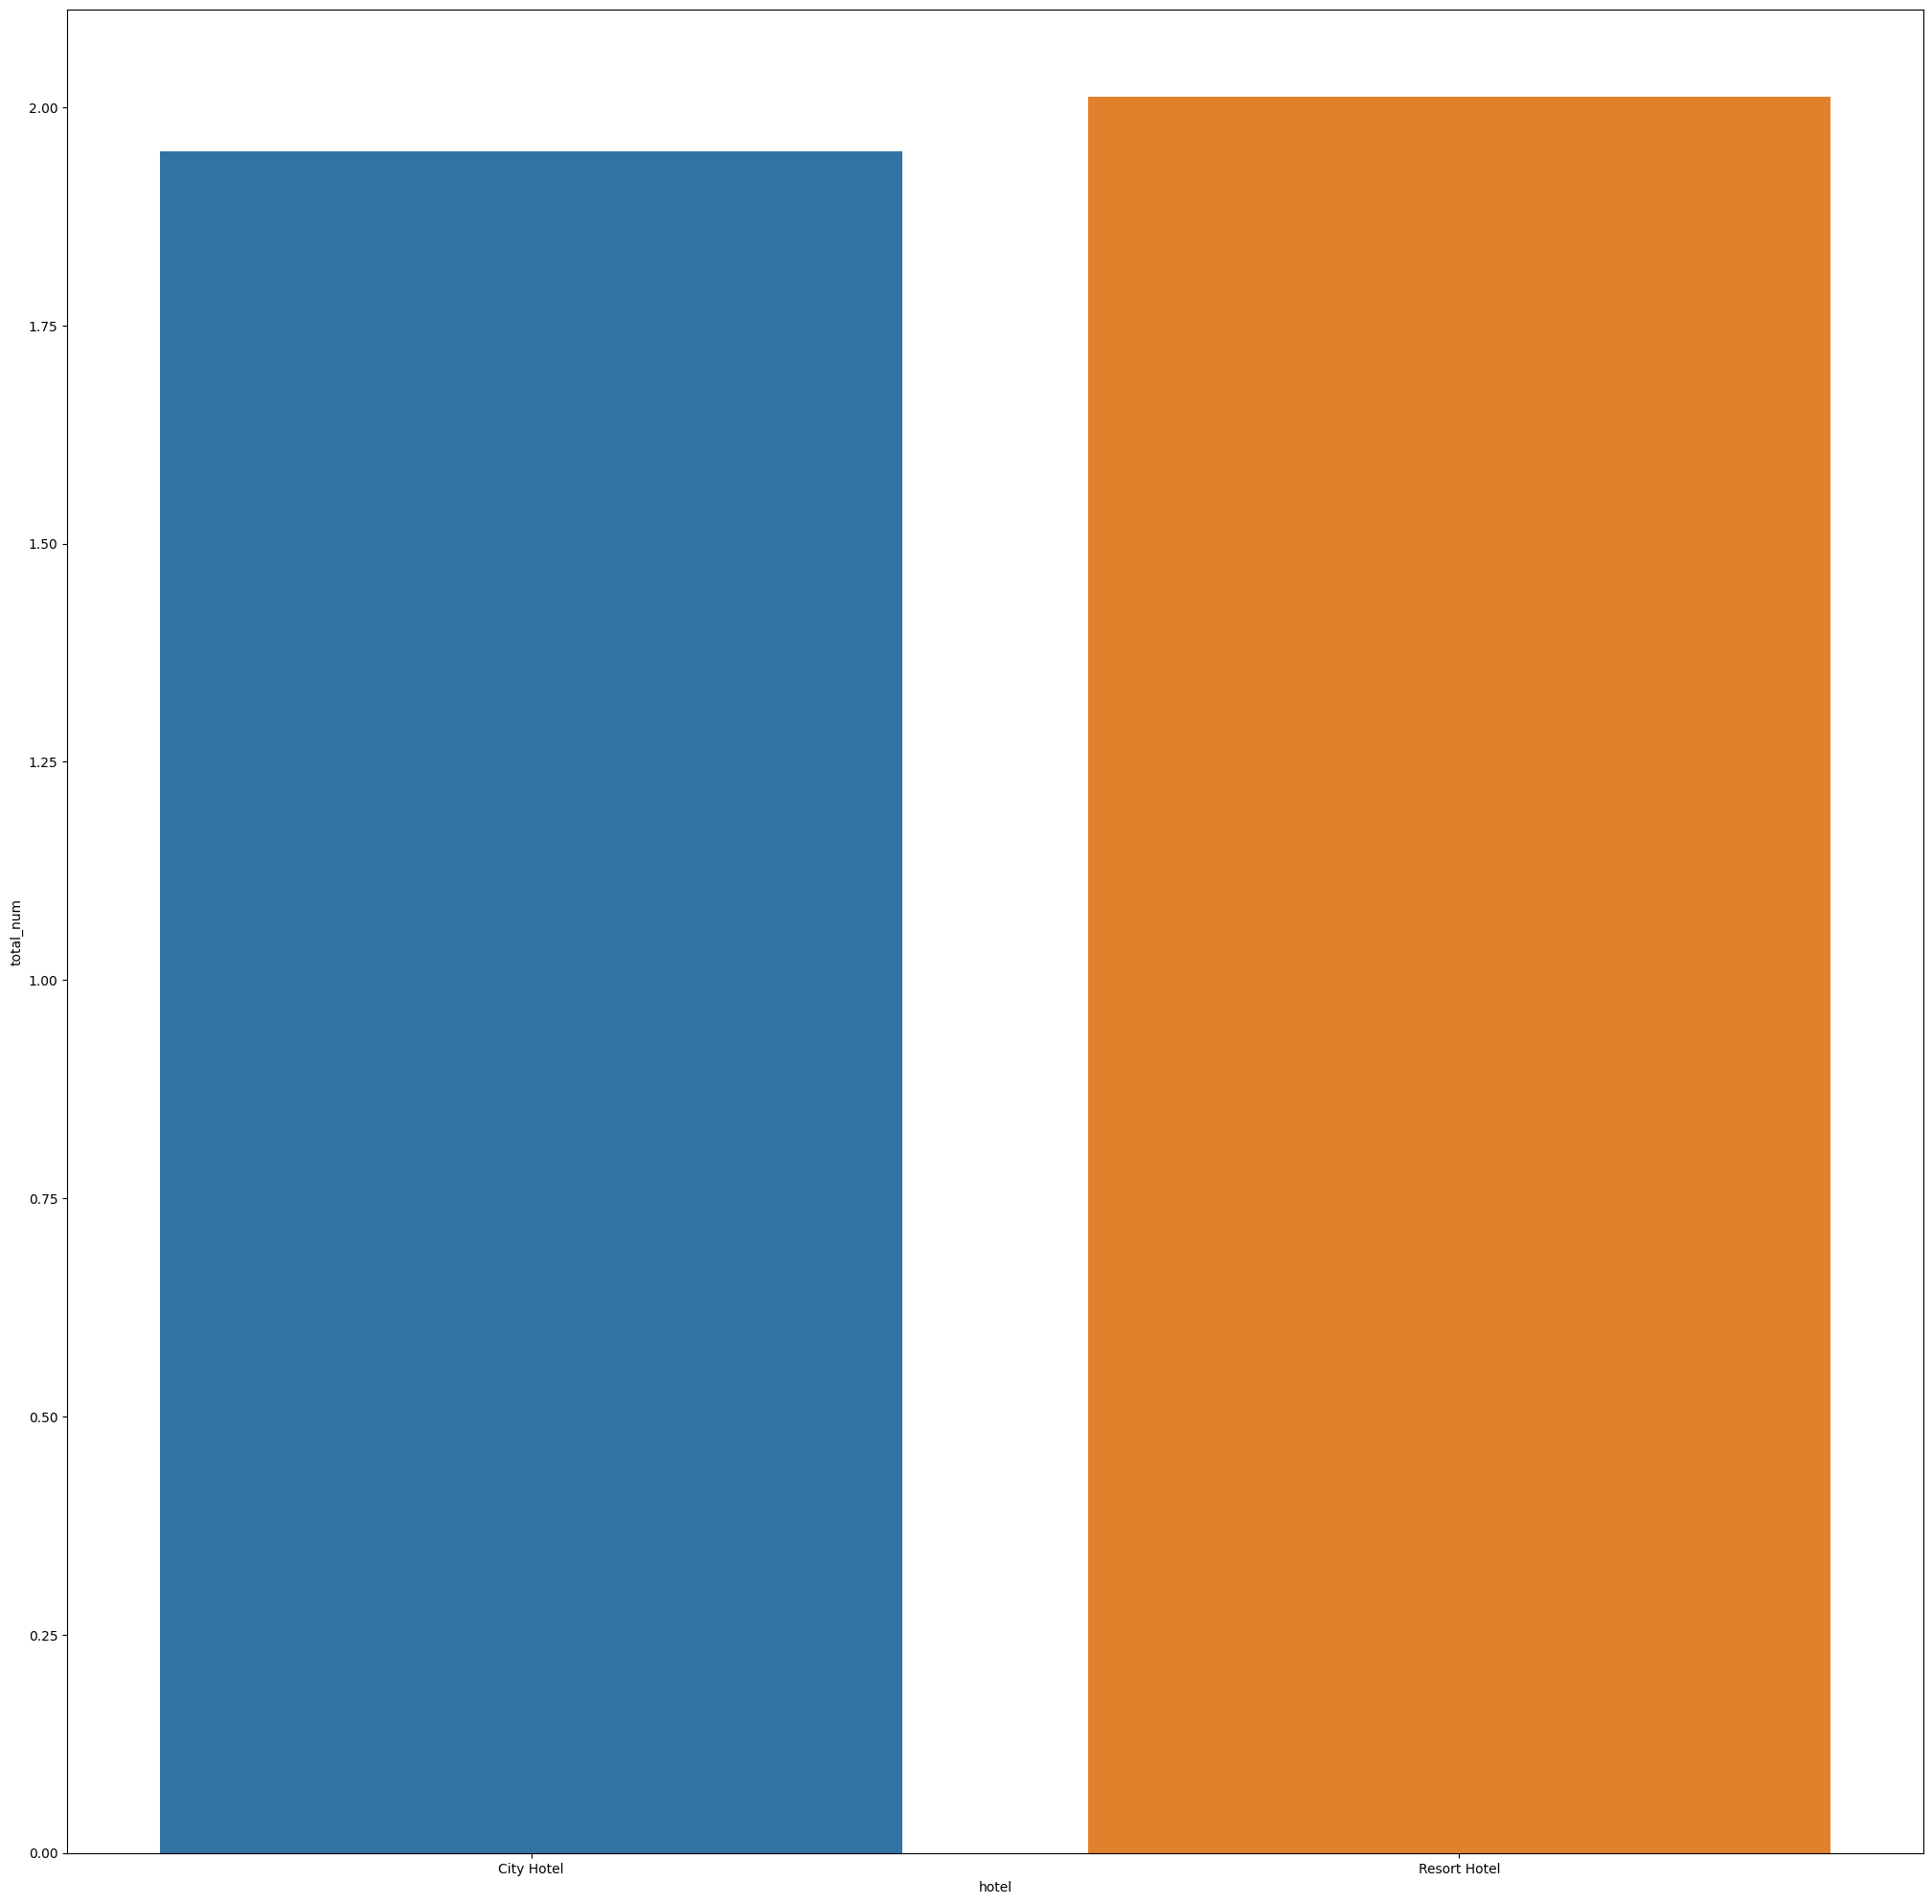

In [395]:
plt.figure(figsize=(25, 25))
sns.barplot(data=hotel_room, x='hotel', y='total_num')
plt.show()

- 리조트 호텔이 조금 더 그룹 단위로 온다

In [396]:
want_room=hotel_booking_df.groupby(['reserved_room_vs_assigned_room','reservation_status'])['reservation_status'].size().reset_index(name='count')

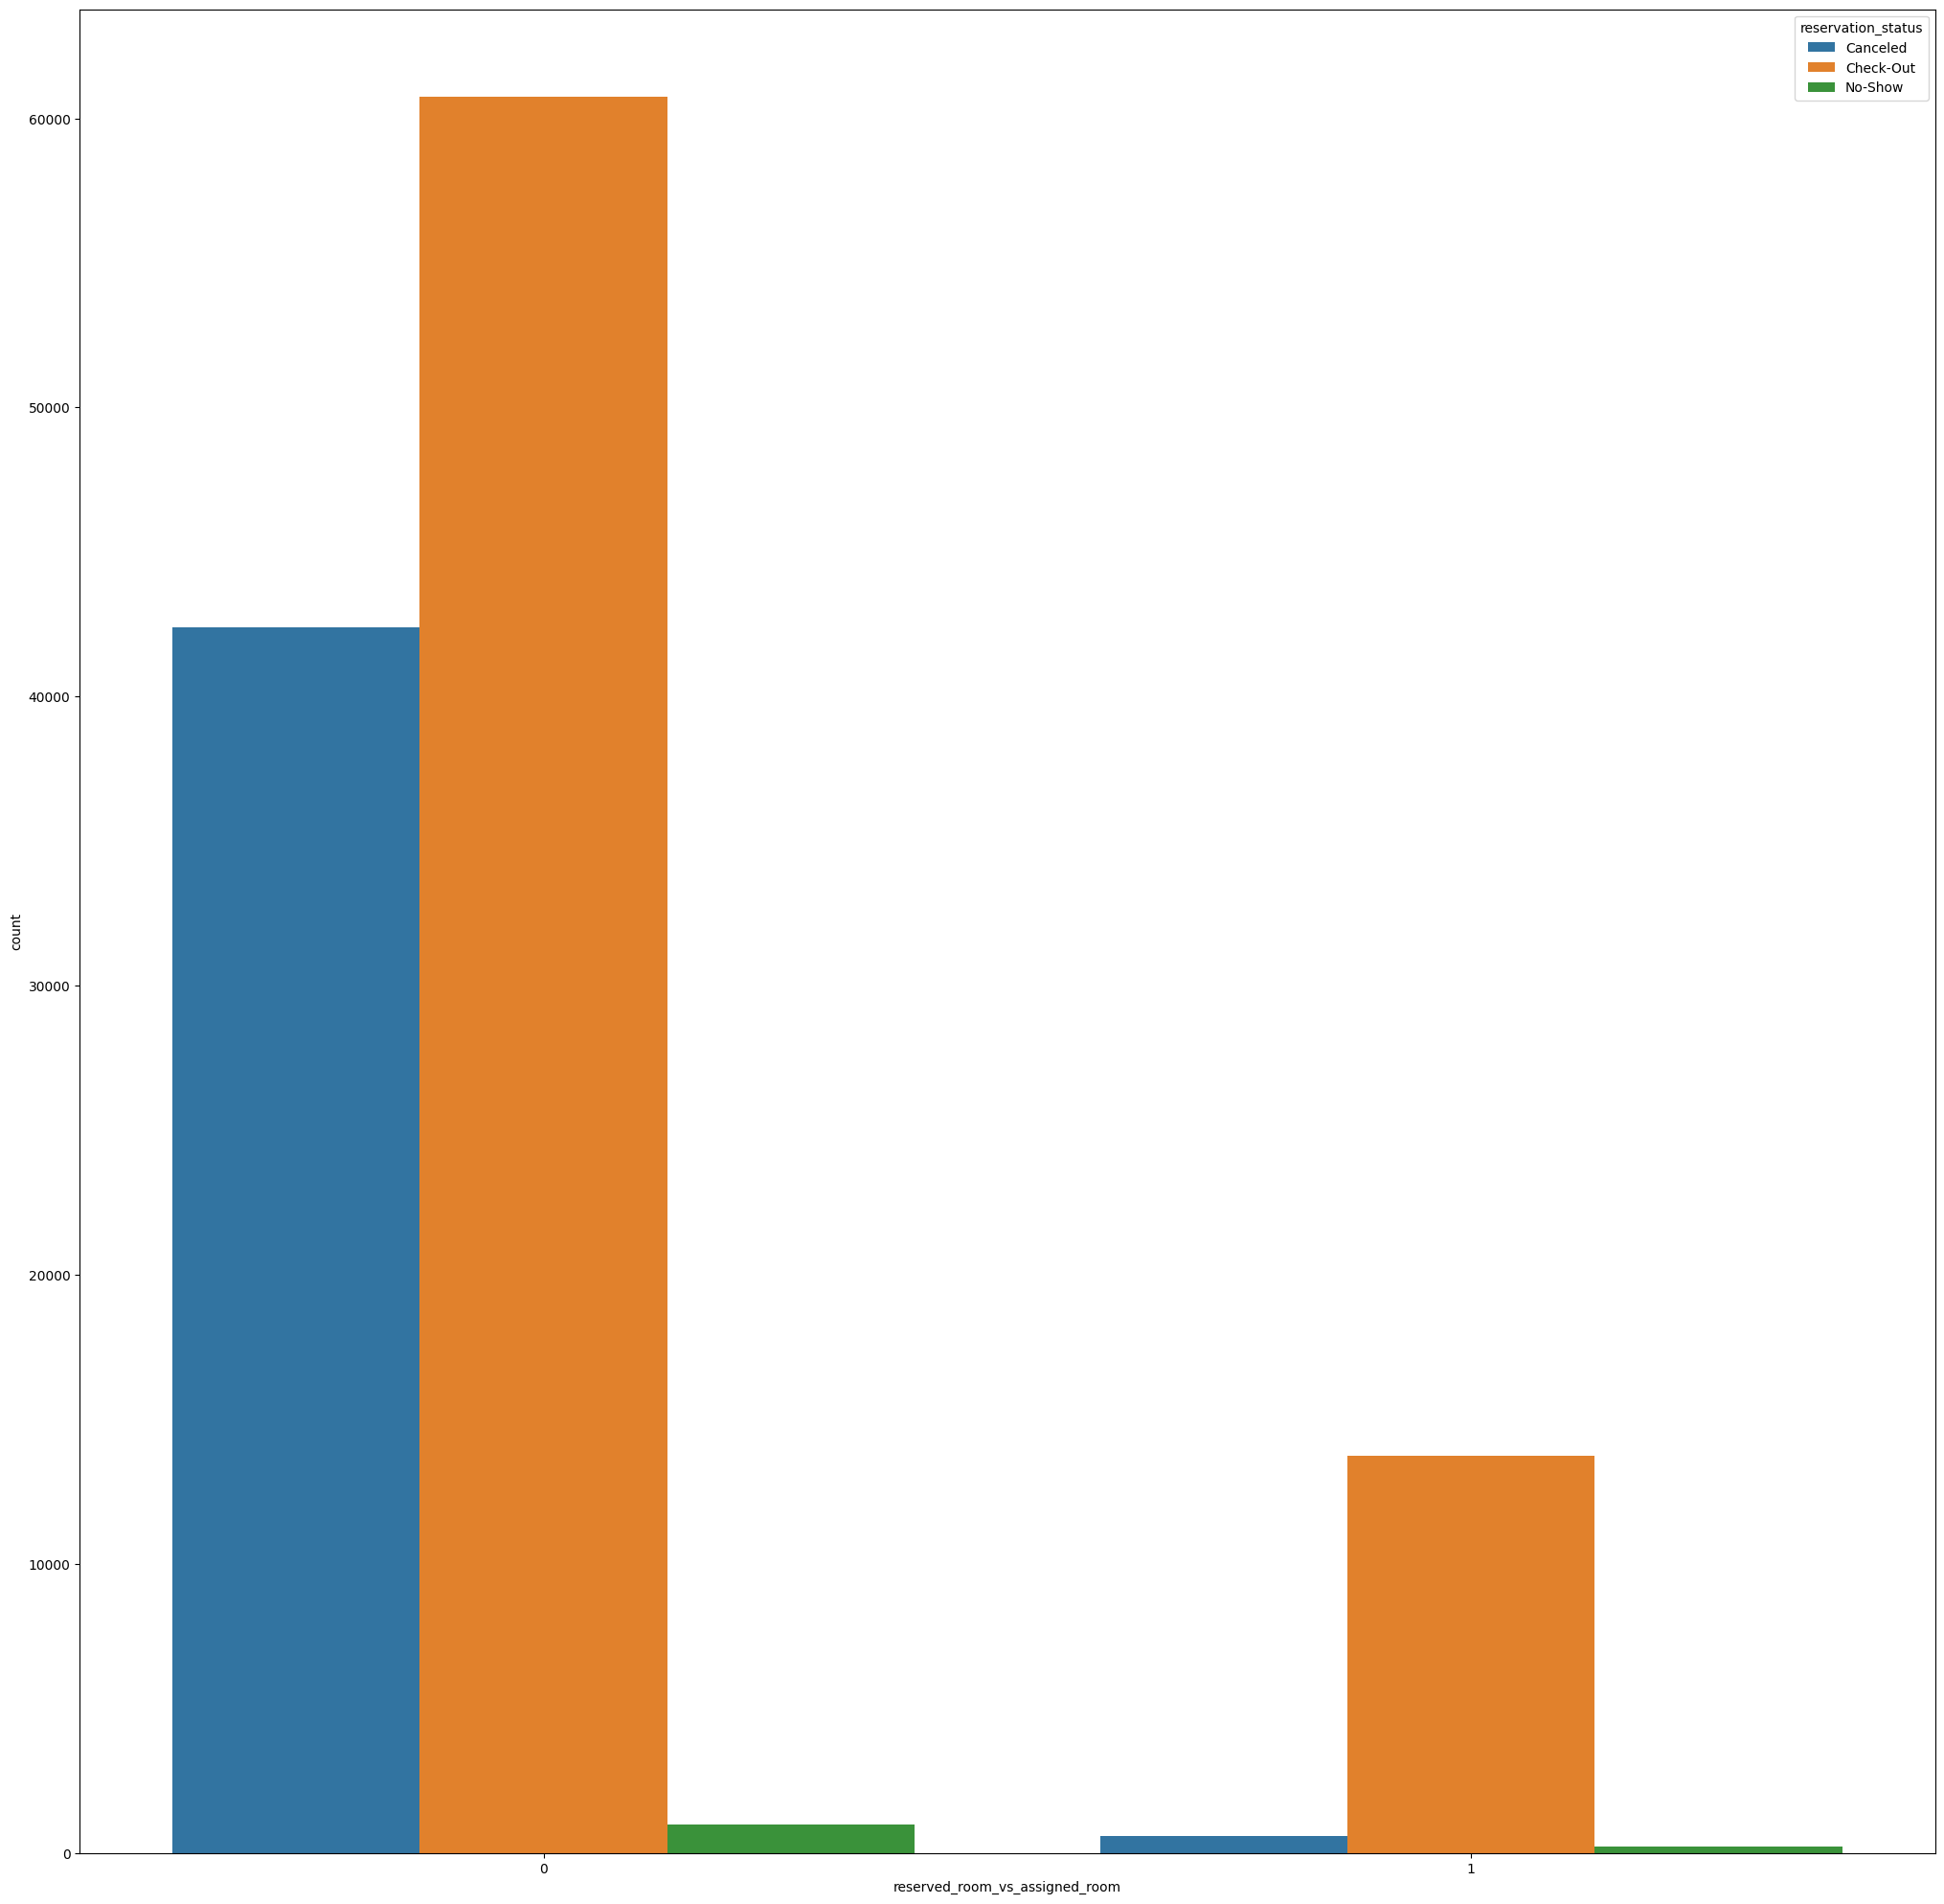

In [397]:
plt.figure(figsize=(25, 25))
sns.barplot(data=want_room, x='reserved_room_vs_assigned_room', y='count',hue='reservation_status')
plt.show()


방 배정과 취소는 큰 연관관계가 없다

In [398]:
hotel_booking_df['total_price'] = hotel_booking_df['adr'] * hotel_booking_df['total_night']

C:\Users\eagls\AppData\Local\Temp\ipykernel_31704\434780478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_booking_df['total_price'] = hotel_booking_df['adr'] * hotel_booking_df['total_night']


In [399]:
total_price_status=hotel_booking_df.groupby(['hotel','reservation_status'])['total_price'].mean().reset_index()

In [400]:
total_price_status

,hotel,reservation_status,total_price
0,City Hotel,Canceled,327.133654
1,City Hotel,Check-Out,313.467121
2,City Hotel,No-Show,397.326887
3,Resort Hotel,Canceled,531.535009
4,Resort Hotel,Check-Out,406.141925
5,Resort Hotel,No-Show,309.862702


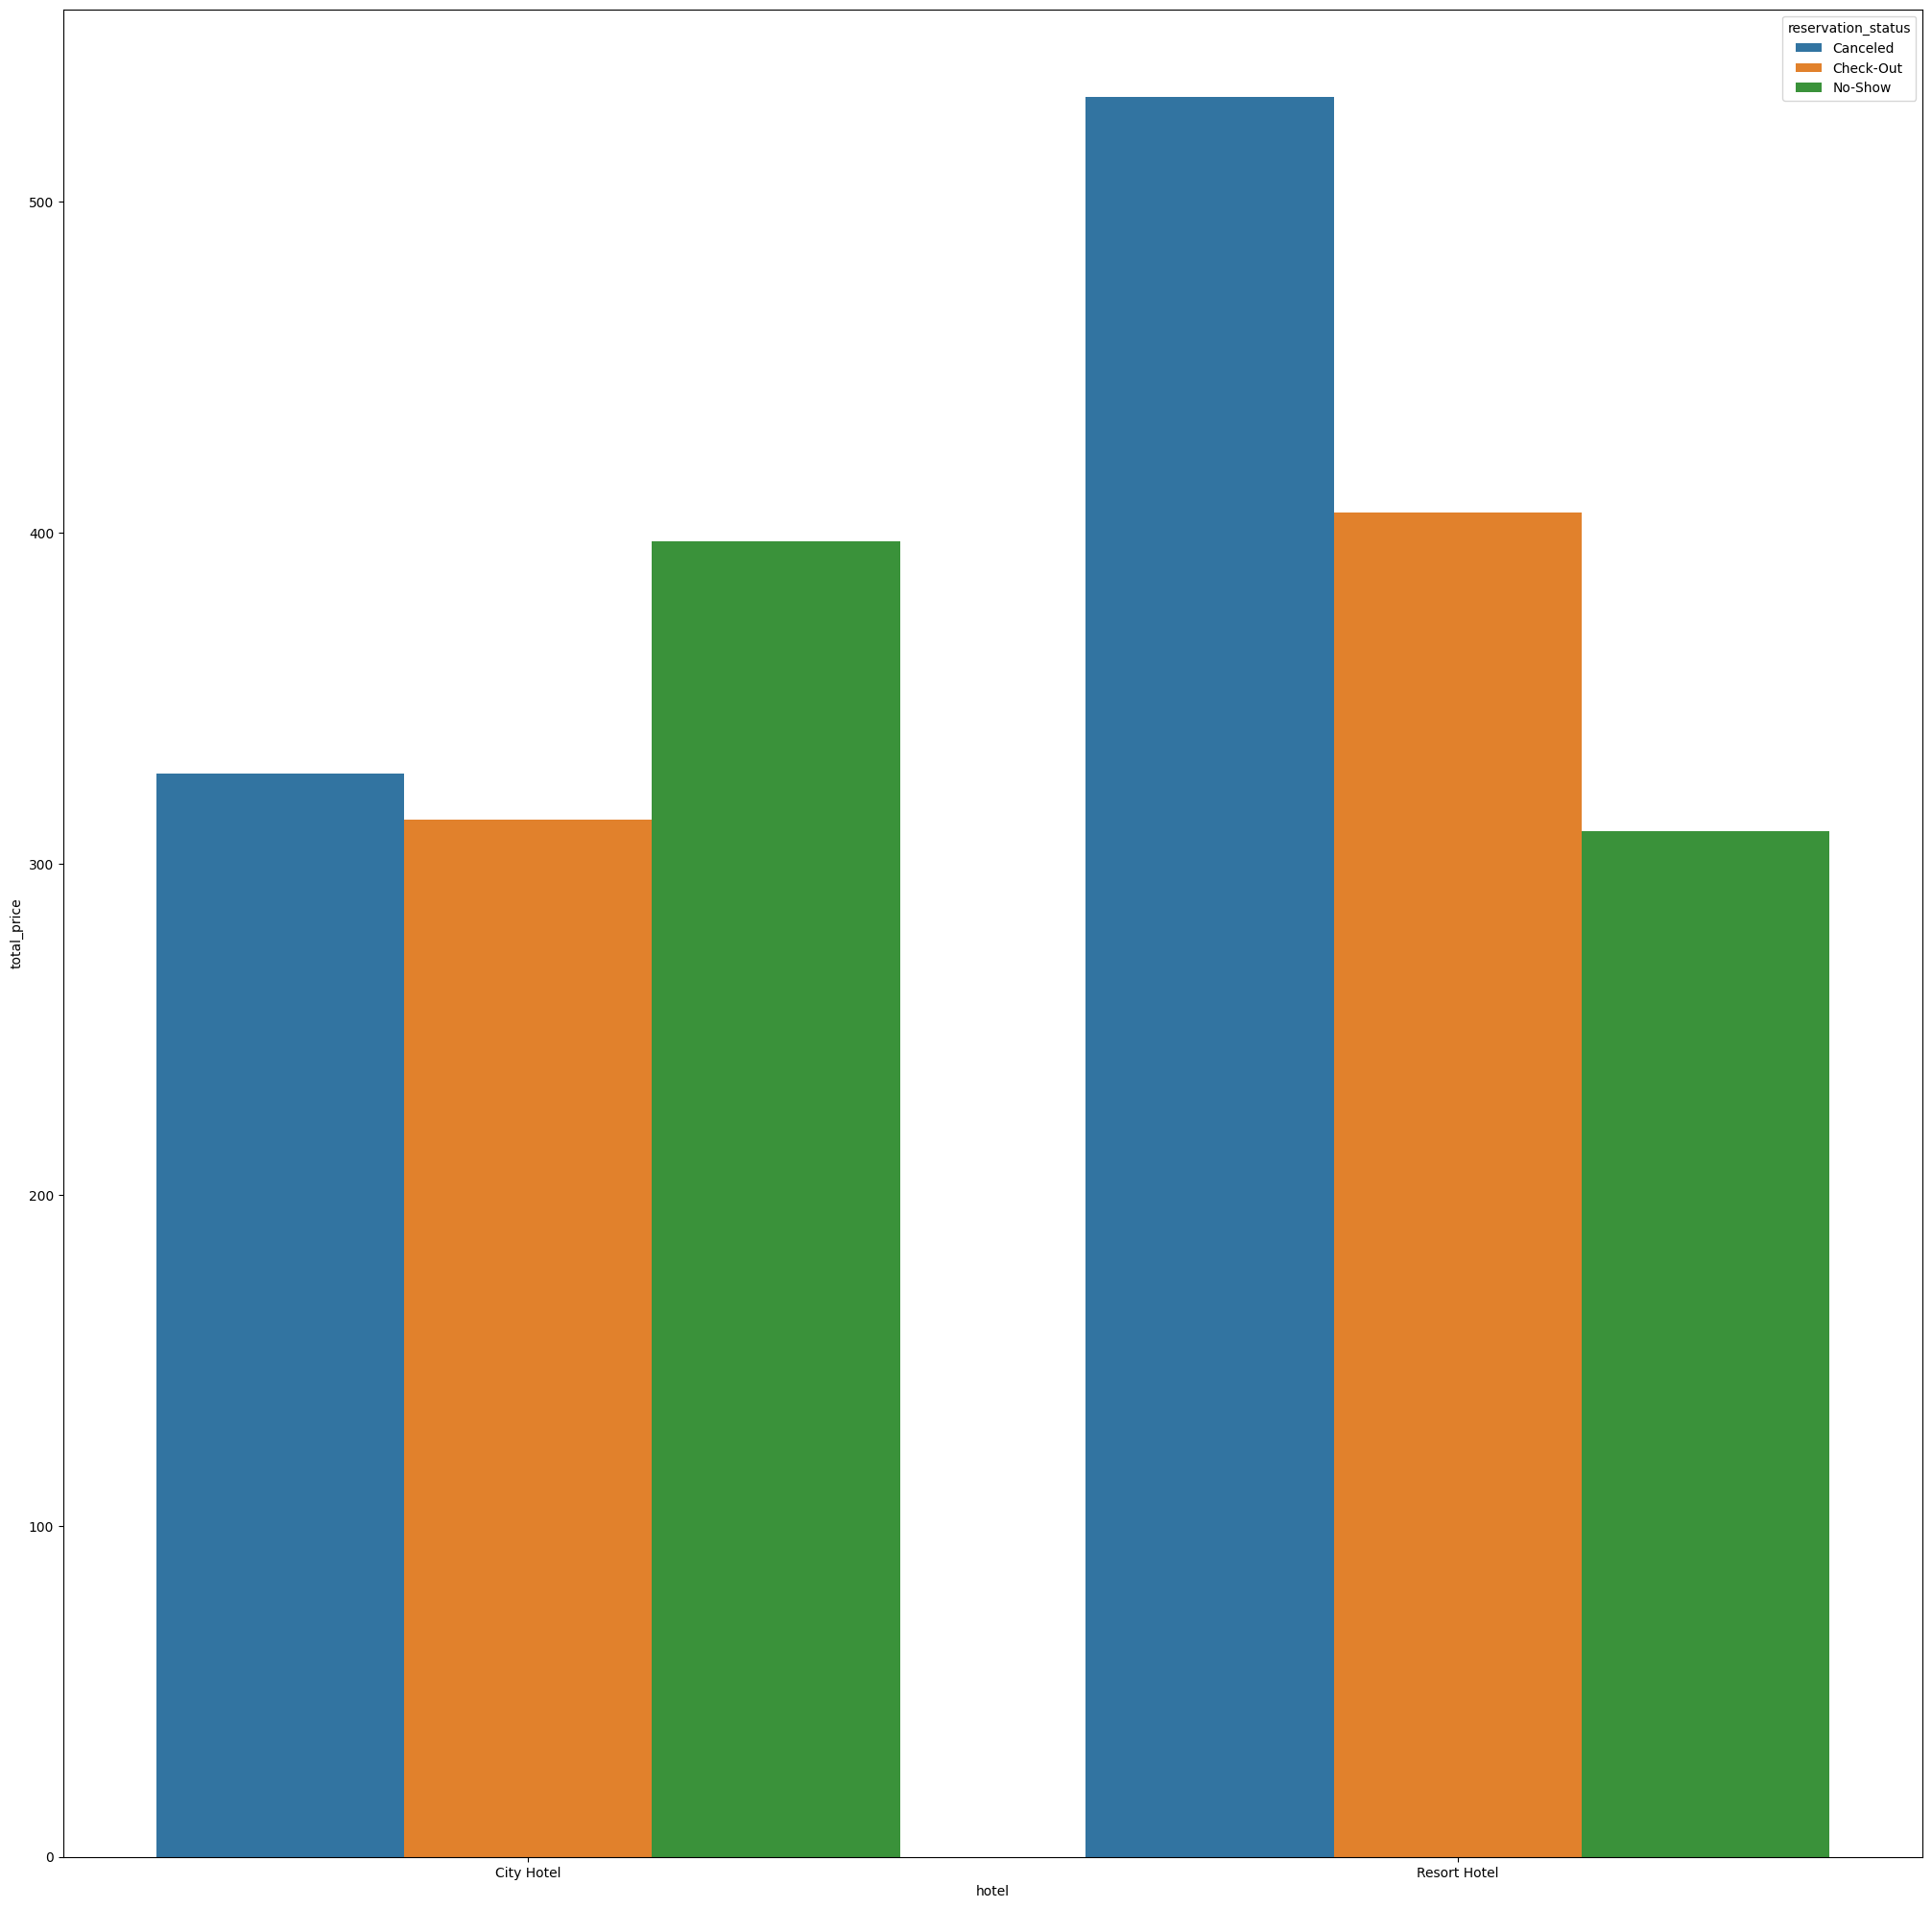

In [401]:
plt.figure(figsize=(25, 25))
sns.barplot(data=total_price_status, x='hotel', y='total_price',hue='reservation_status')
plt.show()

- 리조트 호텔은 가격때문에 취소하는 경우가 많습니다

# 결과
- 시티호텔과 리조트 호텔의 방문 목적이 다르다.
- 리조트 호텔을 가격이 비싸면 취소하고 다른 곳으로 방문하고 시티호텔을 가격보다는 손님의 볼 일에 따라 취소여부가 달라진다
- 시티 호텔은 특별 요청이 없을 때는 쉽게 취소를 하고 있을 때는 취소율이 낮아지기 때문에 호텔에서 가능한 선에서 요청이 있을시에는 들어줘야한다
- 여행사를 통해서 방문을 많이 하기 때문에 비수기 때는 여행사 할인을 통해서 손님을 모아야한다

In [402]:
dummies_df = pd.get_dummies(hotel_booking_df['hotel'], prefix='hotel')

In [403]:
hotel_booking_df = pd.concat([hotel_booking_df, dummies_df], axis=1)

In [404]:
dummies_df = pd.get_dummies(hotel_booking_df['meal'], prefix='meal')

In [405]:
hotel_booking_df = pd.concat([hotel_booking_df, dummies_df], axis=1)

In [406]:
hotel_booking_df

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_num,reserved_room_vs_assigned_room,combined_date,day_of_week,total_night,year_month,total_price,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined
2,2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1,2015-07-01,2,1,2015-7,75.00,False,True,True,False,False,False,False
3,3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,0,2015-07-01,2,1,2015-7,75.00,False,True,True,False,False,False,False
4,4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0,0,2015-07-01,2,2,2015-7,196.00,False,True,True,False,False,False,False
5,5,Resort Hotel,0,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0,0,2015-07-01,2,2,2015-7,196.00,False,True,True,False,False,False,False
6,6,Resort Hotel,0,0,2015,7,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2.0,0,2015-07-01,2,2,2015-7,214.00,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,8,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,0,2017-08-30,2,7,2017-8,672.98,True,False,True,False,False,False,False
119386,119386,City Hotel,0,102,2017,8,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,0,2017-08-31,3,7,2017-8,1578.01,True,False,True,False,False,False,False
119387,119387,City Hotel,0,34,2017,8,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,0,2017-08-31,3,7,2017-8,1103.97,True,False,True,False,False,False,False
119388,119388,City Hotel,0,109,2017,8,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,0,2017-08-31,3,7,2017-8,730.80,True,False,True,False,False,False,False


In [407]:
encoder = LabelEncoder()

In [408]:
hotel_booking_df['country'] = encoder.fit_transform(hotel_booking_df['country'])

In [409]:
dummies_df = pd.get_dummies(hotel_booking_df['market_segment'], prefix='market_segment')

In [410]:
hotel_booking_df = pd.concat([hotel_booking_df, dummies_df], axis=1)

In [411]:
dummies_df = pd.get_dummies(hotel_booking_df['distribution_channel'], prefix='distribution_channel')

In [412]:
hotel_booking_df = pd.concat([hotel_booking_df, dummies_df], axis=1)

In [413]:
dummies_df = pd.get_dummies(hotel_booking_df['reserved_room_type'], prefix='reserved_room_type')

In [414]:
hotel_booking_df = pd.concat([hotel_booking_df, dummies_df], axis=1)

In [415]:
dummies_df = pd.get_dummies(hotel_booking_df['assigned_room_type'], prefix='assigned_room_type')

In [416]:
hotel_booking_df = pd.concat([hotel_booking_df, dummies_df], axis=1)

In [417]:
dummies_df = pd.get_dummies(hotel_booking_df['deposit_type'], prefix='deposit_type')

In [418]:
hotel_booking_df = pd.concat([hotel_booking_df, dummies_df], axis=1)

In [419]:
dummies_df = pd.get_dummies(hotel_booking_df['customer_type'], prefix='customer_type')

In [420]:
hotel_booking_df = pd.concat([hotel_booking_df, dummies_df], axis=1)

In [421]:
hotel_booking_df['reservation_status'] = encoder.fit_transform(hotel_booking_df['reservation_status'])

In [422]:
hotel_booking_df

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_num,reserved_room_vs_assigned_room,combined_date,day_of_week,total_night,year_month,total_price,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
2,2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0.0,0,BB,59,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,1,2015-07-02,1.0,1,2015-07-01,2,1,2015-7,75.00,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0.0,0,BB,59,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,1,2015-07-02,1.0,0,2015-07-01,2,1,2015-7,75.00,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
4,4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0.0,0,BB,59,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,1,2015-07-03,2.0,0,2015-07-01,2,2,2015-7,196.00,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
5,5,Resort Hotel,0,14,2015,7,27,1,0,2,2,0.0,0,BB,59,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,1,2015-07-03,2.0,0,2015-07-01,2,2,2015-7,196.00,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
6,6,Resort Hotel,0,0,2015,7,27,1,0,2,2,0.0,0,BB,135,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,107.00,0,0,1,2015-07-03,2.0,0,2015-07-01,2,2,2015-7,214.00,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,.

In [423]:
X=hotel_booking_df[['lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number',	'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_num',	'reserved_room_vs_assigned_room','day_of_week',	'total_night','total_price','hotel_City Hotel','meal_BB','meal_FB','meal_HB','meal_SC','meal_Undefined','market_segment_Aviation','market_segment_Complementary','market_segment_Corporate','market_segment_Direct','market_segment_Groups','market_segment_Offline TA/TO','market_segment_Online TA',	'distribution_channel_Corporate','distribution_channel_Direct','distribution_channel_GDS',	'distribution_channel_TA/TO','distribution_channel_Undefined','reserved_room_type_A',	'reserved_room_type_B',	'reserved_room_type_C',	'reserved_room_type_D',	'reserved_room_type_E',	'reserved_room_type_F',	'reserved_room_type_G',	'reserved_room_type_H',		'assigned_room_type_A',  'assigned_room_type_B',	'assigned_room_type_C','assigned_room_type_D',	'assigned_room_type_E',	'assigned_room_type_F',	'assigned_room_type_G',	'assigned_room_type_H',	'assigned_room_type_I',	'assigned_room_type_K',	'deposit_type_No Deposit',	'deposit_type_Non Refund',	'deposit_type_Refundable', 'customer_type_Contract','customer_type_Group', 'customer_type_Transient',	'customer_type_Transient-Party']]

y=hotel_booking_df['reservation_status']

In [424]:
scaler = StandardScaler()

In [425]:
scaled_features = scaler.fit_transform(X)

In [426]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.25, random_state=42)

In [427]:
xgboost = XGBClassifier()

In [428]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [429]:
y_pred_xg = xgboost.predict(X_test)

In [430]:
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(f'정확도: {accuracy_xg:.4f}')

정확도: 0.8469


In [431]:
precision_xg = precision_score(y_test, y_pred_xg, average='weighted')
print(f'정밀도: {precision_xg:.4f}')

정밀도: 0.8479


In [432]:
recall_xg = recall_score(y_test, y_pred_xg,average='weighted')
print(f'재현율: {recall_xg:.4f}')

재현율: 0.8469


In [433]:
f1_xg = f1_score(y_test, y_pred_xg,average='weighted')
print(f'f1_score: {f1_xg:.4f}')

f1_score: 0.8411


In [434]:
xg_feature_importance = xgboost.feature_importances_

In [435]:
xg_feature_importance

array([5.6974837e-03, 3.8982688e-03, 2.2233154e-03, 2.4839228e-03,
       1.5181848e-03, 1.5955269e-03, 1.9403887e-03, 2.8588856e-03,
       2.0851674e-03, 1.2233390e-03, 1.8559707e-03, 5.5006843e-02,
       9.0134544e-03, 6.0458677e-03, 2.9650875e-03, 2.5270437e-03,
       6.0549229e-02, 1.6300999e-02, 2.4243984e-03, 5.4629628e-02,
       1.5507169e-03, 2.2064797e-03, 2.2894926e-03, 3.8710539e-03,
       2.5415311e-03, 5.0373566e-03, 2.7027926e-03, 1.5985012e-03,
       3.9364737e-03, 1.2795312e-03, 1.0386095e-03, 2.9795936e-03,
       1.8119696e-03, 3.8375978e-03, 8.0532860e-03, 3.0343115e-02,
       2.6001045e-03, 1.7280228e-03, 1.4507679e-03, 2.2850931e-03,
       2.0872045e-03, 1.6844028e-03, 2.1813917e-03, 8.3172729e-04,
       1.2550949e-03, 1.5350071e-03, 1.1728886e-03, 7.8047608e-04,
       1.5540144e-03, 1.8374587e-03, 3.4225914e-03, 2.3166658e-03,
       1.5857792e-03, 1.5441577e-03, 1.5243718e-03, 8.6626358e-04,
       1.0103898e-03, 6.2700035e-04, 5.1855558e-04, 3.1205767e

In [436]:
lgbm = LGBMClassifier()

In [437]:
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [438]:
y_pred_lgbm = lgbm.predict(X_test)

In [439]:
accuracy_xg = accuracy_score(y_test, y_pred_lgbm)
print(f'정확도: {accuracy_xg:.4f}')

정확도: 0.8416


In [440]:
lgbm_features_importance = lgbm.feature_importances_

In [441]:
lgbm_features_importance

array([1360,  324,  142,  684,  583,   95,  179,   91,   48,   12,   44,
        146,  129,  227,   87, 1041,  143,  360,  103,  104,  292,  198,
        822,  173,   46,   30,   54,   47,   40,   17,    6,   37,   41,
         99,   90,  134,   38,   28,   18,   56,    0,   50,   21,    7,
         20,   31,   11,    8,    2,   36,   49,   32,   24,   17,   31,
         13,    7,   11,    9,   38,  100,    5,   22,    4,  120,  164])

In [442]:
ranfor = RandomForestClassifier()

In [443]:
ranfor.fit(X_train, y_train)

RandomForestClassifier()

In [444]:
y_pred_ran = ranfor.predict(X_test)

In [445]:
accuracy_ran = accuracy_score(y_test, y_pred_ran)
print(f'정확도: {accuracy_ran:.4f}')

정확도: 0.8672


In [446]:
ran_features_importance = ranfor.feature_importances_

In [447]:
ran_features_importance

array([1.13346174e-01, 1.74735221e-02, 3.06099393e-02, 4.94088590e-02,
       5.20282222e-02, 1.57019301e-02, 2.40511263e-02, 9.14339762e-03,
       4.22702198e-03, 7.80563773e-04, 1.80950662e-03, 3.22505752e-02,
       2.93918905e-03, 1.92629741e-02, 2.63373501e-03, 6.77956213e-02,
       1.89009327e-02, 5.63187376e-02, 1.19079937e-02, 2.78243336e-02,
       3.10118459e-02, 2.62231420e-02, 6.61915555e-02, 9.76871501e-03,
       6.45867142e-03, 1.27391027e-03, 4.67718041e-03, 3.54464340e-03,
       9.33992291e-04, 2.08572183e-04, 2.91799623e-04, 1.44291720e-03,
       4.25905308e-03, 1.19954578e-02, 1.18792368e-02, 2.04547632e-02,
       1.90967054e-03, 4.82444337e-03, 2.21149252e-04, 7.57832827e-03,
       5.85672856e-05, 5.18709091e-03, 8.03274165e-04, 6.23053127e-04,
       3.39992823e-03, 2.16244595e-03, 1.13553640e-03, 8.81108234e-04,
       3.35153576e-04, 7.64728832e-03, 1.25828998e-03, 1.03518659e-03,
       4.71487121e-03, 2.34665774e-03, 1.39179127e-03, 9.69230039e-04,
      